In [1]:
include("MC.jl")

getGHI (generic function with 1 method)

In [2]:
include("viz.jl");

In [3]:
ENV["COLUMNS"] = 200;
const N = 30;

In [4]:
fn_berlin = "irradiation_Berlin.nc"
fn_berlin_w  = "irradiation_Berlin_W.nc";
fn_berlin2020 = "irradiation2020_Berlin.nc"
fn_berlin2020_w  = "irradiation2020_Berlin_W.nc";

In [5]:
test = getCMF0(fn_berlin; raw=1)[2]
test_neib_w = getCMF0(fn_berlin_w; raw=1)[2];

test2020 = getCMF1(fn_berlin2020)
test2020_neib_w = getCMF1(fn_berlin2020_w);

In [6]:
df01 = getDFtm(fn_berlin)
df02 = getDFtm(fn_berlin2020);

In [7]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
# df2_test = calCMF(df1_test)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N) # city-specific
# data_test_cls = classify(data_test, binStarts);
ticks = rd.(binMean, 2)
xti = (binMean[[1:2:26; 30]], ticks[[1:2:26; 30]]);

#### comp DFs

In [8]:
df21 = getDF(2, 1) 

17614×12 DataFrame
   Row │ time                 month  ghi        ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib    dif_pred     
       │ DateTime             Int8   Float64    Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64     Float64      
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T07:45:00      1   1.11554    2.5635    0.435162  0.444692  0.106031  0.437789         9   0.00953019  -0.329131    0.00262735
     2 │ 2019-01-01T08:00:00      1   1.95644    7.26123   0.269437  0.435162  0.622668  0.263847         3   0.165725     0.353231   -0.00558964
     3 │ 2019-01-01T08:15:00      1   2.19264   12.8464    0.170682  0.269437  0.812441  0.245249         1   0.0987544    0.641759    0.0745666
     4 │ 2019-01-01T08:30:00      1   2.67955   18.7448    0.142949  0.170682  0.577954  0.213818         1   0.0277334    0.435005    0.0708693
     5 │ 2019-01-01T08:45:00      1   3.72535   24.6236    0.151292  0.142949  0.40955   0.213818         1  -0.00834314   0.258258    0.0625262
     6 │ 2019-01-01T09:00:00      1   7.27156   30.2799    0.240145  0.151292  0.188798  0.281747         2  -0.0888532   -0.0513477   0.0416014
     7 │ 2019-01-01T09:15:00      1   8.06943   35.4893    0.227377  0.240145  0.147695  0.246403         2   0.0127687   -0.0796814   0.0190269
     8 │ 2019-01-01T09:30:00      1   7.34271   40.1676    0.182802  0.227377  0.13582   0.219746         1   0.0445747   -0.0469821   0.0369445
     9 │ 2019-01-01T09:45:00      1   8.05224   44.348     0.18157   0.182802  0.144917  0.213818         1   0.00123228  -0.0366527   0.0322487
    10 │ 2019-01-01T10:00:00      1   8.64267   47.994     0.180078  0.18157   0.117192  0.213818         1   0.00149155  -0.0628862   0.0337402
    11 │ 2019-01-01T10:15:00      1   9.09165   51.0505    0.178091  0.180078  0.100783  0.213818         1   0.00198684  -0.0773083   0.0357271
   ⋮   │          ⋮             ⋮        ⋮          ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮           ⋮            ⋮
 17605 │ 2019-12-31T12:45:00     12  16.2905    46.3818    0.351226  0.371119  0.279701  0.386635         7   0.0198928   -0.0715251   0.0354084
 17606 │ 2019-12-31T13:00:00     12  15.3952    42.1271    0.365446  0.351226  0.271922  0.386635         7  -0.0142201   -0.093524    0.0211884
 17607 │ 2019-12-31T13:15:00     12  16.1721    37.3361    0.433149  0.365446  0.29481   0.48402          9  -0.0677031   -0.138339    0.0508707
 17608 │ 2019-12-31T13:30:00     12  16.2092    32.0782    0.505302  0.433149  0.335291  0.569766        11  -0.0721527   -0.170011    0.0644641
 17609 │ 2019-12-31T13:45:00     12  15.6477    26.4489    0.591621  0.505302  0.393995  0.598229        12  -0.0863193   -0.197627    0.00660779
 17610 │ 2019-12-31T14:00:00     12  13.442     20.5831    0.65306   0.591621  0.46773   0.693071        14  -0.0614382   -0.18533     0.0400119
 17611 │ 2019-12-31T14:15:00     12  10.5106    14.6785    0.716053  0.65306   0.513913  0.721304        15  -0.0629933   -0.20214     0.00525134
 17612 │ 2019-12-31T14:30:00     12   6.44924    9.03278   0.713982  0.716053  0.624106  0.714744        15   0.00207112  -0.0898753   0.000762357
 17613 │ 2019-12-31T14:45:00     12   3.42109    4.11305   0.831763  0.713982  0.677246  0.810114        19  -0.117782    -0.154517   -0.0216492
 17614 │ 2019-12-31T15:00:00     12   0.644611   0.702981  0.916968  0.831763  0.638925  0.905721        23  -0.0852047   -0.278043   -0.0112474
                                                                                                                                 17593 rows omitted

In [9]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [10]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [12]:
df1t = hybrid(df21, df21_2020, 1) # df test 2020 include all difs

17635×18 DataFrame
   Row │ time                 month  ghi       ghiCS      real      pers      neib       pred      real_cls  dif_pers     dif_neib     dif_pred      mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m  ⋯
       │ DateTime             Int8   Float64   Float64    Float64   Float64   Float64    Float64   Int64     Float64      Float64      Float64       Int64    Float64   Int64     Float64   Float64    ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T07:45:00      1   1.77897   2.85728   0.622607  0.11561   0.0901055  0.660559        13  -0.506997    -0.532502     0.0379515          0  0.11561          0  0.11561   -0.506997  ⋯
     2 │ 2020-01-01T08:00:00      1   6.11257   7.4498    0.820501  0.622607  0.620296   0.81843         19  -0.197893    -0.200205    -0.00207055         3  0.81843          3  0.81843   -0.0020705
     3 │ 2020-01-01T08:15:00      1   7.99856  12.9304    0.618588  0.820501  0.819034   0.596779        13   0.201913     0.200446    -0.0218087          3  0.596779         3  0.596779  -0.0218087
     4 │ 2020-01-01T08:30:00      1   9.64207  18.7671    0.513775  0.618588  0.613148   0.524501        11   0.104813     0.0993733    0.0107261          3  0.524501         3  0.524501   0.0107261
     5 │ 2020-01-01T08:45:00      1   9.37202  24.6433    0.380308  0.513775  0.522088   0.411875         8   0.133467     0.14178      0.0315671          3  0.411875         3  0.411875   0.0315671 ⋯
     6 │ 2020-01-01T09:00:00      1  11.5218   30.3431    0.379717  0.380308  0.413909   0.415747         8   0.00059065   0.0341917    0.0360303          3  0.415747         3  0.415747   0.0360303
     7 │ 2020-01-01T09:15:00      1  14.7725   35.6156    0.414777  0.379717  0.461792   0.473733         9  -0.0350597    0.0470154    0.0589561          3  0.473733         3  0.473733   0.0589561
     8 │ 2020-01-01T09:30:00      1  15.687    40.3467    0.388806  0.414777  0.501669   0.410363         8   0.0259702    0.112863     0.0215567          3  0.410363         3  0.410363   0.0215567
     9 │ 2020-01-01T09:45:00      1  15.4328   44.5628    0.346315  0.388806  0.47676    0.356054         6   0.0424916    0.130445     0.00973881         3  0.356054         3  0.356054   0.0097388 ⋯
    10 │ 2020-01-01T10:00:00      1  15.8647   48.211     0.329067  0.346315  0.431159   0.353071         6   0.0172478    0.102092     0.0240038          3  0.353071         3  0.353071   0.0240038
    11 │ 2020-01-01T10:15:00      1  19.6424   51.2647    0.383156  0.329067  0.411582   0.446911         8  -0.0540887    0.028426     0.0637548          3  0.446911         3  0.446911   0.0637548
   ⋮   │          ⋮             ⋮       ⋮          ⋮         ⋮         ⋮          ⋮         ⋮         ⋮           ⋮            ⋮            ⋮           ⋮        ⋮         ⋮         ⋮           ⋮     ⋱
 17626 │ 2020-12-31T12:45:00     12  36.4291   46.3627    0.785741  0.837679  0.824121   0.7382          17   0.0519375    0.0383798   -0.0475408          3  0.7382           3  0.7382    -0.0475408
 17627 │ 2020-12-31T13:00:00     12  31.5607   42.1503    0.748764  0.785741  0.811596   0.730529        16   0.0369768    0.0628313   -0.0182349          3  0.730529         3  0.730529  -0.0182349 ⋯
 17628 │ 2020-12-31T13:15:00     12  28.0762   37.4102    0.750495  0.748764  0.8062     0.743275        16  -0.00173121   0.0557042   -0.00722027         3  0.743275         3  0.743275  -0.0072202
 17629 │ 2020-12-31T13:30:00     12  25.564    32.2062    0.793761  0.750495  0.83521    0.801412        18  -0.0432651    0.0414489    0.00765158         3  0.801412         3  0.801412   0.0076515
 17630 │ 2020-12-31T13:45:00     12  22.0262   26.6249    0.827278  0.793761  0.842924   0.824798        19  -0.0335177    0.0156454   -0.00248005         3  0.824798         3  0.8247

In [13]:
df2t = hybrid(df22, df22_2020, 2)

17267×20 DataFrame
   Row │ time                 month  ghi       ghiCS     real      pers      neib       pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_neib      dif_pred      mae_min  hyb_m     rmse_mi ⋯
       │ DateTime             Int8   Float64   Float64   Float64   Float64   Float64    Float64   Float64   Float64      Int64     Float64      Float64       Float64       Int64    Float64   Int64   ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   6.11257   7.4498   0.820501  0.11561   0.0901055  0.660559  0.68326   -0.137241          19  -0.704891    -0.730395     -0.159942           0  0.11561           ⋯
     2 │ 2020-01-01T08:15:00      1   7.99856  12.9304   0.618588  0.622607  0.620296   0.81843   0.811926   0.193339          13   0.00401935   0.00170756    0.199842           3  0.81843
     3 │ 2020-01-01T08:30:00      1   9.64207  18.7671   0.513775  0.820501  0.819034   0.596779  0.625106   0.111332          11   0.306726     0.305259      0.0830044          4  0.625106
     4 │ 2020-01-01T08:45:00      1   9.37202  24.6433   0.380308  0.618588  0.613148   0.524501  0.535381   0.155073           8   0.23828      0.232841      0.144193           3  0.524501
     5 │ 2020-01-01T09:00:00      1  11.5218   30.3431   0.379717  0.513775  0.522088   0.411875  0.415747   0.0360303          8   0.134058     0.142371      0.0321577          3  0.411875          ⋯
     6 │ 2020-01-01T09:15:00      1  14.7725   35.6156   0.414777  0.380308  0.413909   0.415747  0.473733   0.0589561          9  -0.0344691   -0.000868069   0.000970584        3  0.415747
     7 │ 2020-01-01T09:30:00      1  15.687    40.3467   0.388806  0.379717  0.461792   0.473733  0.526605   0.137799           8  -0.00908955   0.0729856     0.0849263          3  0.473733
     8 │ 2020-01-01T09:45:00      1  15.4328   44.5628   0.346315  0.414777  0.501669   0.410363  0.415747   0.0694324          6   0.0684618    0.155354      0.0640483          3  0.410363
     9 │ 2020-01-01T10:00:00      1  15.8647   48.211    0.329067  0.388806  0.47676    0.356054  0.407598   0.0785311          6   0.0597394    0.147693      0.0269866          3  0.356054          ⋯
    10 │ 2020-01-01T10:15:00      1  19.6424   51.2647   0.383156  0.346315  0.431159   0.353071  0.407598   0.0244424          8  -0.0368409    0.0480034    -0.0300849          3  0.353071
    11 │ 2020-01-01T10:30:00      1  24.0906   53.6805   0.448777  0.329067  0.411582   0.446911  0.473733   0.0249554         10  -0.11971     -0.0371956    -0.00186673         3  0.446911
   ⋮   │          ⋮             ⋮       ⋮         ⋮         ⋮         ⋮          ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮             ⋮           ⋮        ⋮         ⋮    ⋱
 17258 │ 2020-12-31T12:15:00     12  45.9784   53.0285   0.867051  0.816953  0.821426   0.840077  0.834369  -0.0326817         21  -0.0500983   -0.0456254    -0.0269741          3  0.840077
 17259 │ 2020-12-31T12:30:00     12  41.8863   50.0028   0.837679  0.848262  0.848659   0.855488  0.808923  -0.0287554         20   0.0105829    0.0109807     0.0178096          3  0.855488          ⋯
 17260 │ 2020-12-31T12:45:00     12  36.4291   46.3627   0.785741  0.867051  0.834362   0.808923  0.771382  -0.0143589         17   0.08131      0.048621      0.0231821          3  0.808923
 17261 │ 2020-12-31T13:00:00     12  31.5607   42.1503   0.748764  0.837679  0.824121   0.7382    0.730529  -0.0182349         16   0.0889143    0.0753566    -0.010564           4  0.730529
 17262 │ 2020-12-31T13:15:00     12  28.0762   37.4102   0.750495  0.785741  0.811596   0.730529  0.743275  -0.00722027        16   0.0352456    0.0611001    -0.0199661          4  0.743275
 17263 │ 2020-12-31T13:30:00     12  25.564    32.2062   0.793761  0.748764  0.8062     0.7432

In [14]:
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

#### mn ± sd 

In [23]:
# apply time steps
aplTs(df, func) = combine(df, :dif_pers => func => :pers, :dif_neib => func => :neib, :dif_pred => func => :pred, 
    :dif_hyb_r => func => :hyb_r, :dif_hyb_m => func => :hyb_m)

aplTs (generic function with 1 method)

In [24]:
col1 = combine(df2t, :dif_pred_n => mean => :pred_n)
append!(col1, combine(df3t, :dif_pred_n => mean => :pred_n))
append!(col1, combine(df4t, :dif_pred_n => mean => :pred_n))

col2 = reshape([NaN; Array(col1)], 4);

4-element Vector{Float64}:
 NaN
   0.004455021817664254
   0.00617994469636573
   0.010172873811701287

In [25]:
mns = aplTs(df1t, mean)
append!(mns, aplTs(df2t, mean))
append!(mns, aplTs(df3t, mean))
append!(mns, aplTs(df4t, mean));

In [26]:
insertcols!(mns, 4, :pred_n => col2)

4×6 DataFrame
 Row │ pers        neib        pred         pred_n        hyb_r       hyb_m     
     │ Float64     Float64     Float64      Float64       Float64     Float64   
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0.00164096  0.00726134  0.000200121  NaN           0.00889467  0.0102064
   2 │ 0.00360782  0.00900517  0.0107935      0.00445502  0.010762    0.0156188
   3 │ 0.00439344  0.00975882  0.015433       0.00617994  0.0154007   0.0203912
   4 │ 0.00404702  0.00948223  0.0151602      0.0101729   0.0151272   0.0198516

In [27]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

In [28]:
col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

In [29]:
insertcols!(sds, 4, :pred_n => col4)

4×6 DataFrame
 Row │ pers      neib      pred       pred_n      hyb_r      hyb_m     
     │ Float64   Float64   Float64    Float64     Float64    Float64   
─────┼─────────────────────────────────────────────────────────────────
   1 │ 0.113262  0.125779  0.0544481  NaN         0.0423039  0.0409061
   2 │ 0.162852  0.166877  0.09745      0.123054  0.0975935  0.0951305
   3 │ 0.184986  0.184323  0.139119     0.167296  0.139176   0.13719
   4 │ 0.199813  0.197774  0.165674     0.191469  0.165702   0.164384

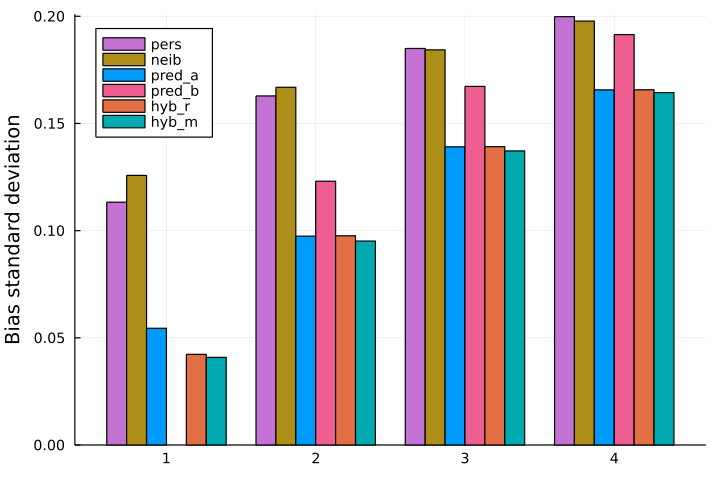

In [32]:
gb1 = groupedbar(Matrix(mns), leg=:none, 
    c=[4 5 1 7 2 6], 
    ylim=(0, 0.0205), ylabel="Bias mean")

gb2 = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    c=[4 5 1 7 2 6],
    ylim=(0, 0.201), ylabel="Bias standard deviation");

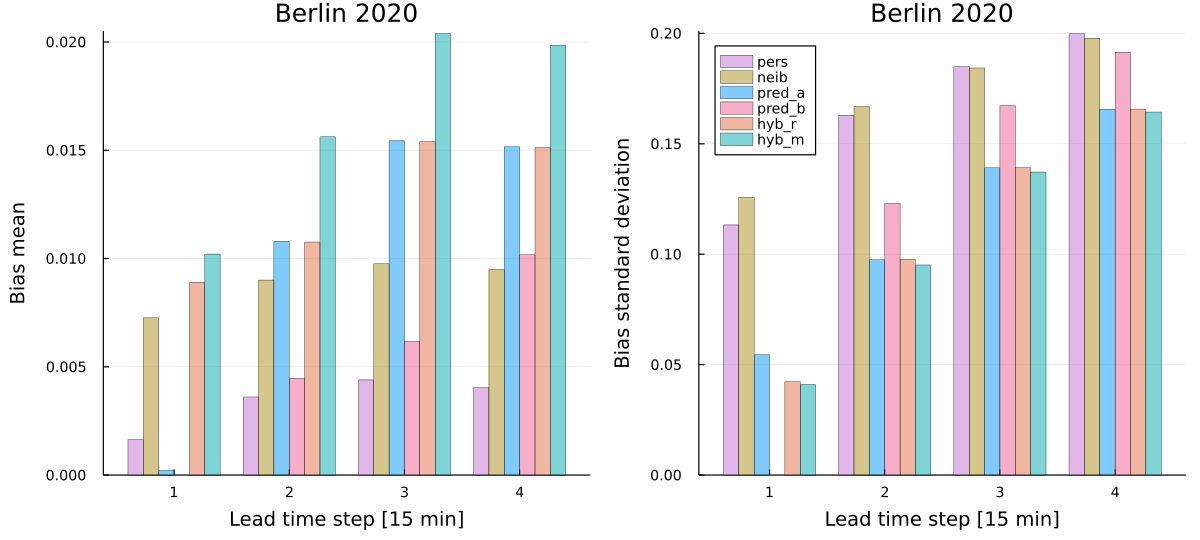

In [33]:
gbs = plot(gb1, gb2, layout=@layout([a b]), lw=0.3, fillalpha=0.5, grid=:y,
    xlabel="Lead time step [15 min]", title="Berlin 2020",
    leftmargin=20px, bottommargin=20px, size=(1000, 450))

In [37]:
gb1 = groupedbar(Matrix(mns), leg=:none, #outertopright, label=["pers" "neib" "pred" "hyb_m" "hyb_r"],
    c=[4 5 1 2 6], #lw=0.5, fillalpha=0.5, 
    ylim=(0, 0.0205), ylabel="Bias mean")

gb2 = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred" "hyb_r" "hyb_m"],
    c=[4 5 1 2 6],
    ylim=(0, 0.201), ylabel="Bias standard deviation");

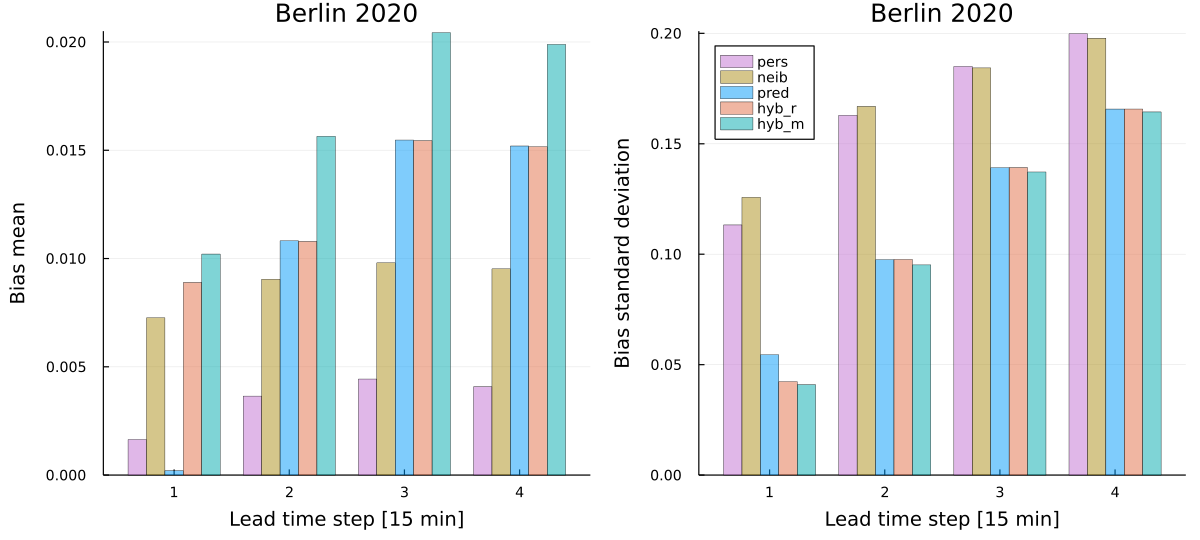

In [38]:
gbs = plot(gb1, gb2, layout=@layout([a b]), lw=0.3, fillalpha=0.5, grid=:y,
    xlabel="Lead time step [15 min]", title="Berlin 2020",
    leftmargin=20px, bottommargin=20px, size=(1000, 450))

#### CMF -> GHI

In [24]:
function getGHI(dff, steps)
    dff.ghi_pers = dff.ghiCS .* dff.pers
    dff.ghi_neib = dff.ghiCS .* dff.neib
    dff.ghi_pred = dff.ghiCS .* dff.pred
    dff.ghi_hyb_m = dff.ghiCS .* dff.hyb_m
    dff.ghi_hyb_r= dff.ghiCS .* dff.hyb_r;
    if steps > 1
        dff.ghi_pred_n = dff.ghiCS .* dff.pred_n
        df = dff[:, [:month, :ghi, :ghi_pers, :ghi_neib, :ghi_pred, :ghi_pred_n, :ghi_hyb_m, :ghi_hyb_r]]
    else
        df = dff[:, [:month, :ghi, :ghi_pers, :ghi_neib, :ghi_pred, :ghi_hyb_m, :ghi_hyb_r]]
    end
    return df
end

getGHI (generic function with 1 method)

In [25]:
df1g = getGHI(df1t, 1)

17635×7 DataFrame
   Row │ month  ghi       ghi_pers   ghi_neib   ghi_pred   ghi_hyb_m  ghi_hyb_r 
       │ Int8   Float64   Float64    Float64    Float64    Float64    Float64   
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1   1.77897   0.330331   0.257457   1.8874     0.330331   0.330331
     2 │     1   6.11257   4.6383     4.62108    6.09714    6.09714    6.09714
     3 │     1   7.99856  10.6094    10.5904     7.71657    7.71657    7.71657
     4 │     1   9.64207  11.6091    11.507      9.84336    9.84336    9.84336
     5 │     1   9.37202  12.6611    12.866     10.1499    10.1499    10.1499
     6 │     1  11.5218   11.5397    12.5593    12.6151    12.6151    12.6151
     7 │     1  14.7725   13.5238    16.447     16.8723    16.8723    16.8723
     8 │     1  15.687    16.7349    20.2407    16.5568    16.5568    16.5568
     9 │     1  15.4328   17.3263    21.2457    15.8667    15.8667    15.8667
    10 │     1  15.8647   16.6962    20.7866    17.0219    17.0219    17.0219
    11 │     1  19.6424   16.8695    21.0996    22.9107    22.9107    22.9107
   ⋮   │   ⋮       ⋮          ⋮          ⋮          ⋮          ⋮          ⋮
 17626 │    12  36.4291   38.8371    38.2085    34.225     34.225     34.225
 17627 │    12  31.5607   33.1193    34.209     30.7921    30.7921    30.7921
 17628 │    12  28.0762   28.0114    30.1601    27.806     27.806     27.806
 17629 │    12  25.564    24.1706    26.8989    25.8104    25.8104    25.8104
 17630 │    12  22.0262   21.1338    22.4428    21.9602    21.9602    21.9602
 17631 │    12  17.8653   17.1978    17.5921    17.8578    17.8578    17.8578
 17632 │    12  12.7699   12.785     12.8629    12.6106    12.6106    12.6106
 17633 │    12   7.58499   7.87246    7.87814    7.29778    7.29778    7.29778
 17634 │    12   2.93009   3.4161     3.42053    2.73503    2.73503    2.73503
 17635 │    12   0.17233   0.442887   0.443074   0.155122   0.155122   0.155122
                                                              17614 rows omitted

In [26]:
df2g = getGHI(df2t, 2)

17267×8 DataFrame
   Row │ month  ghi       ghi_pers   ghi_neib   ghi_pred  ghi_pred_n  ghi_hyb_m  ghi_hyb_r 
       │ Int8   Float64   Float64    Float64    Float64   Float64     Float64    Float64   
───────┼───────────────────────────────────────────────────────────────────────────────────
     1 │     1   6.11257   0.861273   0.671268   4.92103     5.09015   0.861273   0.861273
     2 │     1   7.99856   8.05054    8.02064   10.5826     10.4985   10.5826    10.4985
     3 │     1   9.64207  15.3984    15.3709    11.1998     11.7314   11.7314    11.7314
     4 │     1   9.37202  15.244     15.11      12.9254     13.1935   12.9254    13.1935
     5 │     1  11.5218   15.5895    15.8418    12.4975     12.6151   12.4975    12.4975
     6 │     1  14.7725   13.5449    14.7416    14.8071     16.8723   14.8071    14.8071
     7 │     1  15.687    15.3203    18.6318    19.1135     21.2468   19.1135    21.2468
     8 │     1  15.4328   18.4836    22.3558    18.2869     18.5269   18.2869    18.2869
     9 │     1  15.8647   18.7448    22.9851    17.1657     19.6507   17.1657    17.1657
    10 │     1  19.6424   17.7537    22.1032    18.1001     20.8954   18.1001    18.1001
    11 │     1  24.0906   17.6645    22.0939    23.9904     25.4302   23.9904    23.9904
   ⋮   │   ⋮       ⋮          ⋮          ⋮         ⋮          ⋮           ⋮          ⋮
 17258 │    12  45.9784   43.3218    43.559     44.548      44.2454   44.548     44.548
 17259 │    12  41.8863   42.4155    42.4354    42.7768     40.4484   42.7768    42.7768
 17260 │    12  36.4291   40.1989    38.6833    37.5039     35.7634   37.5039    37.5039
 17261 │    12  31.5607   35.3084    34.737     31.1154     30.7921   30.7921    30.7921
 17262 │    12  28.0762   29.3947    30.3619    27.3292     27.806    27.806     27.806
 17263 │    12  25.564    24.1148    25.9646    23.938      23.938    23.938     23.938
 17264 │    12  22.0262   19.9819    22.2374    21.3376     21.2022   21.2022    21.2022
 17265 │    12  17.8653   16.501     17.523     17.1462     16.8786   17.1462    16.8786
 17266 │    12  12.7699   12.3072    12.5894    12.7796     12.6106   12.7796    12.7796
 17267 │    12   7.58499   7.88173    7.9298     7.77422     7.41887   7.77422    7.77422
                                                                         17246 rows omitted

In [27]:
df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

In [53]:
dfm = dff[1:14, :]
tm = Dates.format.(dfm.time, "HH:MM")
tmTick = tm[1:10:100]

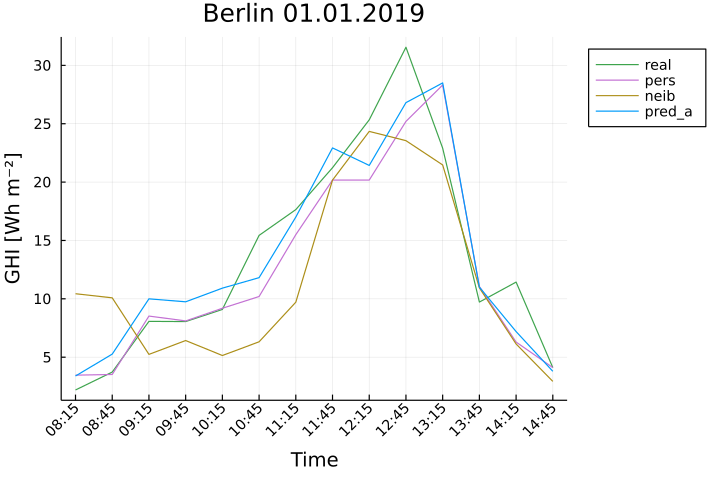

In [65]:
plot([dfm.ghi dfm.ghi_pers dfm.ghi_neib dfm.ghi_pred], leg=:outertopright,
    c=[3 4 5 1], label=["real" "pers" "neib" "pred_a"], 
    xticks=(1:14, tm), xrotation=45,
    xlabel="Time", ylabel="GHI [Wh m⁻²]", title="Berlin 01.01.2019")

##### GHI eval

In [45]:
function viz_ghi_err(dff, steps; tit="+$(15*2) min", err="mae")
    gb = groupby(dff, :month)
    if err == "mae"
        errs_pers = [meanad(g.ghi, g.ghi_pers) for g in gb]
        errs_neib = [meanad(g.ghi, g.ghi_neib) for g in gb]
        errs_pred = [meanad(g.ghi, g.ghi_pred) for g in gb]

        errs_hyb_m = [meanad(g.ghi, g.ghi_hyb_m) for g in gb]
        errs_hyb_r = [meanad(g.ghi, g.ghi_hyb_r) for g in gb]
    elseif err == "rmse"
        errs_pers = [rmsd(g.ghi, g.ghi_pers) for g in gb]
        errs_neib = [rmsd(g.ghi, g.ghi_neib) for g in gb]
        errs_pred = [rmsd(g.ghi, g.ghi_pred) for g in gb]

        errs_hyb_m = [rmsd(g.ghi, g.ghi_hyb_m) for g in gb]
        errs_hyb_r = [rmsd(g.ghi, g.ghi_hyb_r) for g in gb]
    end
    if steps > 1
        err == "mae" ?
            (errs_pred_n = [meanad(g.ghi, g.ghi_pred_n) for g in gb]) :
            (errs_pred_n = [rmsd(g.ghi, g.ghi_pred_n) for g in gb])
        errs = [errs_pers errs_neib errs_pred errs_pred_n errs_hyb_m errs_hyb_r]
        clr = [4 5 1 7 6 2]
    else
        errs = [errs_pers errs_neib errs_pred errs_hyb_m errs_hyb_r]
        clr = [4 5 1 6 2]
    end
    steps == 3 ? 
        (lab = ["pers" "neib" "pred_a" "pred_b" "hyb_m" "hyb_r"]) : 
        (lab = "")
    p = plot(errs, c=clr, label=lab, fillalpha=0.5, marker=(0.7, stroke(0)), title=tit)
    return p
end

viz_ghi_err (generic function with 1 method)

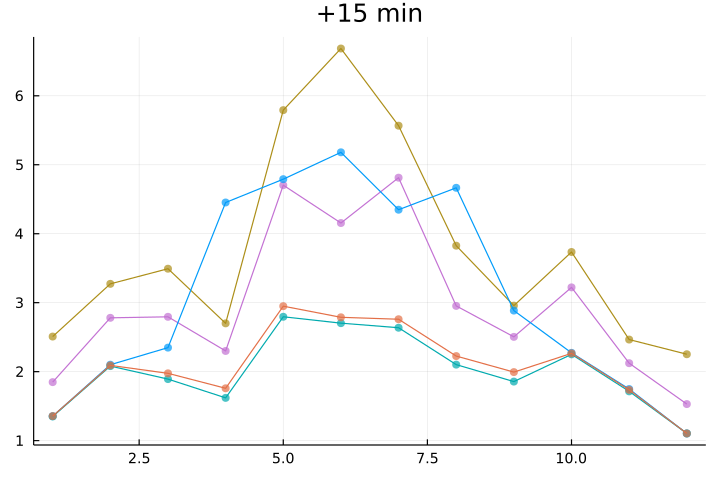

In [37]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

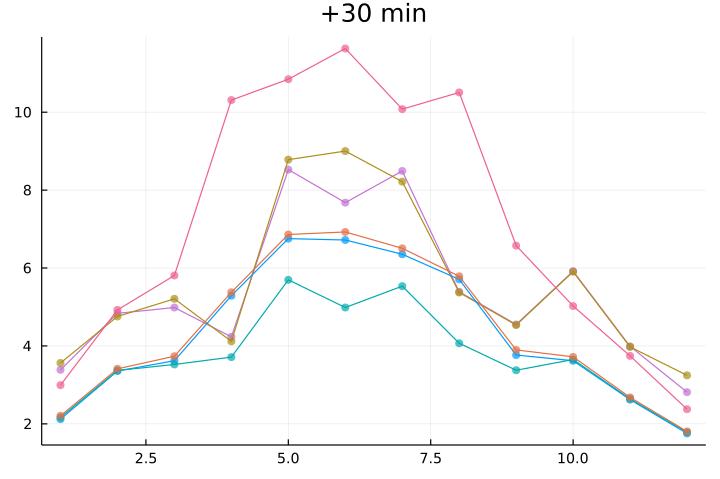

In [38]:
pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")

In [39]:
pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")
pg4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min");

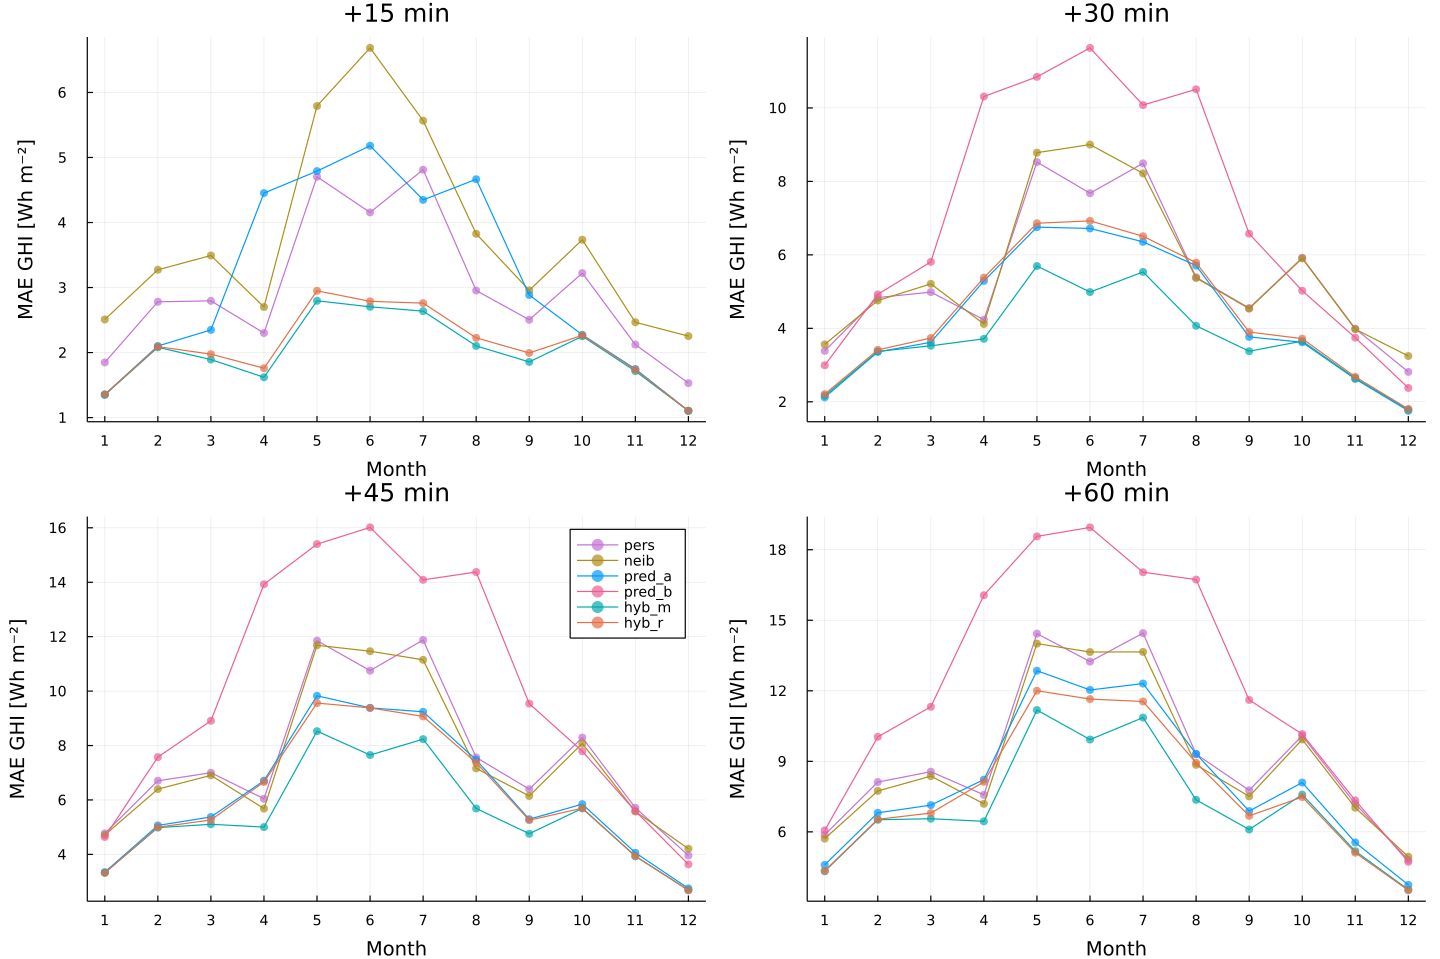

In [40]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

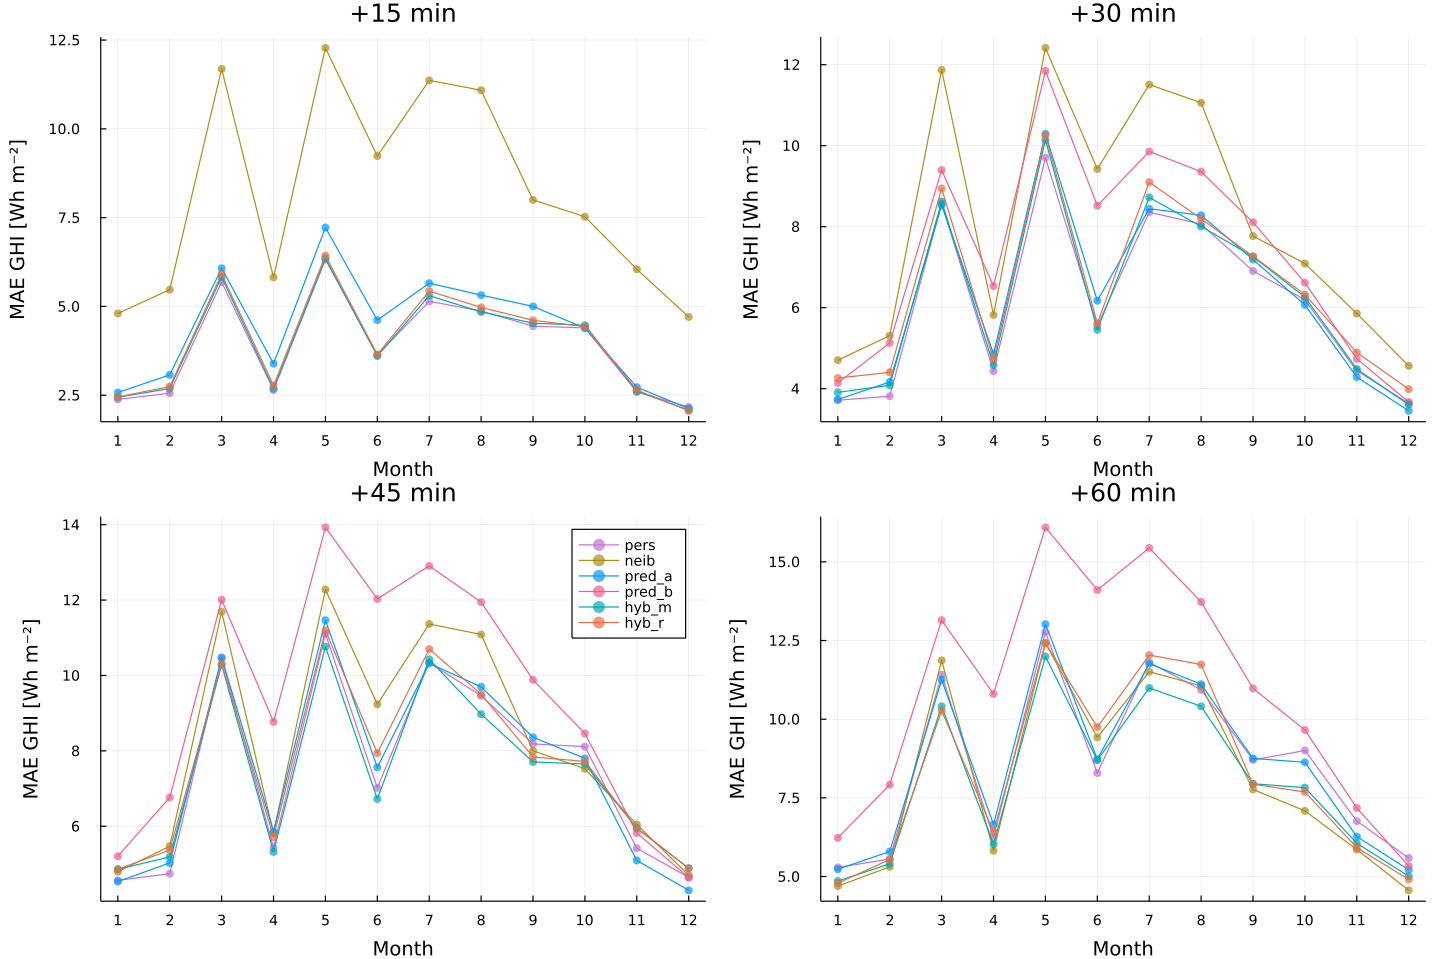

In [46]:
# older version
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

In [53]:
pgr1 = viz_ghi_rmse(df1, 1; tit="+$(15*1) min")

pgr2 = viz_ghi_rmse(df2, 2; tit="+$(15*2) min")
pgr3 = viz_ghi_rmse(df3, 3; tit="+$(15*3) min")
pgr4 = viz_ghi_rmse(df4, 4; tit="+$(15*4) min");

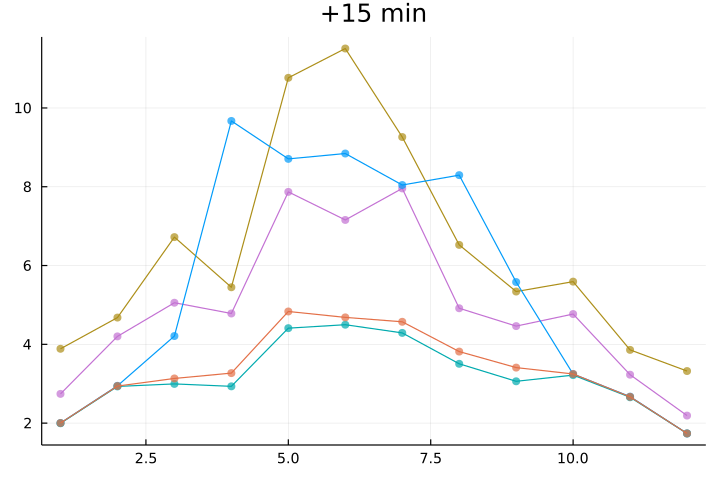

In [51]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

In [49]:
pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")

pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")

pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse");

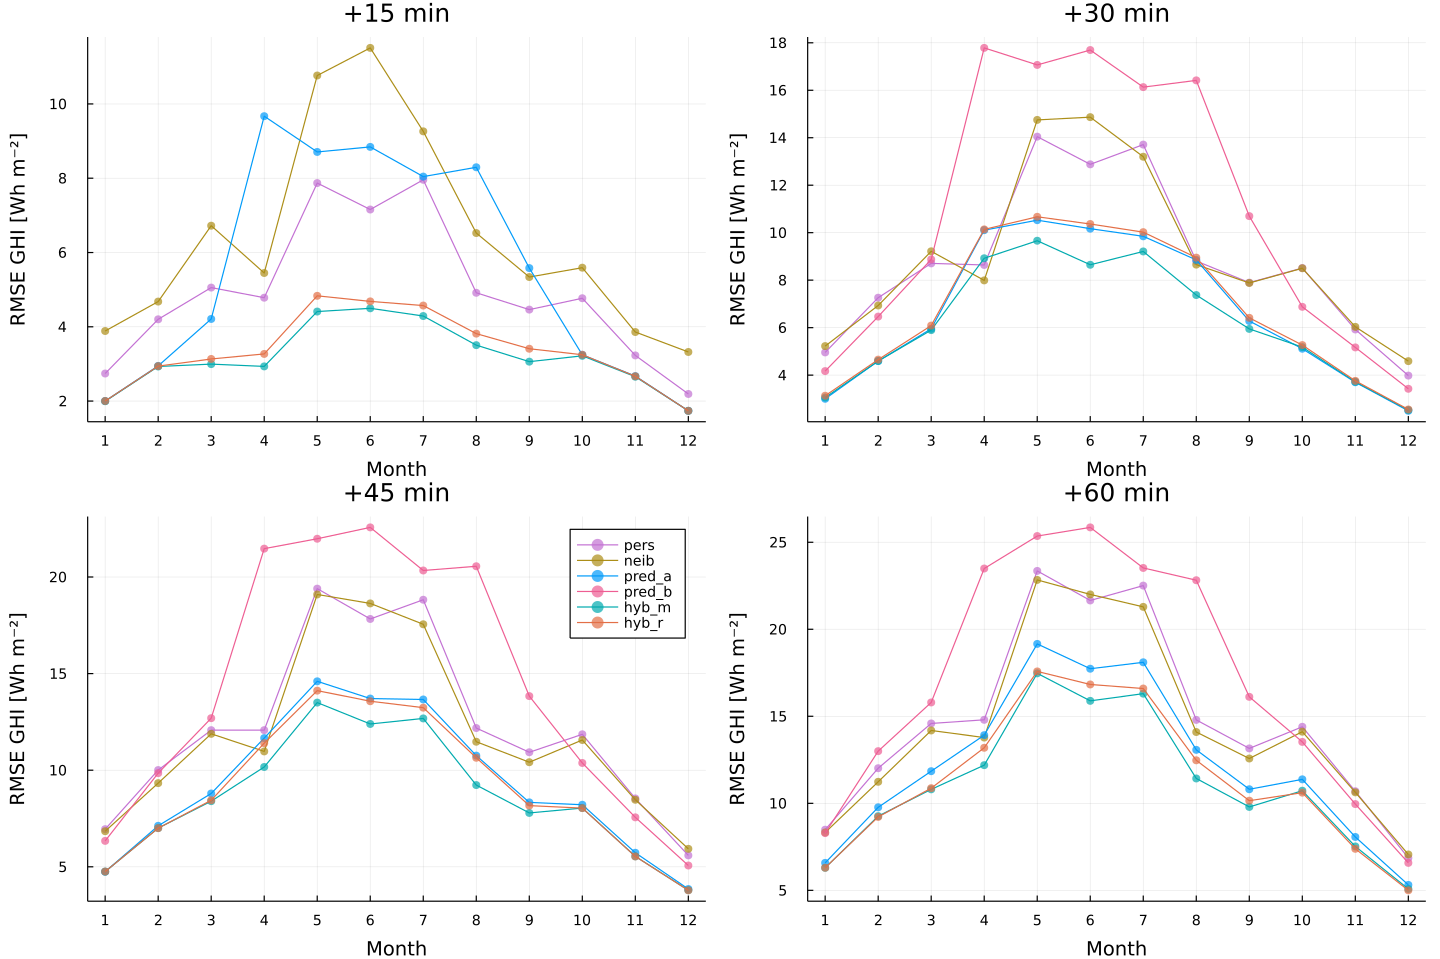

In [52]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")

In [85]:
euclidean(dff.ghi, dff.ghi_pers)

1513.84900750263

In [77]:
sqeuclidean(dff.ghi, dff.ghi_neib)

1.8847884328074353e6

In [79]:
cosine_dist(dff.ghi, dff.ghi_pers)

0.0045423139797607925

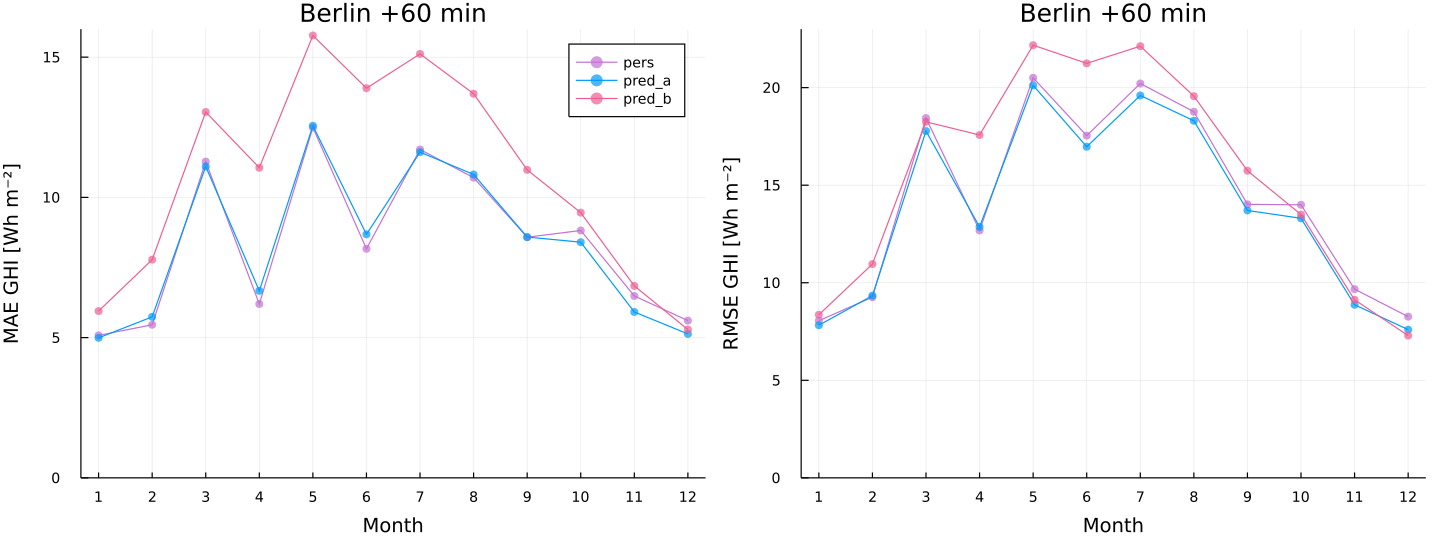

In [138]:
ps = plot(lp1, lp2, layout=@layout([a b]), size=(1200, 450), xtick=1:12, 
    xlabel="Month", title="Berlin +60 min", 
    leftmargin=20px, bottommargin=20px)

In [78]:
p1 = plot([df1.ghi df1.ghi_pers], c=[3 4], label=["real" "pers"],
    ylabel="GHI [Wh m⁻²]", title="Berlin +60 min")

p2 = plot([df1.ghi df1.ghi_pred], c=[3 1], label=["real" "pred_a"],
    ylabel="GHI [Wh m⁻²]")

p3 = plot([df1.ghi df1.ghi_pred_n], c=[3 7], label=["real" "pred_b"], xlabel="Time [15min]", 
    ylabel="GHI [Wh m⁻²]");

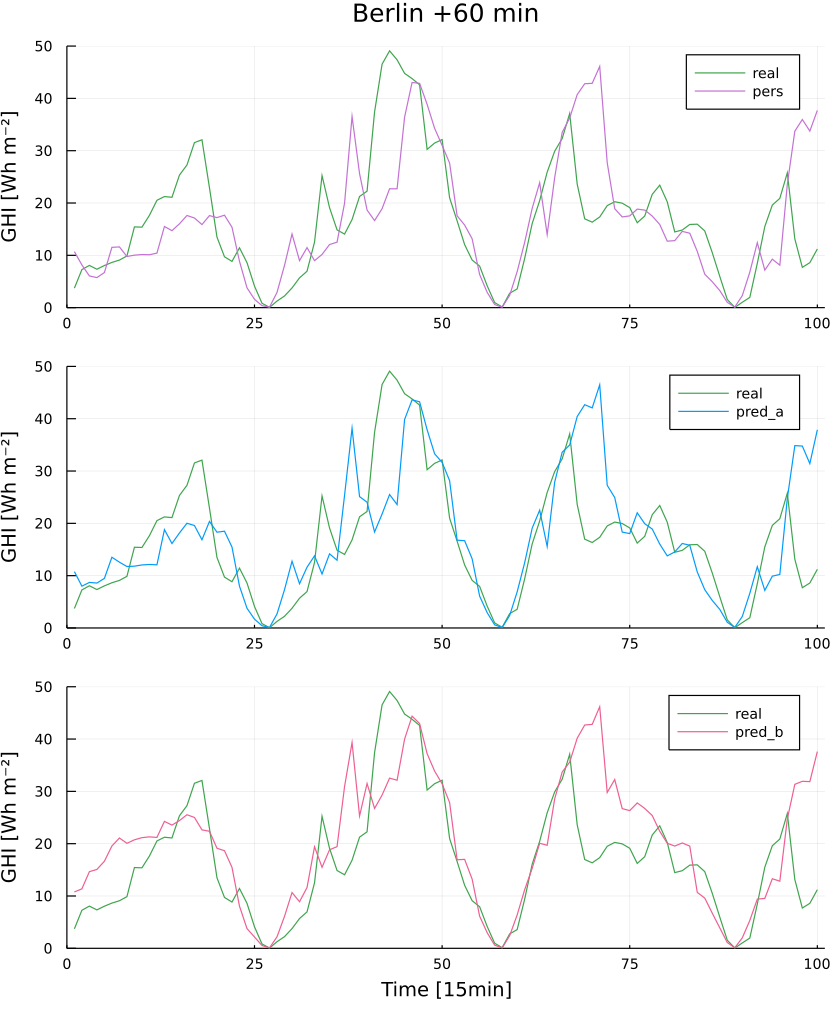

In [84]:
ps = plot(p1, p2, p3, layout=@layout([a;b;c]), xlim=(0,101), ylim=(0,50), size=(700, 850))

#### distri

In [17]:
h_train = histogram(data_train, bins=binStarts, xticks=xti, ylabel="Counts",
    title="Berlin train (02.2004 - 12.2018)")

h_test = histogram(data_test, bins=binStarts, xticks=xti, 
    title="test (2019)");

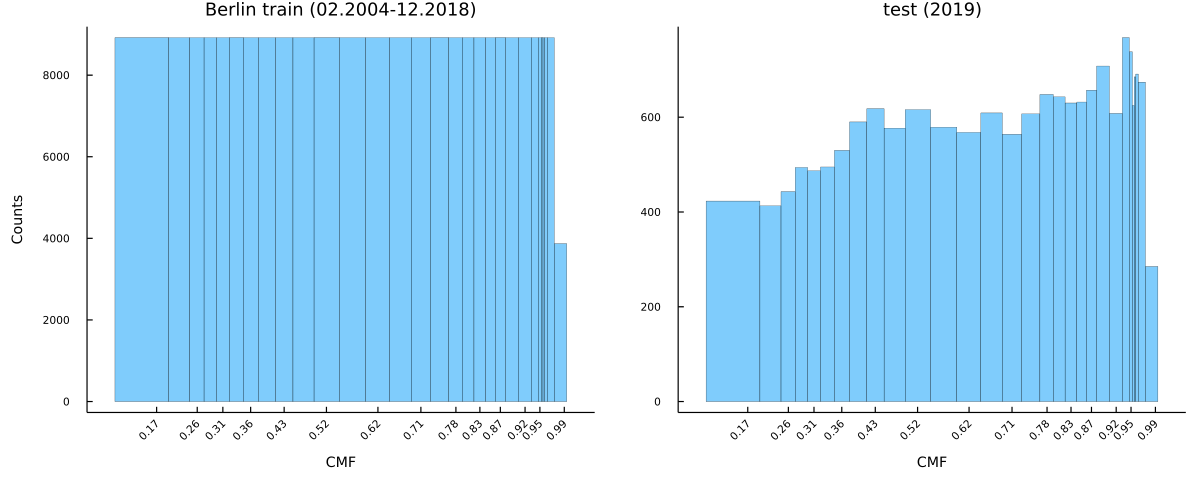

In [23]:
h_ep = plot(h_train, h_test, layout=@layout([a b]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, 
    leftmargin=20px, bottommargin=20px, size=(1000,400))

In [63]:
h_train = histogram(data_train, bins=binStarts, xticks=xti, ylabel="Counts",
    title="Berlin train (02.2004 - 12.2018)")

h_vali = histogram(df21.real, bins=binStarts, xticks=xti, 
    title="validation (2019)")

h_test = histogram(df21_2020.real, bins=binStarts, xticks=xti, 
    title="test (2020)")

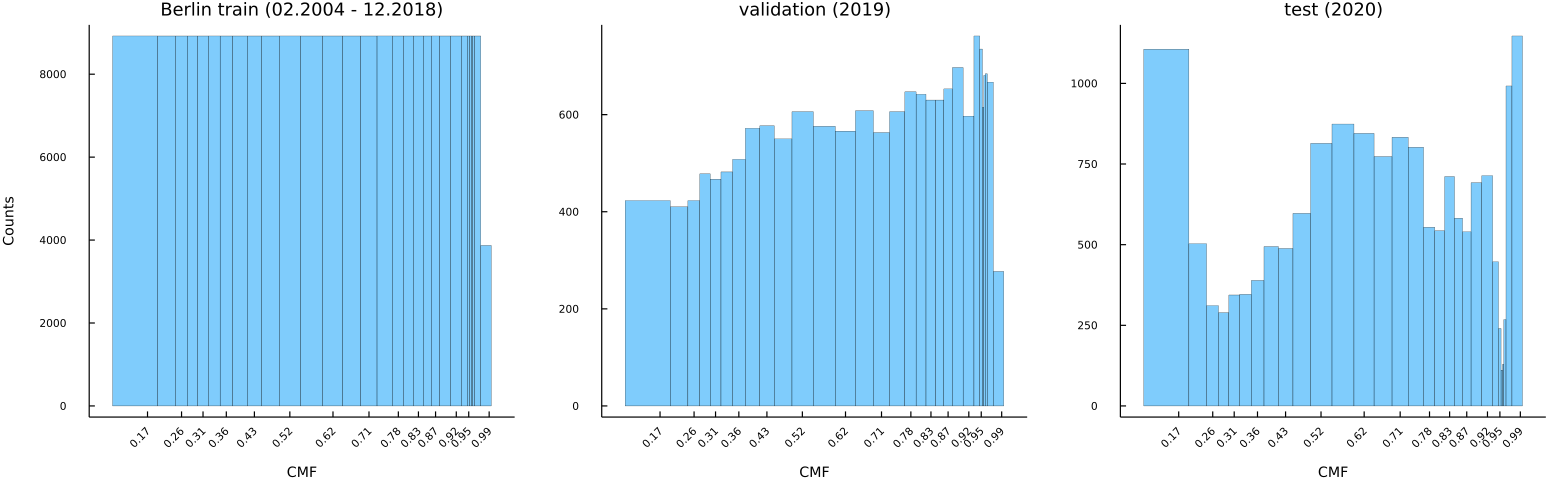

In [66]:
hists = plot(h_train, h_vali, h_test, layout=@layout([a b c]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, 
    leftmargin=20px, bottommargin=20px, size=(1300,400))

#### scatter

In [11]:
df2 = getDF(2, 1, 10)
# df21.dif_cmf = [NaN; diff(df21.real)]
df2.real_cls_prev = Int64.([1; df2.real_cls[1:end-1]])

first(df2, 5)

5×11 DataFrame
 Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred   dif_cls_pred  real_cls_prev 
     │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64    Int64         Int64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3  0.154549              2              1
   2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2  0.134207              1              1
   3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1  0.112377              0              1
   4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1  0.104033              0              1
   5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1  0.0151802             0              1

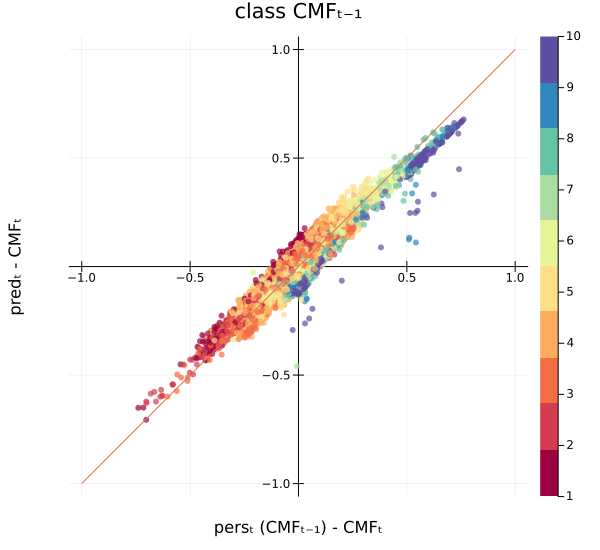

In [12]:
@df df2 scatter(:dif_pers, :dif_pred, marker_z=:real_cls_prev, frame=:origin, 
        c=palette(:Spectral_10), 
        marker=(0.7, stroke(0)), label="", fmt=:png, size=(600,550),
        xlabel="persₜ (CMFₜ₋₁) - CMFₜ", ylabel="predₜ - CMFₜ", title="class CMFₜ₋₁")
plot!(-1:1, -1:1, label="")

In [88]:
gb = groupby(df2, :real_cls)

GroupedDataFrame with 10 groups based on key: real_cls
First Group (1279 rows): real_cls = 1
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64      Int64         Int64         
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3   0.154549               2              1
    2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2   0.134207               1              1
    3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1   0.112377               0              1
    4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1   0.104033               0              1
    5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1   0.0151802              0              1
    6 │ 0.227377         1  0.240145         1   0.0127687              0  0.255325         1   0.0279489              0              1
    7 │ 0.182802         1  0.227377         1   0.0445747              0  0.255325         1   0.0725236              0              1
    8 │ 0.18157          1  0.182802         1   0.00123228             0  0.255325         1   0.0737559              0              1
    9 │ 0.180078         1  0.18157          1   0.00149155             0  0.255325         1   0.0752474              0              1
   10 │ 0.178091         1  0.180078         1   0.00198684             0  0.255325         1   0.0772343              0              1
   11 │ 0.18459          1  0.178091         1  -0.00649838             0  0.255325         1   0.0707359              0              1
  ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮              ⋮
 1269 │ 0.25633          1  0.190261         1  -0.0660697              0  0.255325         1  -0.00100483             0              1
 1270 │ 0.176517         1  0.3559           3   0.179383               2  0.402693         3   0.226177               2              3
 1271 │ 0.179369         1  0.422837         3   0.243468               2  0.361469         3   0.1821                 2              3
 1272 │ 0.191017         1  0.179369         1  -0.0116474              0  0.304889         2   0.113872               1              1
 1273 │ 0.197843         1  0.191017         1  -0.00682613             0  0.255325         1   0.0574827              0              1
 1274 │ 0.188337         1  0.424252         3   0.235915               2  0.361469         3   0.173132               2              3
 1275 │ 0.201647         1  0.302318         2   0.100671               1  0.371948         3   0.170302               2              2
 1276 │ 0.184874         1  0.201647         1   0.0167722              0  0.274445         2   0.0895708              1              1
 1277 │ 0.18662          1  0.423038         3   0.236418               2  0.361469         3   0.174849               2              3
 1278 │ 0.266667         1  0.307581         2   0.0409142              1  0.371948         3   0.105281               2              2
 1279 │ 0.253142         1  0.36159          3   0.108449               2  0.42237          3   0.169228               2              3
                                                                                                                       1257 rows omitted
⋮
Last Group (2024 rows): real_cls = 10
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      

In [95]:
err_pred = [meanad(g.pred, g.real) for g in gb]
err_pers = [meanad(g.pers, g.real) for g in gb]

In [126]:
err_pred .< err_pers

10-element BitVector:
 0
 0
 1
 1
 1
 1
 0
 0
 0
 0

In [111]:
errs = vcat(err_pred, err_pers)

20-element Vector{Float64}:
 0.08811518982537545
 0.07832233896011273
 0.11979673935208222
 0.09928658886410813
 0.10899578112302225
 0.06765894025158821
 0.05541326537891929
 0.055954897461716106
 0.027623323262932195
 0.066326727879665
 0.060053271966327516
 0.06812574921155204
 0.12005925333302456
 0.1030487561588208
 0.11513686808771226
 0.07252460994540501
 0.04952250712540409
 0.03674198877577793
 0.011650384349865569
 0.01715140615555718

In [99]:
tickss = rd.(binMean, 2)
xticks = repeat(string.(tickss), outer=2)

mode = repeat(["pred", "pers"], inner=10);

#### 1.-order dif

In [14]:
df2t

17267×20 DataFrame
   Row │ time                 month  ghi       ghiCS     real      pers      neib       pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_neib      dif_pred      mae_min  hyb_m     rmse_mi ⋯
       │ DateTime             Int8   Float64   Float64   Float64   Float64   Float64    Float64   Float64   Float64      Int64     Float64      Float64       Float64       Int64    Float64   Int64   ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T08:00:00      1   6.11257   7.4498   0.820501  0.11561   0.0901055  0.660559  0.68326   -0.137241          19  -0.704891    -0.730395     -0.159942           0  0.11561           ⋯
     2 │ 2020-01-01T08:15:00      1   7.99856  12.9304   0.618588  0.622607  0.620296   0.81843   0.811926   0.193339          13   0.00401935   0.00170756    0.199842           3  0.81843
     3 │ 2020-01-01T08:30:00      1   9.64207  18.7671   0.513775  0.820501  0.819034   0.596779  0.625106   0.111332          11   0.306726     0.305259      0.0830044          3  0.596779
     4 │ 2020-01-01T08:45:00      1   9.37202  24.6433   0.380308  0.618588  0.613148   0.524501  0.535381   0.155073           8   0.23828      0.232841      0.144193           3  0.524501
     5 │ 2020-01-01T09:00:00      1  11.5218   30.3431   0.379717  0.513775  0.522088   0.411875  0.415747   0.0360303          8   0.134058     0.142371      0.0321577          3  0.411875          ⋯
     6 │ 2020-01-01T09:15:00      1  14.7725   35.6156   0.414777  0.380308  0.413909   0.415747  0.473733   0.0589561          9  -0.0344691   -0.000868069   0.000970584        3  0.415747
     7 │ 2020-01-01T09:30:00      1  15.687    40.3467   0.388806  0.379717  0.461792   0.473733  0.526605   0.137799           8  -0.00908955   0.0729856     0.0849263          3  0.473733
     8 │ 2020-01-01T09:45:00      1  15.4328   44.5628   0.346315  0.414777  0.501669   0.410363  0.415747   0.0694324          6   0.0684618    0.155354      0.0640483          3  0.410363
     9 │ 2020-01-01T10:00:00      1  15.8647   48.211    0.329067  0.388806  0.47676    0.356054  0.407598   0.0785311          6   0.0597394    0.147693      0.0269866          3  0.356054          ⋯
    10 │ 2020-01-01T10:15:00      1  19.6424   51.2647   0.383156  0.346315  0.431159   0.353071  0.407598   0.0244424          8  -0.0368409    0.0480034    -0.0300849          3  0.353071
    11 │ 2020-01-01T10:30:00      1  24.0906   53.6805   0.448777  0.329067  0.411582   0.446911  0.473733   0.0249554         10  -0.11971     -0.0371956    -0.00186673         3  0.446911
   ⋮   │          ⋮             ⋮       ⋮         ⋮         ⋮         ⋮          ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮             ⋮           ⋮        ⋮         ⋮    ⋱
 17258 │ 2020-12-31T12:15:00     12  45.9784   53.0285   0.867051  0.816953  0.821426   0.840077  0.834369  -0.0326817         21  -0.0500983   -0.0456254    -0.0269741          3  0.840077
 17259 │ 2020-12-31T12:30:00     12  41.8863   50.0028   0.837679  0.848262  0.848659   0.855488  0.808923  -0.0287554         20   0.0105829    0.0109807     0.0178096          3  0.855488          ⋯
 17260 │ 2020-12-31T12:45:00     12  36.4291   46.3627   0.785741  0.867051  0.834362   0.808923  0.771382  -0.0143589         17   0.08131      0.048621      0.0231821          3  0.808923
 17261 │ 2020-12-31T13:00:00     12  31.5607   42.1503   0.748764  0.837679  0.824121   0.7382    0.730529  -0.0182349         16   0.0889143    0.0753566    -0.010564           3  0.7382
 17262 │ 2020-12-31T13:15:00     12  28.0762   37.4102   0.750495  0.785741  0.811596   0.730529  0.743275  -0.00722027        16   0.0352456    0.0611001    -0.0199661          3  0.730529
 17263 │ 2020-12-31T13:30:00     12  25.564    32.2062   0.793761  0.748764  0.8062     0.743275

In [164]:
te = first(df3t, 5)
te.diff = [missing; diff(te.real)]
te

5×19 DataFrame
 Row │ time                 month  ghi       ghiCS    real      pers      neib       pred      real_cls  dif_pers    dif_neib   dif_pred     mae_min  hyb_m     dif_hyb_m    rmse_min  hyb_r     dif_h ⋯
     │ DateTime             Int8   Float64   Float64  Float64   Float64   Float64    Float64   Int64     Float64     Float64    Float64      Int64    Float64   Float64      Int64     Float64   Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2020-01-01T08:15:00      1   7.99856  12.9304  0.618588  0.11561   0.0901055  0.660559        13  -0.502978   -0.528482   0.0419709         0  0.11561   -0.502978           0  0.11561   -0.50 ⋯
   2 │ 2020-01-01T08:30:00      1   9.64207  18.7671  0.513775  0.622607  0.620296   0.81843         11   0.108832    0.106521   0.304655          3  0.81843    0.304655           3  0.81843    0.30
   3 │ 2020-01-01T08:45:00      1   9.37202  24.6433  0.380308  0.820501  0.819034   0.596779         8   0.440193    0.438726   0.216472          3  0.596779   0.216472           3  0.596779   0.21
   4 │ 2020-01-01T09:00:00      1  11.5218   30.3431  0.379717  0.618588  0.613148   0.524501         8   0.238871    0.233431   0.144784          3  0.524501   0.144784           3  0.524501   0.14
   5 │ 2020-01-01T09:15:00      1  14.7725   35.6156  0.414777  0.513775  0.522088   0.411875         9   0.0989982   0.107311  -0.00290202        3  0.411875  -0.00290202         3  0.411875  -0.00 ⋯
                                                                                                                                                                                       2 columns omitted

In [172]:
te = te[2:end, :]

4×19 DataFrame
 Row │ time                 month  ghi       ghiCS    real      pers      neib      pred      real_cls  dif_pers   dif_neib  dif_pred     mae_min  hyb_m     dif_hyb_m    rmse_min  hyb_r     dif_hyb_ ⋯
     │ DateTime             Int8   Float64   Float64  Float64   Float64   Float64   Float64   Int64     Float64    Float64   Float64      Int64    Float64   Float64      Int64     Float64   Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2020-01-01T08:30:00      1   9.64207  18.7671  0.513775  0.622607  0.620296  0.81843         11  0.108832   0.106521   0.304655          3  0.81843    0.304655           3  0.81843    0.30465 ⋯
   2 │ 2020-01-01T08:45:00      1   9.37202  24.6433  0.380308  0.820501  0.819034  0.596779         8  0.440193   0.438726   0.216472          3  0.596779   0.216472           3  0.596779   0.21647
   3 │ 2020-01-01T09:00:00      1  11.5218   30.3431  0.379717  0.618588  0.613148  0.524501         8  0.238871   0.233431   0.144784          3  0.524501   0.144784           3  0.524501   0.14478
   4 │ 2020-01-01T09:15:00      1  14.7725   35.6156  0.414777  0.513775  0.522088  0.411875         9  0.0989982  0.107311  -0.00290202        3  0.411875  -0.00290202         3  0.411875  -0.00290
                                                                                                                                                                                       2 columns omitted

In [166]:
skipmissing(te.diff)

skipmissing(Union{Missing, Float64}[missing, -0.10481306841464433, -0.13346733946703426, -0.0005906499631407325, 0.03505974238175391])

In [57]:
function viz_dif1(df, steps)
    df.dif_cmf = [missing; diff(df.real)] #-df.dif_pers
    df = df[2:end, :]
    max_dif = floor(maximum(df.dif_cmf[2:end]); digits=1)
    min_dif = floor(minimum(df.dif_cmf[2:end]); digits=1)    
    difBinStarts = collect(min_dif:0.1:max_dif)
    df.cls_dif_cmf = classify(df.dif_cmf, difBinStarts)
#     df = filter(:dif_neib => d -> !isnan(d), df)    
    gb = groupby(df, :cls_dif_cmf)
    bin_mn = [mean(g.dif_cmf) for g in gb]
    mae_pers = [meanad(g.pers, g.real) for g in gb]
    mae_pred = [meanad(g.pred, g.real) for g in gb]
    mae_neib = [meanad(g.neib, g.real) for g in gb]
    mae_hyb_r = [meanad(g.hyb_r, g.real) for g in gb] 
    mae_hyb_m = [meanad(g.hyb_m, g.real) for g in gb]    
#     rmse_pers = [rmsd(g.pers, g.real) for g in gb]
#     rmse_pred = [rmsd(g.pred, g.real) for g in gb]
#     rmse_pred_b = [rmsd(g.pred_n, g.real) for g in gb]
    if steps != 1
        mae_pred_b = [meanad(g.pred_n, g.real) for g in gb]
        maes = [mae_pers mae_neib mae_pred mae_pred_b mae_hyb_m mae_hyb_r]        
        clr = [4 5 1 7 6 2]
    else
        maes = [mae_pers mae_neib mae_pred mae_hyb_m mae_hyb_r]
        clr = [4 5 1 6 2]        
    end        
#     if steps == 1
#         difs = [dif_pers_mn, dif_pred_a, dif_neib]
#         cl = [4 1 5]
#     else
#         dif_pred_b = [mean(g.dif_pred_n) for g in gb]
#         difs = [dif_pers_mn, dif_pred_a, dif_pred_b]
#         cl = [4 1 7]
#     end
#     steps == 2 ? lab = ["pers" "pred_a" "pred_b" "neib_w" "hyb_m"] : lab = false
    steps == 2 ? lab = ["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"] : lab = false
#     labDic = Dict(1 => "realₜ₋₁", 2 => "realₜ₋₂",
#                   3 => "realₜ₋₃", 4 => "realₜ₋₄")
#     real = labDic[steps]
    p = plot(bin_mn, maes, c=clr, label=lab, leg=:bottomleft,
        marker=(0.7, stroke(0)), frame=:origin, #aspect_ratio=1, 
        xticks=rd.(bin_mn,2), xrotation=45, tickfontsize=6, 
        xlabel="ΔCMF (realₜ - realₜ₋₁)", ylabel="MAEₜ", title="+$(15*steps) min") 
    return p
end

viz_dif1 (generic function with 1 method)

In [147]:
dif1 = viz_dif(df21, 1)

LoadError: ArgumentError: column name :hyb_m not found in the data frame

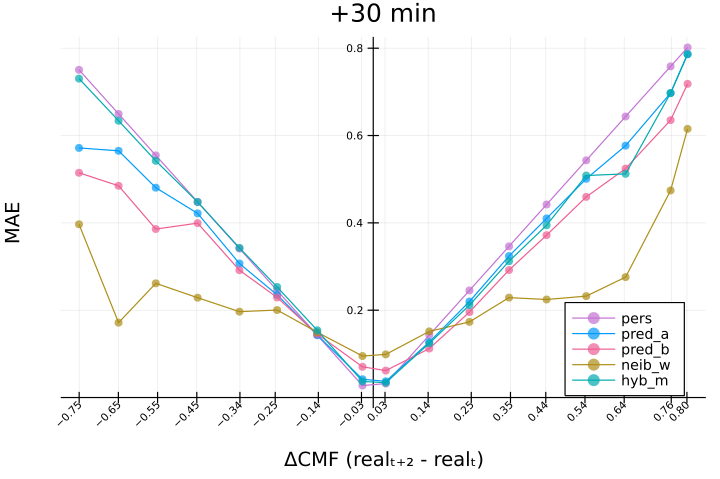

In [90]:
dif2 = viz_dif(df22, 2)

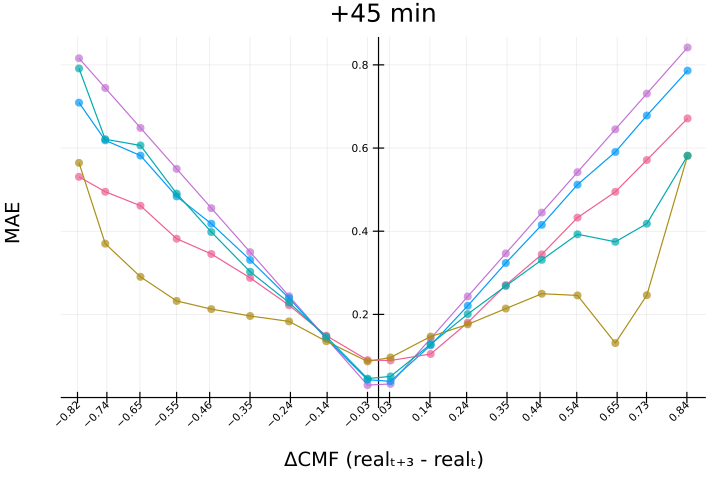

In [68]:
dif3 = viz_dif(df23, 3)

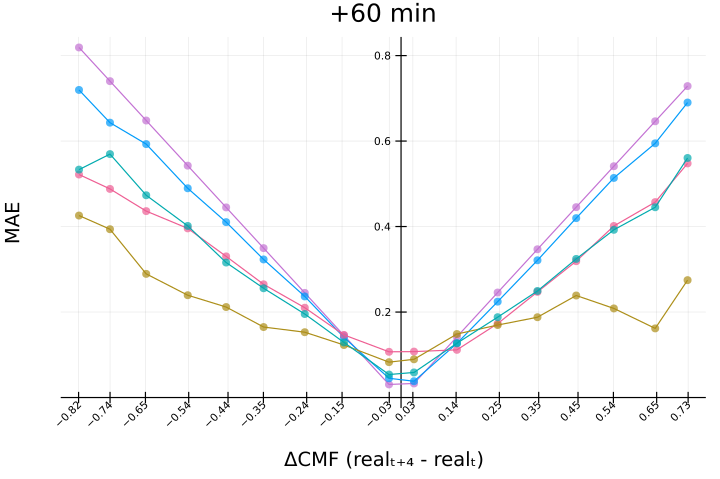

In [69]:
dif4 = viz_dif(df24, 4)

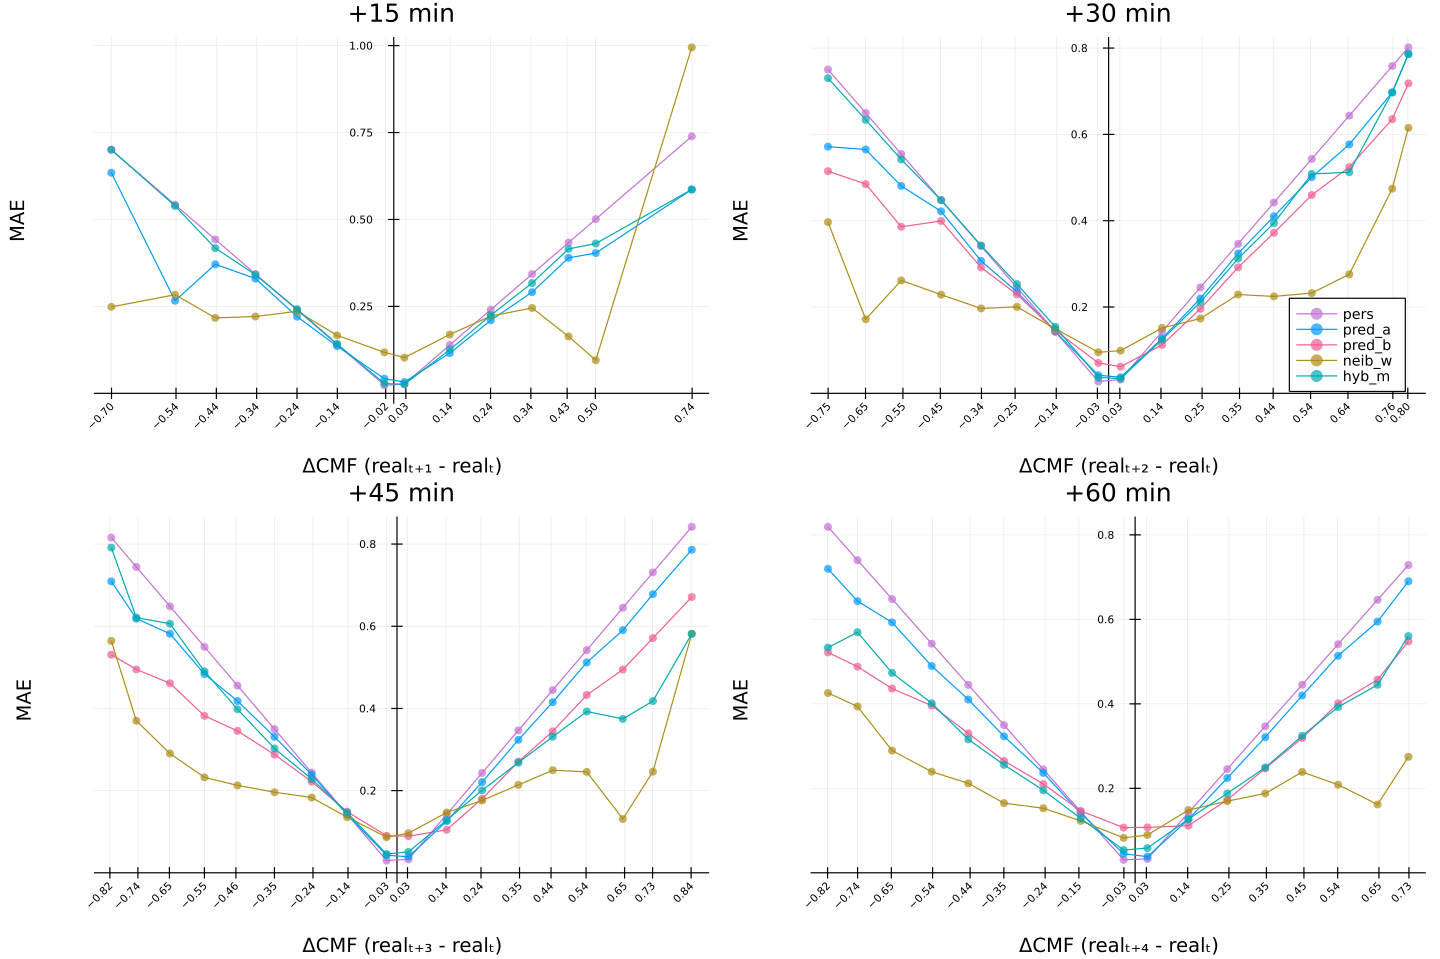

In [91]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAE")

try after neib & hyb fix:

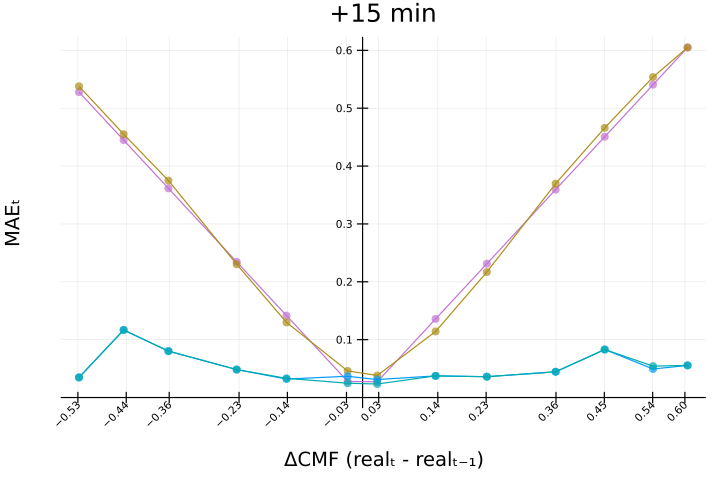

In [18]:
dif1 = viz_dif(df1t, 1)

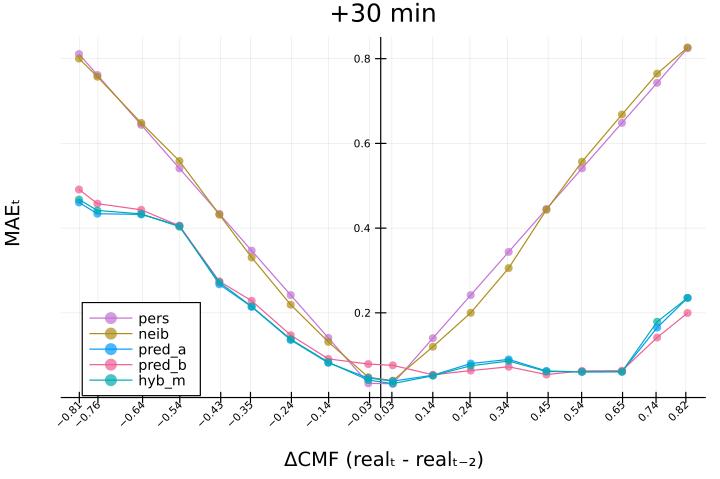

In [19]:
dif2 = viz_dif(df2t, 2)

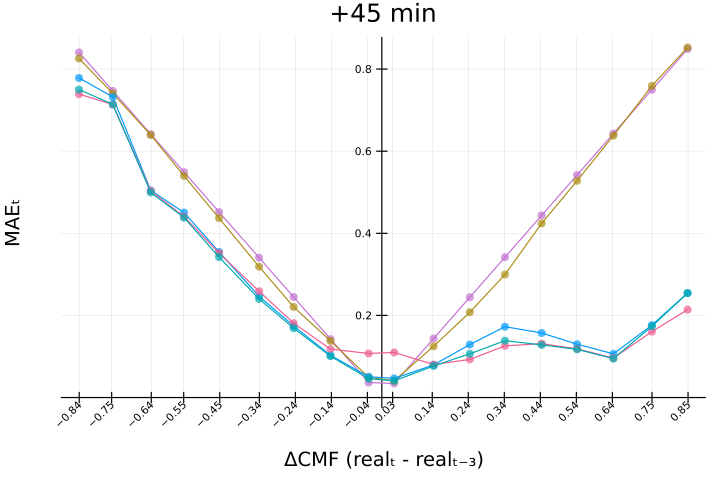

In [20]:
dif3 = viz_dif(df3t, 3)

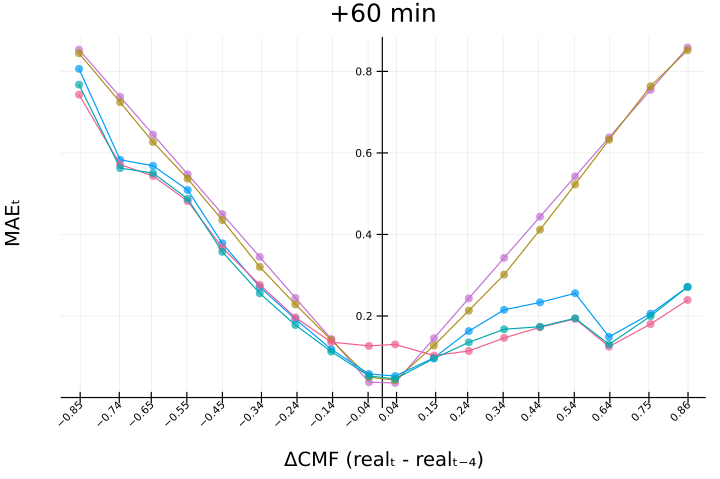

In [22]:
dif4 = viz_dif(df4t, 4)

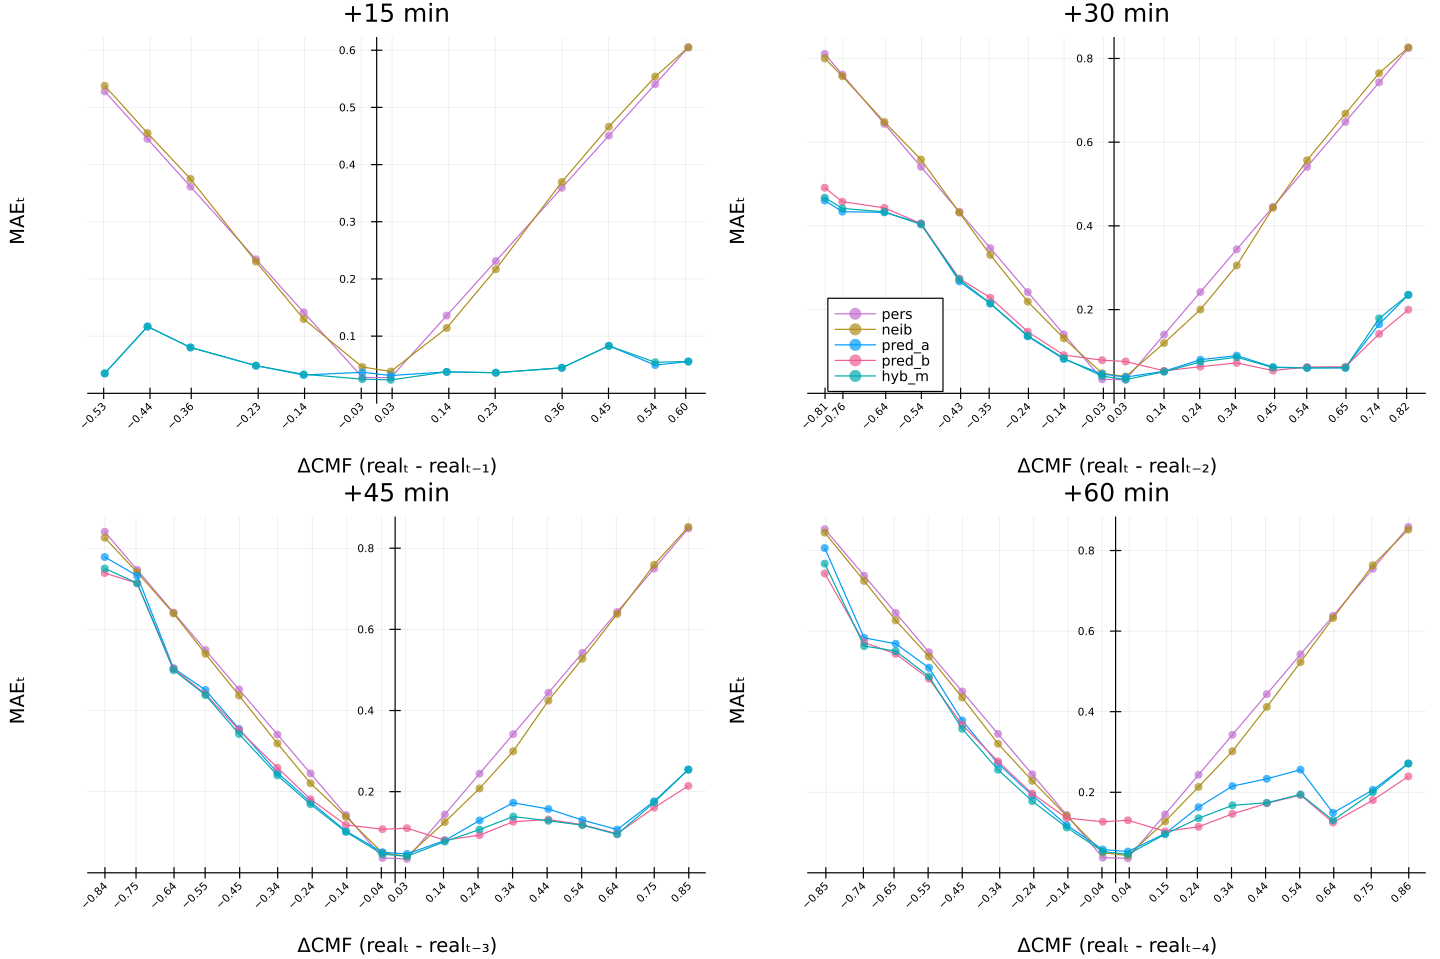

In [23]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

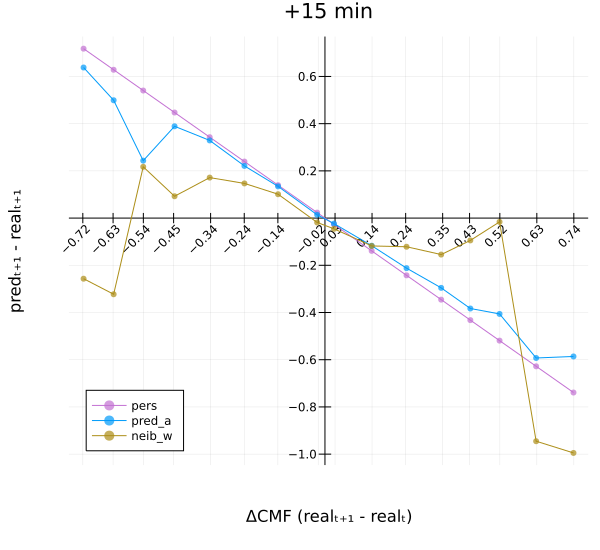

In [14]:
p21_w = dif_viz(df21, 1)

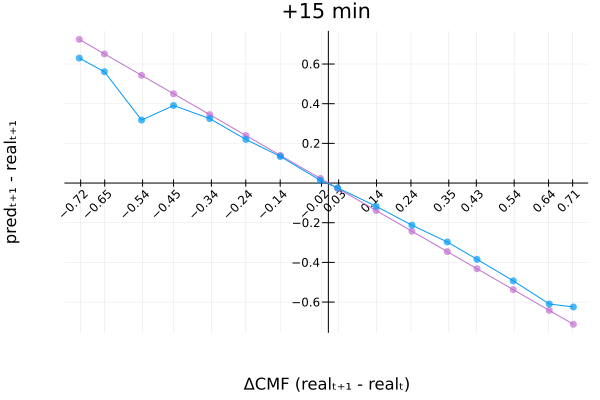

In [90]:
p21 = dif_viz(df21, 1)

In [91]:
p22 = dif_viz(df22, 2)
p23 = dif_viz(df23, 3)
p24 = dif_viz(df24, 4);

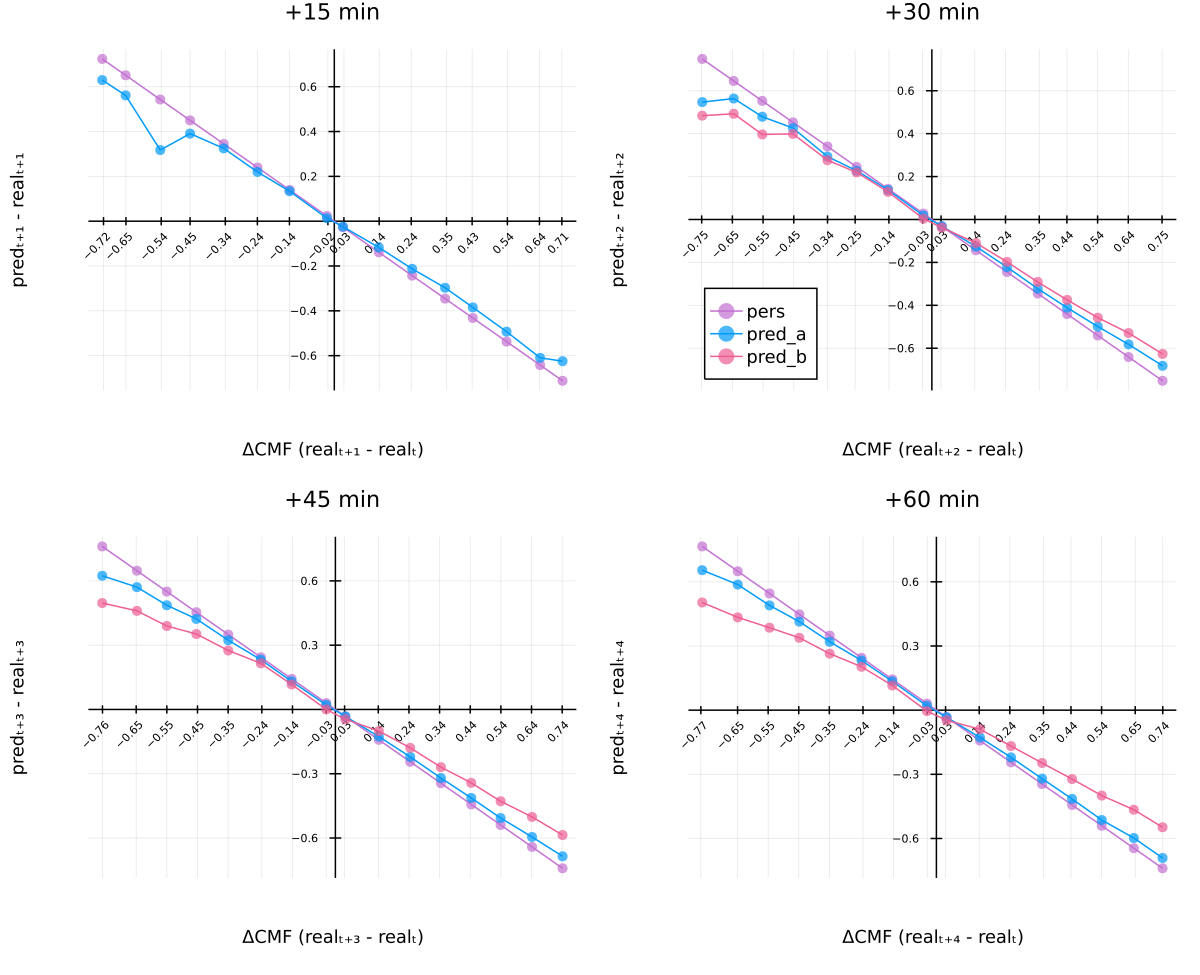

In [93]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), tickfontsize=5, labelfontsize=8, titlefontsize=10, 
    size=(800, 650), dpi=:150, fmt=:png)

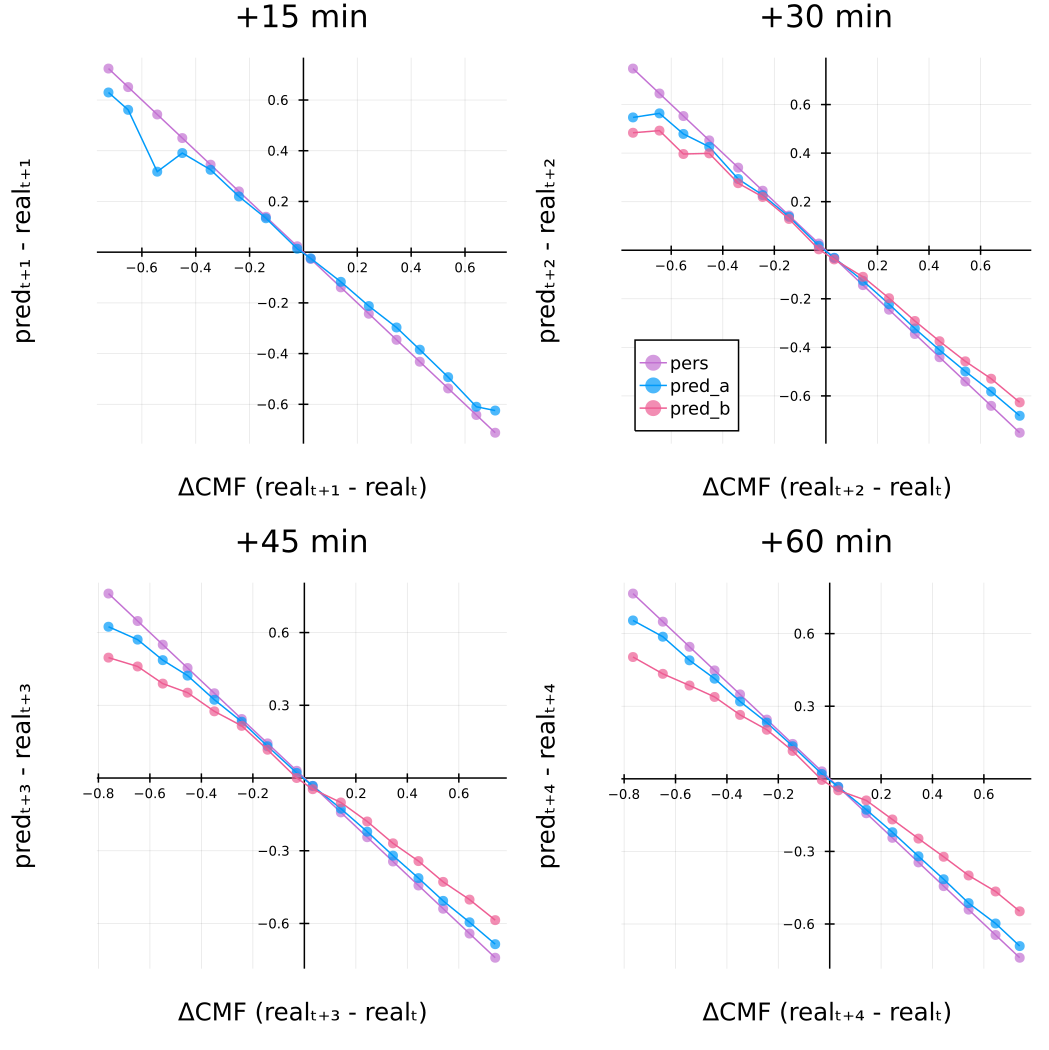

In [44]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), fmt=:png, size=(700, 700))

#### heatmaps

##### train

In [42]:
# rewrite transition matrix
state = data_train_cls
len = length(state)
T2 = zeros(N, N, N) # 2. od
for i in 2:len-1
    T2[state[i-1], state[i], state[i+1]] += 1
end
sumZ = sum(T2; dims=3)
T22 = T2./sumZ
T_train = sum([T22[:, :, i] * binMean[i] for i in 1:30]);

30×30 Matrix{Float64}:
   0.213818    0.281747    0.314274  0.338495  0.37369   0.420056  0.463879  0.494226  0.520531  …  NaN         NaN         NaN           0.430793  NaN         NaN         NaN         0.915987
   0.219746    0.246403    0.296921  0.328775  0.376172  0.40379   0.444227  0.482014  0.544883       0.888606    0.666498  NaN           0.396424    0.396424  NaN           0.947112  0.966057
   0.245249    0.250008    0.276249  0.328667  0.35264   0.384202  0.43275   0.490463  0.492647       0.642515    0.587929    0.606445    0.67339   NaN           0.447733  NaN         0.942857
   0.237517    0.260379    0.271684  0.299544  0.352263  0.375359  0.420396  0.470483  0.496743       0.693367    0.786182    0.780998  NaN           0.950541    0.509034    0.876105  0.97409
   0.254423    0.278164    0.282097  0.299934  0.324791  0.383228  0.412923  0.447832  0.488569       0.881134    0.683682    0.800293    0.790752    0.430793  NaN           0.93093   0.925542
   0.255008  

##### test

In [25]:
s_t_2 = df21.pers_cls
s_t_1 = df21.real_cls
pred = df21.pred;

T, T_ct = zeros(N, N), zeros(N, N)
len = length(pred)
for i in 1:len-1
    T[s_t_2[i], s_t_1[i]] += pred[i+1]
    T_ct[s_t_2[i], s_t_1[i]] += 1
end

T_test = T ./ T_ct;

In [55]:
hm_train = heatmap(T_train, c=:jet, clim=(0,1), title="CMFₜ training") 

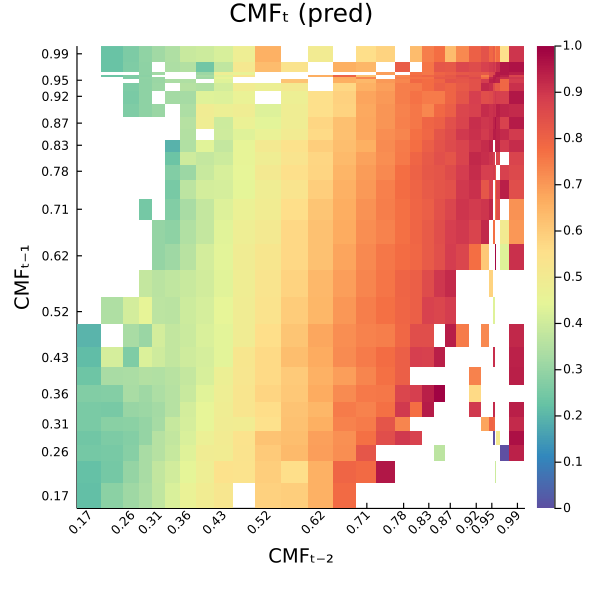

In [38]:
hm_test = heatmap(binMean, binMean, T_test, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, 
    title="CMFₜ (pred)", size=(500,500), tickfontsize=7,
    xticks=xti, yticks=xti, xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁")

##### dif_pred

In [37]:
s_t_2 = df21.pers_cls
# s_t_1 = df21.real_cls
dif = df21.dif_pred;

T_dif, T_ct = zeros(N, N), zeros(N, N)
len = length(dif)
for i in 2:len-1
    T_dif[s_t_2[i-1], s_t_2[i]] += dif[i]
    T_ct[s_t_2[i-1], s_t_2[i]] += 1
end

T_dif_mn = T_dif ./ T_ct;

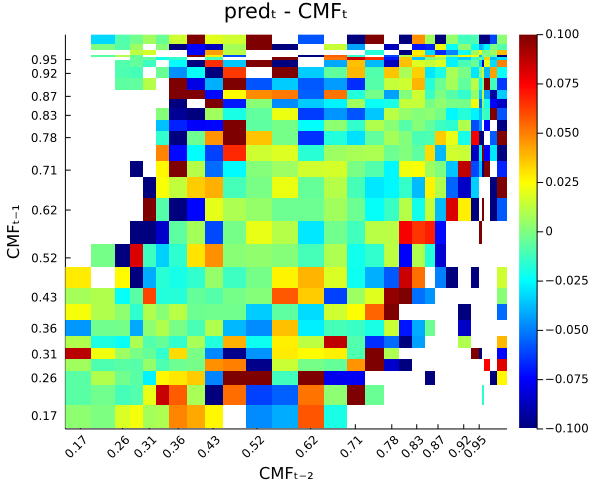

In [38]:
heatmap(ticks, ticks, T_dif_mn, c=:jet, clim=(-0.1,0.1), grid=false, fmt=:png, dpi=100, size=(600,500),
    xticks=xti, yticks=xti, xrotation=45,
    rightmargin=25px, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", title="predₜ - CMFₜ") 

#### pACF

In [8]:
lags = collect(0:10)
pACF_train = pacf(data_train, lags)

11-element Vector{Float64}:
  1.0
  0.8950278187353926
 -0.1297686872609787
  0.1480611713779651
  0.018718040107171124
  0.056977667039441175
  0.03379964557040376
  0.03609850297600837
  0.024416348982315227
  0.023665355381098152
  0.02077301939930371

In [9]:
pACF_test = pacf(data_test, lags)

11-element Vector{Float64}:
  1.0
  0.8933969888378854
 -0.1019465568298232
  0.143702737015086
  0.006365301214471336
  0.06269634124419815
  0.035294049940034045
  0.04248351833356964
  0.02108308288209466
  0.014819590597472499
  0.024580267692225256

In [11]:
σ = 1.96 / √length(data_test)

0.014617506820435396

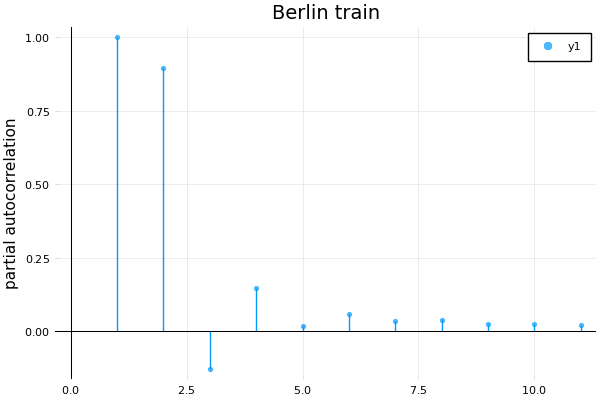

In [21]:
acfTr = plot(pACF_train, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="Berlin train", ylabel="partial autocorrelation")

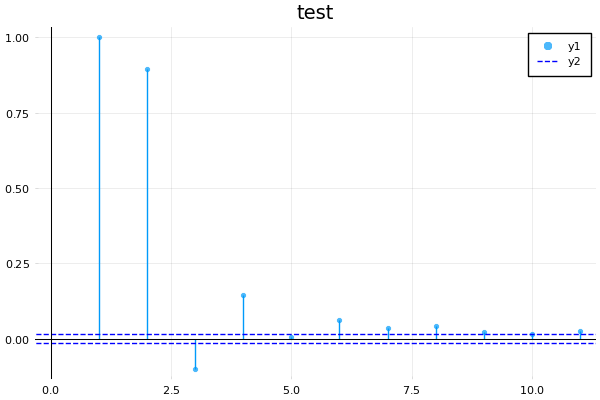

In [19]:
acfTe = plot(pACF_test, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="test")
hline!([-σ, σ], ls=:dash, lc=:blue)

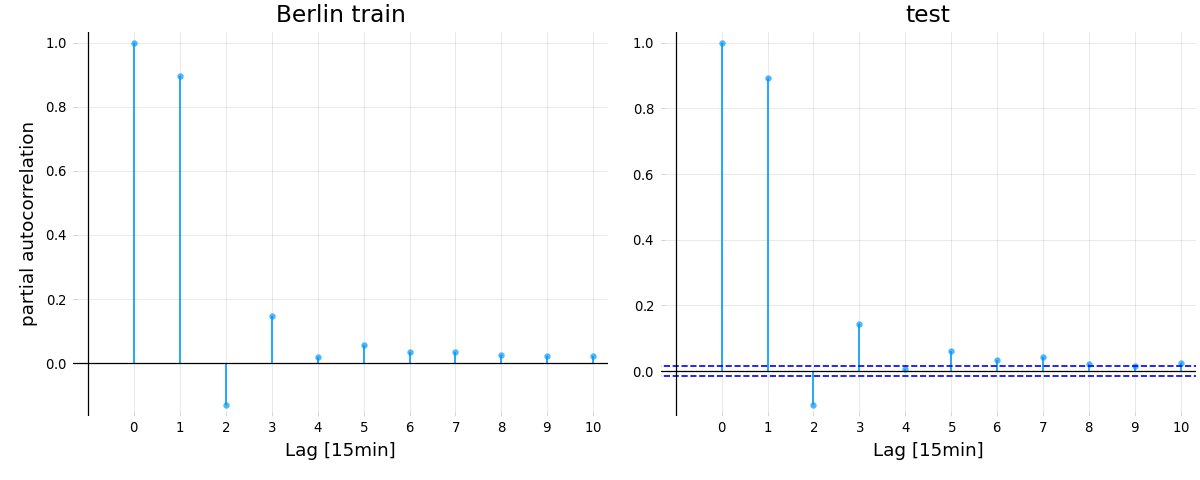

In [22]:
acfs = plot(acfTr, acfTe, layout=@layout([a b]), leg=false, frame=:zerolines, 
    xticks=(1:11, lags), yticks=-0.2:0.2:1.0, xlabel="Lag [15min]", 
    leftmargin=20px, bottommargin=20px, dpi=120, size=(1000,400))

#### log likelihood

In [83]:
function llh(nc) # num_cls
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    return loglikelihood(Normal(), data_train_cls)
end

llh (generic function with 1 method)

In [89]:
nc = 2:2:30
llhs = Float64[]
for n in nc
    push!(llhs, llh(n))
end
llhs

15-element Vector{Float64}:
 -580423.8840553071
      -1.24944238405531e6
      -2.275277884055311e6
      -3.657908384055311e6
      -5.397357884055309e6
      -7.493629384055279e6
      -9.946683884055227e6
      -1.2756564384055194e7
      -1.5923327884055194e7
      -1.9446750384055227e7
      -2.3327043884055242e7
      -2.7564205384055242e7
      -3.21581138840552e7
      -3.710885038405514e7
      -4.241642988405506e7

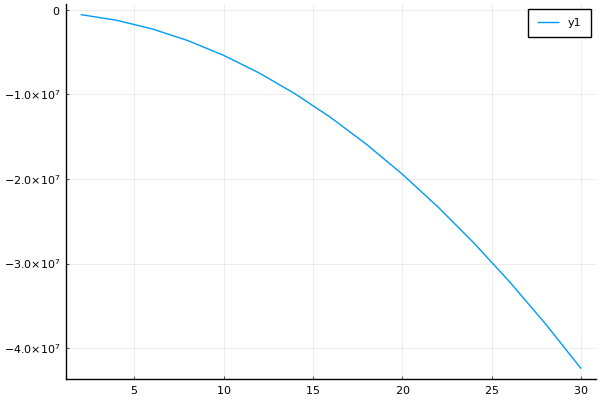

In [90]:
plot(nc, llhs)

In [69]:
data_train_cls_20, binStarts_20, binMean = getBins(data_train, 20) # city-specific
data_test_cls_20 = classify(data_test, binStarts_20);

In [19]:
?loglikelihood()

search: loglikelihood nullloglikelihood



```
loglikelihood(model::StatisticalModel)
```

Return the log-likelihood of the model.

---

```
loglikelihood(model::StatisticalModel, ::Colon)
```

Return a vector of each observation's contribution to the log-likelihood of the model. In other words, this is the vector of the pointwise log-likelihood contributions.

In general, `sum(loglikehood(model, :)) == loglikelihood(model)`.

---

```
loglikelihood(model::StatisticalModel, observation)
```

Return the contribution of `observation` to the log-likelihood of `model`.

---

```
loglikelihood(d::UnivariateDistribution, x::Union{Real,AbstractArray})
```

The log-likelihood of distribution `d` with respect to all samples contained in `x`.

Here `x` can be a single scalar sample or an array of samples.

---

```
loglikelihood(d::MultivariateDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a vector of length `dim(d)`, a matrix with `dim(d)` rows, or an array of vectors of length `dim(d)`.

---

```
loglikelihood(d::MatrixDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a matrix of size `size(d)`, a three-dimensional array with `size(d, 1)` rows and `size(d, 2)` columns, or an array of matrices of size `size(d)`.


In [56]:
llhTr = loglikelihood(Normal(), data_train)

-313009.91146532213

In [50]:
tr = fit(Normal, data_train)

Normal{Float64}(μ=0.6560004587373912, σ=0.266667624417318)

In [51]:
te = fit(Normal, data_test)

Normal{Float64}(μ=0.6905375446529478, σ=0.2561302274954425)

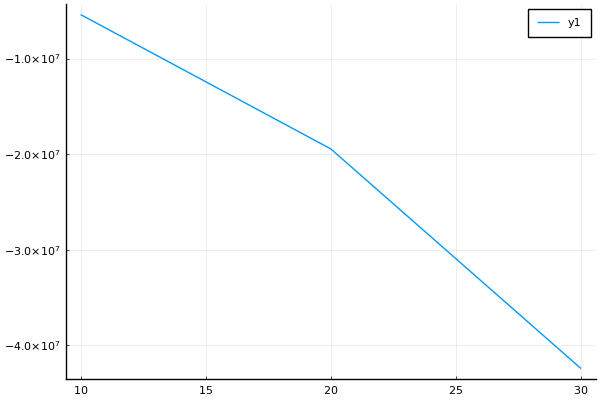

In [75]:
plot([10,20,30],[llhTr_10, llhTr_20, llhTr])

In [32]:
?logpdf

search: logpdf logpdf! gradlogpdf componentwise_logpdf



```
logpdf(d::UnivariateDistribution, x::Real)
```

Evaluate the logarithm of probability density (mass) at `x`.

See also: [`pdf`](@ref).

---

```
logpdf(d::MultivariateDistribution, x::AbstractArray)
```

Return the logarithm of probability density evaluated at `x`.

  * If `x` is a vector, it returns the result as a scalar.
  * If `x` is a matrix with n columns, it returns a vector `r` of length n, where `r[i]` corresponds to `x[:,i]`.

`logpdf!(r, d, x)` will write the results to a pre-allocated array `r`.

---

```
logpdf(d::MatrixDistribution, AbstractMatrix)
```

Compute the logarithm of the probability density at the input matrix `x`.

---

```
logpdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the logarithm of the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [68]:
logpdf(Normal(), data_test_cls)

17979-element Vector{Float64}:
  -41.418938533204674
  -41.418938533204674
   -5.418938533204673
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -2.9189385332046727
   -2.9189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
    ⋮
  -32.918938533204674
  -25.418938533204674
  -25.418938533204674
  -25.418938533204674
  -41.418938533204674
  -61.418938533204674
  -72.91893853320467
  -98.91893853320467
 -113.41893853320467
 -113.41893853320467
 -181.41893853320468
 -265.41893853320465

In [60]:
logTr = logpdf(tr, data_train)

267607-element Vector{Float64}:
 -0.7390725965514602
 -0.749636184929457
 -0.9240713626038126
 -1.1783234851667956
 -1.3893323379861149
 -1.2883715572680885
 -0.26993290455632035
 -0.40655707004413544
 -0.19677151570201512
 -0.006964715412618672
 -0.5507346893012293
 -0.790886722827745
 -0.8046691133606088
  ⋮
 -0.3562744655647867
  0.05127298864727248
  0.19662686395729168
  0.039839927341740244
  0.3414563485281543
  0.33286117071197285
  0.35213004425142935
  0.14783879409896383
  0.12340973285210421
  0.21045757875799098
 -0.0026369544943598555
 -0.23750603510277846

In [53]:
llhTe = logpdf(te, data_test)

17979-element Vector{Float64}:
 -0.01752145846402109
 -0.05392801107719092
 -0.9083831516752008
 -1.6166132243464204
 -1.8422429123577257
 -1.7731328475780017
 -1.1029431387500688
 -1.1918485209662328
 -1.5216937402817672
 -1.5312426498579461
 -1.5428315219895616
 -1.5583213354757561
 -1.507881985765142
  ⋮
 -0.18503293299388468
 -0.33449135055410495
 -0.43436536144009863
 -0.36235717492673625
 -0.06179274438676452
  0.18161563814145
  0.3685574836507881
  0.4324253778135221
  0.43816881306510924
  0.43894165551833586
  0.2911193421612708
  0.05236366690123817

In [24]:
logliTe = log.(data_test)

17979-element Vector{Float64}:
 -0.8103734477009982
 -0.8320374233083325
 -1.3114217087068083
 -1.7679514969989036
 -1.9452681132189922
 -1.8885433055480856
 -1.4265113346931475
 -1.4811477213458324
 -1.6993526023968981
 -1.7061165219644234
 -1.7143651820632337
 -1.7254596994732307
 -1.689620593135623
  ⋮
 -0.9076992528436422
 -0.9912325096523066
 -1.0463249255396996
 -1.0066360789490105
 -0.8366726777590361
 -0.6825989110544289
 -0.5248884431861042
 -0.4260869537570588
 -0.33400131949324074
 -0.33689792777871597
 -0.1842073784687699
 -0.08668272175935691

#### mn ± sd histo

In [41]:
h21 = hist_dif_pred_pers(df21, 2, 1)
h22 = hist_dif_pred_pers(df22, 2, 2)

In [43]:
h21_cls = hist_cls_dif_pred_pers(df21, 2, 1)
h22_cls = hist_cls_dif_pred_pers(df22, 2, 2)

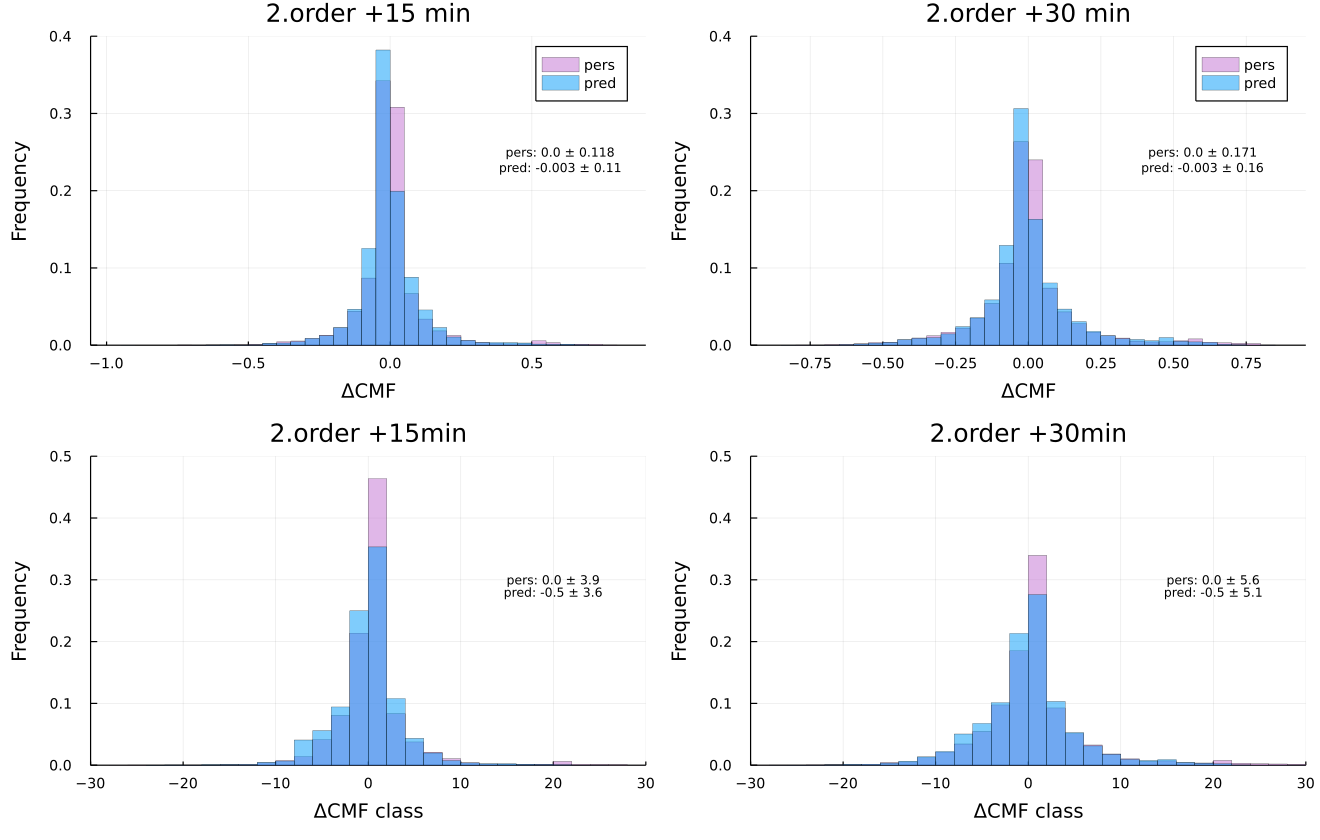

In [49]:
hists = plot(h21, h22, h21_cls, h22_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

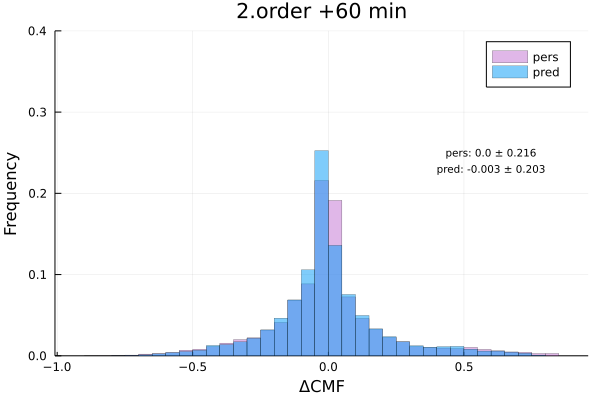

In [60]:
h23 = hist_dif_pred_pers(df23, 2, 3)
h24 = hist_dif_pred_pers(df24, 2, 4)

In [61]:
h23_cls = hist_cls_dif_pred_pers(df23, 2, 3)
h24_cls = hist_cls_dif_pred_pers(df24, 2, 4);

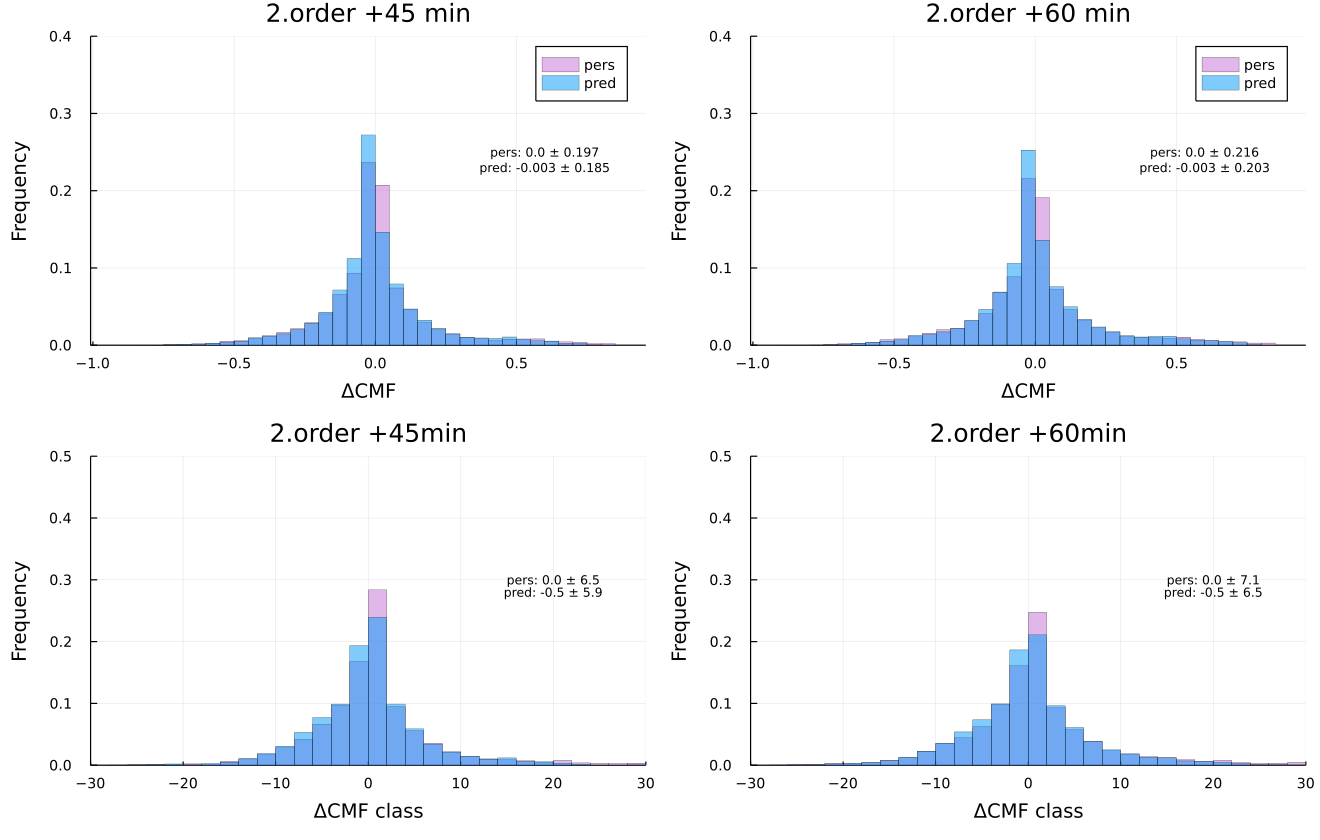

In [62]:
hists34 = plot(h23, h24, h23_cls, h24_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

In [24]:
function viz_mn_sd(df; tit="2. order +$(15*2) min", ylim1=0.35)
    gb = groupby(df, :real_cls)
    mns_real = [mean(g.real) for g in gb]
    mns_pers = [mean(g.pers) for g in gb]
    mns_pred = [mean(g.pred) for g in gb]
    mns_pred_n = [mean(g.pred_n) for g in gb];

    sds_real = [std(g.real) for g in gb]
    sds_pers = [std(g.pers) for g in gb]
    sds_pred = [std(g.pred) for g in gb]
    sds_pred_n = [std(g.pred_n) for g in gb];

    if df == df22 
        (ylab1, ylab2) = ("mean", "standard deviation") 
        leg1 = :bottomright
    else 
        (ylab1, ylab2) = ("", "")
        leg1 = :none
    end
    mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n], c=[3 4 1 7], leg=leg1, 
            ylabel=ylab1, title=tit)
    sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n], c=[3 4 1 7], leg=false, 
            xlabel="real CMF", ylabel=ylab2, ylim=(0,ylim1))
    return mns, sds
end

viz_mn_sd (generic function with 1 method)

In [41]:
mn2, sd2 = viz_mn_sd(df22)

(Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4})

In [29]:
mn3, sd3 = viz_mn_sd(df23; tit="+$(15*3) min")
mn4, sd4 = viz_mn_sd(df24; tit="+$(15*4) min")

(Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4})

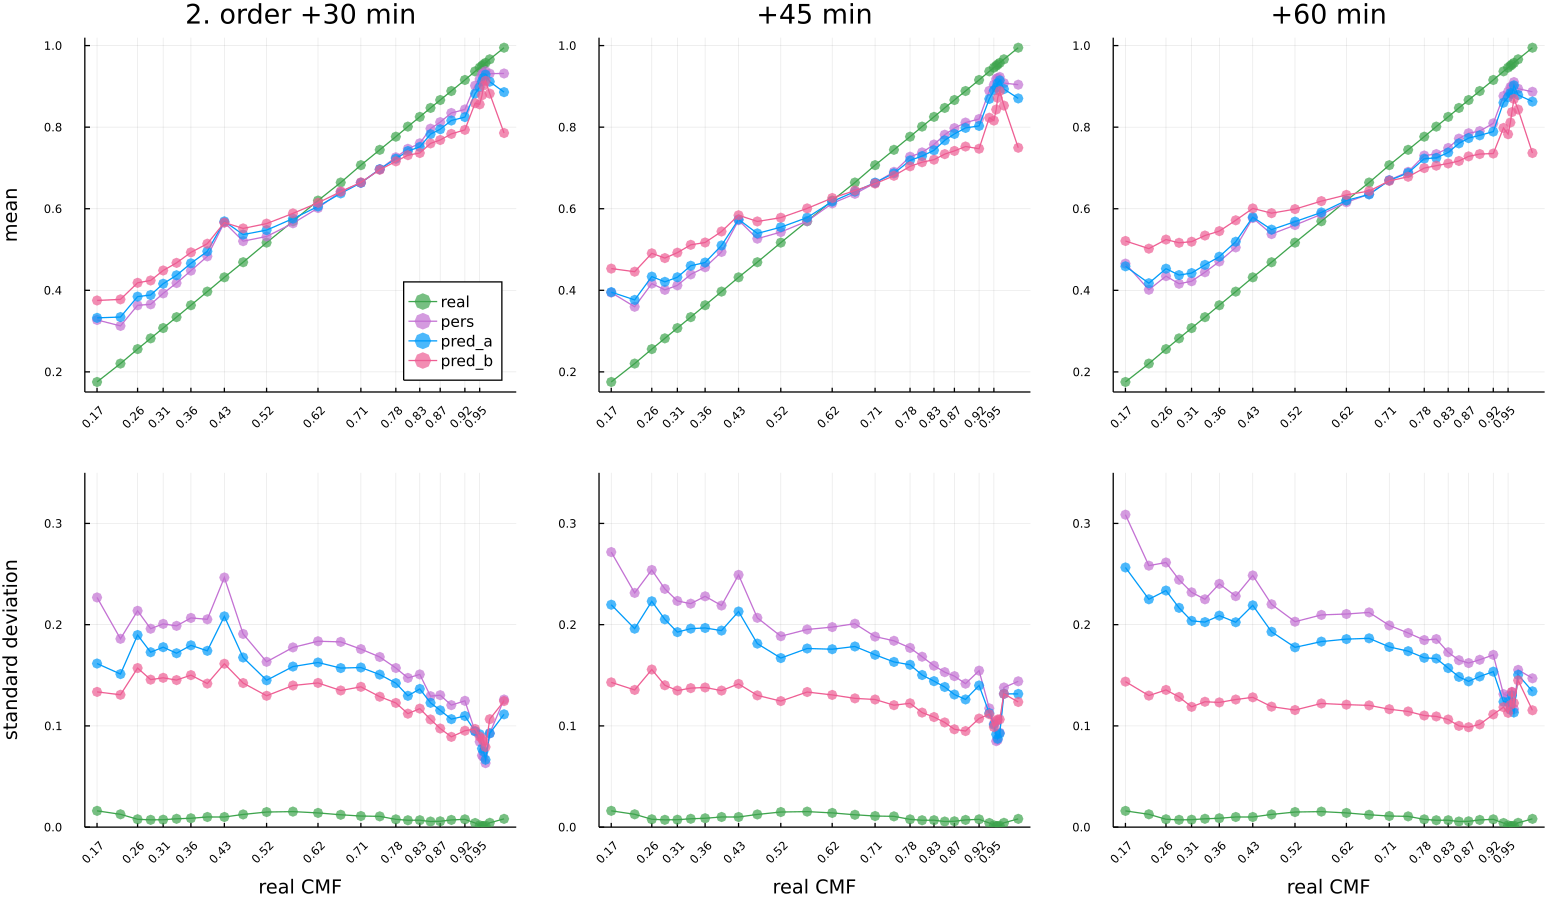

In [30]:
p = plot(mn2, mn3, mn4, sd2, sd3, sd4, layout=@layout([a b c; d e f]), marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

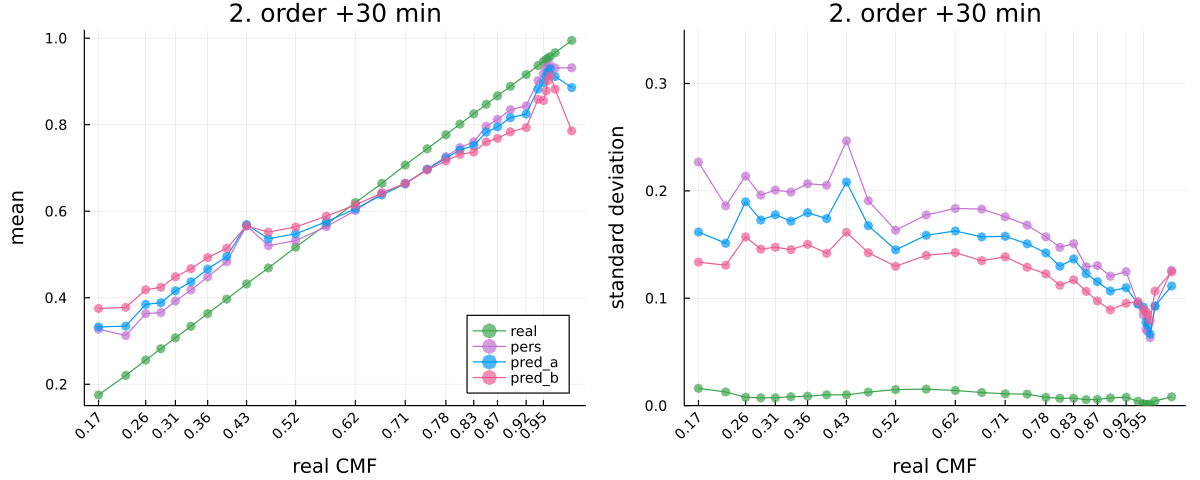

In [44]:
p = plot(mn2, sd2, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, size=(1000,400))

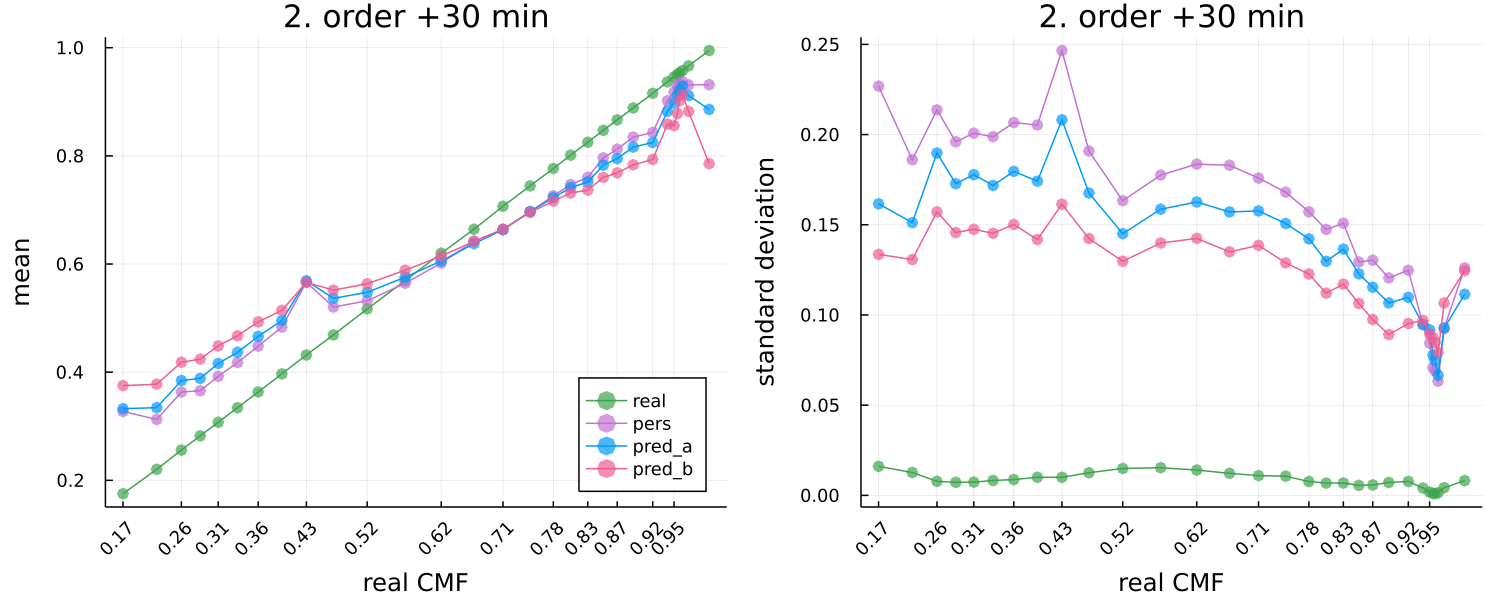

In [78]:
p = plot(mns, sds, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

#### errors

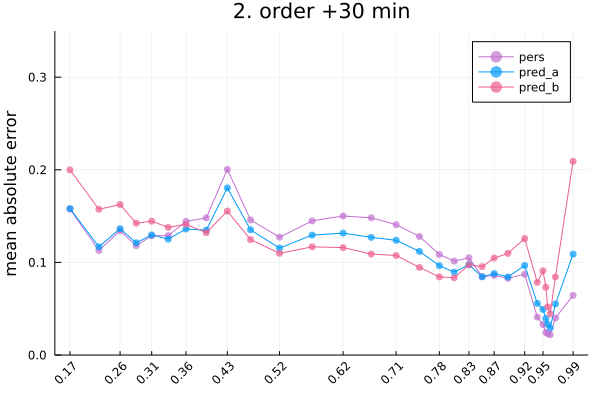

In [56]:
mae2 = viz_err(df22, binMean, xti; tit="2. order +$(15*2) min", err="mae")

In [53]:
mae3 = viz_err(df23, binMean, xti; tit="+$(15*3) min", err="mae")
mae4 = viz_err(df24, binMean, xti; tit="+$(15*4) min", err="mae")

rmse2 = viz_err(df22, binMean, xti; err="rmse")
rmse3 = viz_err(df23, binMean, xti; err="rmse")
rmse4 = viz_err(df24, binMean, xti; err="rmse");

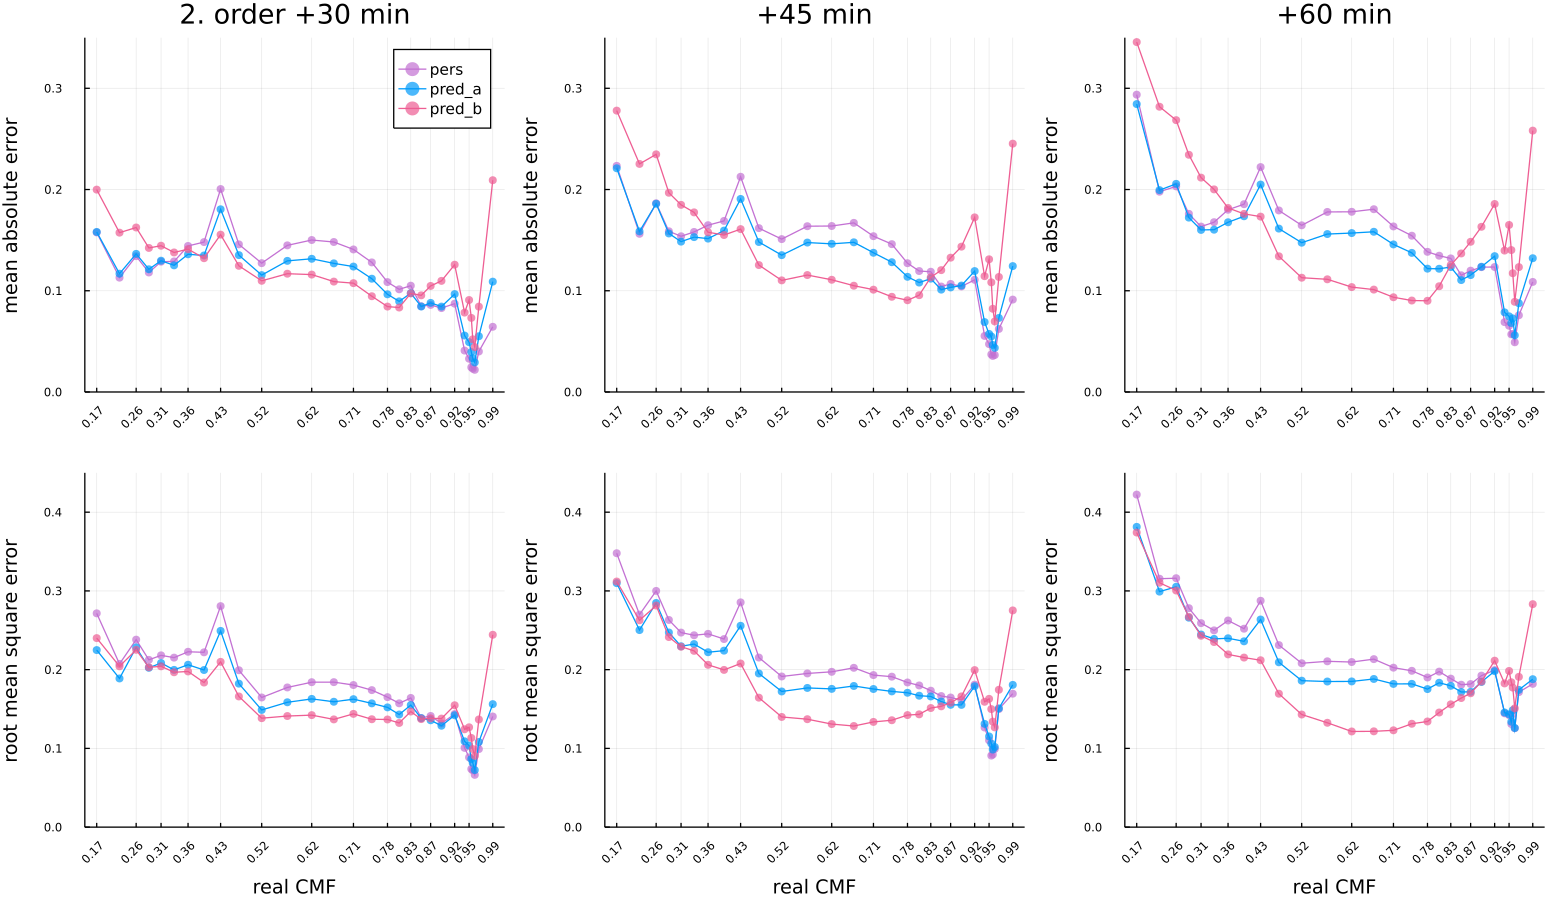

In [57]:
errs = plot(mae2, mae3, mae4, rmse2, rmse3, rmse4, layout=@layout([a b c; d e f]), 
    tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

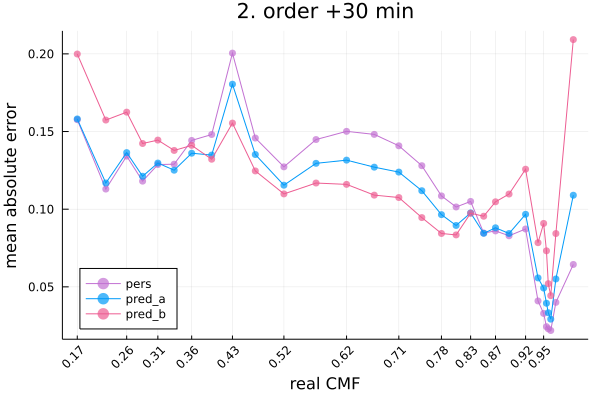

In [83]:
maes = viz_err(binMean, df22, tit; ticks=ticks, err="mae")

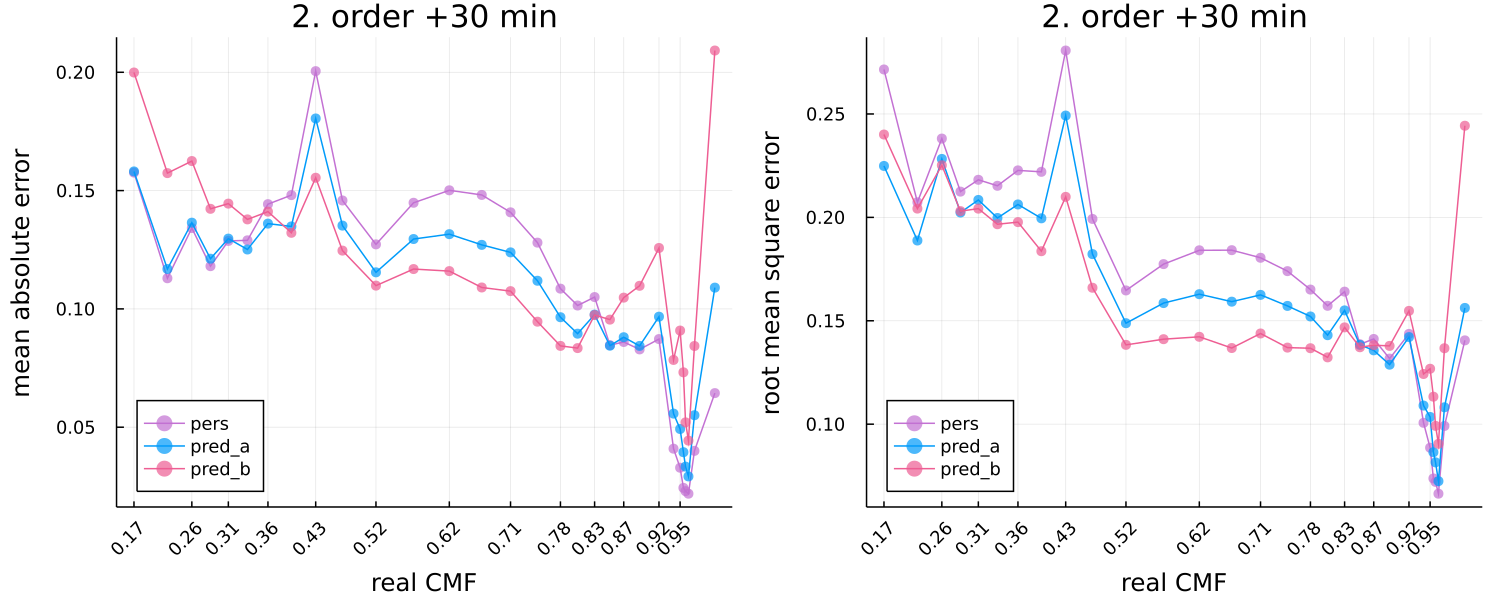

In [86]:
errs = plot(maes, rmses, layout=@layout([a b]), 
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

####  boxplot

In [45]:
function viz_box(df, steps, tit; pred="pred")
    pred == "new" ? 
        (dif = df.dif_pred_n[1+steps:end]) :  
        (dif = df.dif_pred[1+steps:end])
    pred == "new" ? ylab = "pred_n" : ylab = "pred"
    b = boxplot(df.real_cls[1:end-steps], dif, leg=false, marker=(0.3, stroke(0)), lw=.7,
        xticks=(1:2:30, ticks[1:2:30]), xrotation=45,
        title=tit, xlabel="real CMF class mean at t", ylabel="dif ($(ylab) - real)")
    return b
end

viz_box (generic function with 1 method)

In [51]:
b21 = viz_box(df21, 1, "Berlin 2.order t+$(15*1) min")

b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

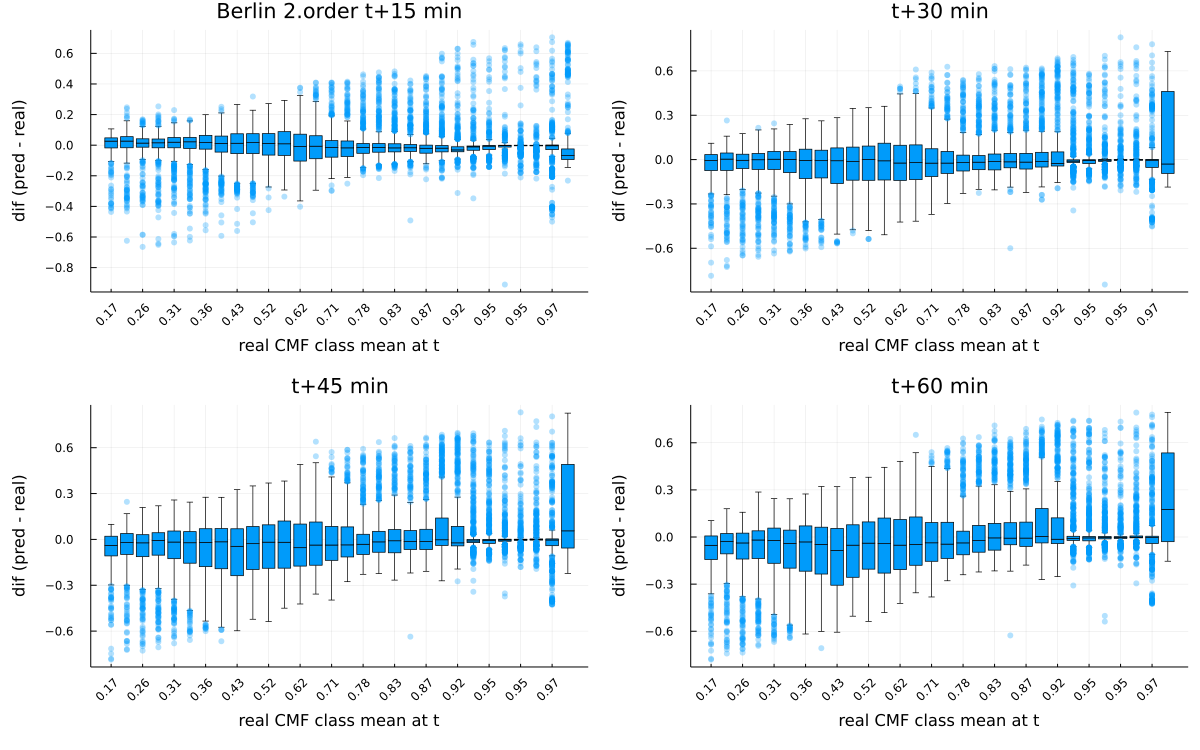

In [54]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

### Neighbor

In [9]:
test = getCMF0(fn_berlin; raw=1)[2];
test_neib_w = getCMF0(fn_berlin_w; raw=1)[2];

df21 = getDF(2, 1, N; test_neib=test_neib_w)
df22 = getDF(2, 2, N; test_neib=test_neib_w)

LoadError: UndefVarError: data_test_cls not defined

In [1]:
df23 = getDF(2, 3, N; test_neib=test_neib_w)
df24 = getDF(2, 4, N; test_neib=test_neib_w);

LoadError: UndefVarError: test_neib_w not defined

In [8]:
test_neib_sw = getCMF(fn_berlin_sw; raw=1)[2]
test_neib_nw = getCMF(fn_berlin_nw; raw=1)[2]
test_neib_s = getCMF(fn_berlin_s; raw=1)[2]
test_neib_se = getCMF(fn_berlin_se; raw=1)[2]
test_neib_ne = getCMF(fn_berlin_ne; raw=1)[2]

In [143]:
df22_s = getDF(2, 2, N; test_neib=test_neib_s)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64     Int64         Float64     Float64   Int64       Float64      Int64          
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.816105  0.435162         1         9   0.264479               8  0.437789         9   0.267107              8   0.645423   0.437789           9   0.267107                 8
     2 │ 0.142949  0.58129   0.269437         1         3   0.126488               2  0.263847         3   0.120898              2   0.438341   0.276249           4   0.1333                   3
     3 │ 0.151292  0.413393  0.170682         1         1   0.0193902              0  0.245249         3   0.0939568             2   0.262101   0.314274           5   0.162982                 4
     4 │ 0.240145  0.213271  0.142949         2         1  -0.0971964             -1  0.213818         2  -0.026327              0  -0.0268744  0.281747           4   0.0416014                2
     5 │ 0.227377  0.16343   0.151292         2         1  -0.0760845             -1  0.213818         2  -0.0135584             0  -0.063947   0.281747           4   0.05437                  2
     6 │ 0.182802  0.156667  0.240145         1         2   0.0573434              1  0.281747         4   0.0989448             3  -0.0261345  0.328775           6   0.145973                 5
     7 │ 0.18157   0.151836  0.227377         1         2   0.045807               1  0.246403         3   0.0648339             2  -0.0297338  0.296921           5   0.115352                 4
     8 │ 0.180078  0.118497  0.182802         1         1   0.00272383             0  0.219746         2   0.0396683             1  -0.0615806  0.281747           4   0.101669                 3
     9 │ 0.178091  0.104174  0.18157          1         1   0.00347838             0  0.213818         2   0.0357271             1  -0.0739175  0.281747           4   0.103655                 3
    10 │ 0.18459   0.13511   0.180078         1         1  -0.00451154             0  0.213818         2   0.0292287             1  -0.0494792  0.281747           4   0.0971571                3
    11 │ 0.279361  0.175311  0.178091         4         1  -0.10127               -3  0.213818         2  -0.0655429            -2  -0.10405    0.281747           4   0.00238554               0
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮          ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.23102   0.403451         7         8   0.0522252              1  0.411875         8   0.0606485             1  -0.120207   0.415747           9   0.0645211                2
 17968 │ 0.365446  0.253371  0.371119         7         7   0.00567275             0  0.380428         8   0.0149818             1  -0.112075   0.437017           9   0.0715711                2
 17969 │ 0.433149  0.269236  0.351226         9         7  -0.0819232             -2  0.386635         8  -0.0465147            -1  -0.163913   0.437017           9   0.00386798               0
 17970 │ 0.505302  0.315908  0.365446        11         7  -0.139856              -4  0.386635         8  -0.118667             -3  -0.189394   0.437017           9  -0.0682847               -2
 17971 │ 0.591621  0.380269  0.433149        12         9  -0.158472              -3  0.48402         10  -0.107601             -2  -0.211353   0.526605          11  -0.0650163               -1
 17972 │ 0.65306   0.463143  0.505302        14        11  -0.147758              -3  0.569766        12 

#### reliability

In [84]:
data_train_cls, binStarts, binMean = getBins(data_train, N; op="el")
data_test_cls = classify(data_test, binStarts);

In [58]:
data_train_cls, binStarts, binMean = getBins(data_train, 10) # city-specific
data_test_cls = classify(data_test, binStarts);

In [72]:
data_train_cls, binStarts, binMean = getBins(data_train, 20) # city-specific
data_test_cls = classify(data_test, binStarts);

In [59]:
df22_ = getDF(2, 2, 10)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64      Int64         Float64     Float64   Int64       Float64      Int64          
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.812441  0.435162         1         3   0.264479               2  0.423986         3   0.253304               2   0.641759   0.423986           3   0.253304                 2
     2 │ 0.142949  0.577954  0.269437         1         1   0.126488               0  0.304889         2   0.16194                1   0.435005   0.348972           3   0.206024                 2
     3 │ 0.151292  0.40955   0.170682         1         1   0.0193902              0  0.255325         1   0.104033               0   0.258258   0.255325           1   0.104033                 0
     4 │ 0.240145  0.188798  0.142949         1         1  -0.0971964              0  0.255325         1   0.0151802              0  -0.0513477  0.255325           1   0.0151802                0
     5 │ 0.227377  0.147695  0.151292         1         1  -0.0760845              0  0.255325         1   0.0279489              0  -0.0796814  0.255325           1   0.0279489                0
     6 │ 0.182802  0.13582   0.240145         1         1   0.0573434              0  0.255325         1   0.0725236              0  -0.0469821  0.255325           1   0.0725236                0
     7 │ 0.18157   0.144917  0.227377         1         1   0.045807               0  0.255325         1   0.0737559              0  -0.0366527  0.255325           1   0.0737559                0
     8 │ 0.180078  0.117192  0.182802         1         1   0.00272383             0  0.255325         1   0.0752474              0  -0.0628862  0.255325           1   0.0752474                0
     9 │ 0.178091  0.100783  0.18157          1         1   0.00347838             0  0.255325         1   0.0772343              0  -0.0773083  0.255325           1   0.0772343                0
    10 │ 0.18459   0.10863   0.180078         1         1  -0.00451154             0  0.255325         1   0.0707359              0  -0.0759591  0.255325           1   0.0707359                0
    11 │ 0.279361  0.114368  0.178091         2         1  -0.10127               -1  0.255325         1  -0.0240356             -1  -0.164993   0.255325           1  -0.0240356               -1
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.279701  0.403451         3         3   0.0522252              0  0.42237          3   0.0711434              0  -0.0715251  0.423986           3   0.0727598                0
 17968 │ 0.365446  0.271922  0.371119         3         3   0.00567275             0  0.423986         3   0.0585397              0  -0.093524   0.423986           3   0.0585397                0
 17969 │ 0.433149  0.29481   0.351226         3         3  -0.0819232              0  0.423986         3  -0.00916339             0  -0.138339   0.423986           3  -0.00916339               0
 17970 │ 0.505302  0.335291  0.365446         4         3  -0.139856              -1  0.423986         3  -0.0813161             -1  -0.170011   0.423986           3  -0.0813161               -1
 17971 │ 0.591621  0.393995  0.433149         4         3  -0.158472              -1  0.423986         3  -0.167635              -1  -0.197627   0.423986           3  -0.167635                -1
 17972 │ 0.65306   0.46773   0.505302         5         4  -0.147758              -1 

In [75]:
pred_mn = [mean(g.pred) for g in gb]

20-element Vector{Float64}:
 0.14084055614575133
 0.23249875022559488
 0.28201282023300206
 0.3217413116455796
 0.3660832413466893
 0.41900521758231246
 0.4902873336648194
 0.5575062973647888
 0.6316480865296256
 0.6976245665390056
 0.7491000426796237
 0.794887204472707
 0.8308882790136427
 0.8653985936281534
 0.8964601266934766
 0.9223060151922436
 0.9429164523099903
 0.9513919894226467
 0.9560118575740151
 0.972139231128456

In [76]:
len = length(gb)
rFs = zeros(len)
for i in 1:len
    g = gb[i]
    sdf = filter([:real_cls, :pred_cls] => (r, p) -> isequal(r, p), g)
    rFs[i] = size(sdf, 1) / size(g, 1)
end
rFs

20-element Vector{Float64}:
 0.3333333333333333
 0.22653721682847897
 0.20754716981132076
 0.19408740359897173
 0.16301969365426697
 0.1730612244897959
 0.1797884841363102
 0.1699530516431925
 0.16414435389988358
 0.14823261117445838
 0.17129977460555973
 0.20519713261648745
 0.14142049025769957
 0.1185929648241206
 0.06594773952716715
 0.0926517571884984
 0.5937961595273265
 0.5800524934383202
 0.6244444444444445
 1.0

In [77]:
mean(rFs)

0.2776553749499818

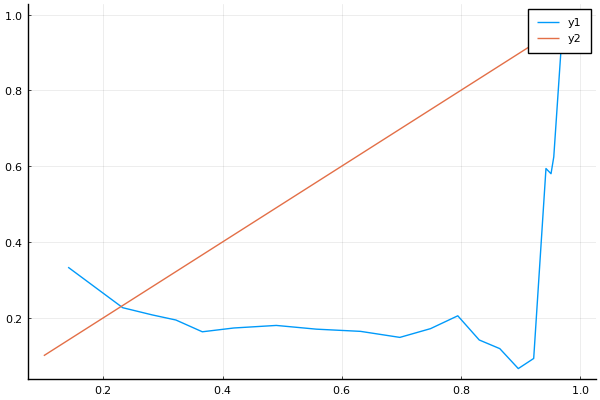

In [79]:
plot(pred_mn, rFs)
plot!(0.1:0.1:1, 0.1:0.1:1)

#### hist 
pers vs pred vs neib

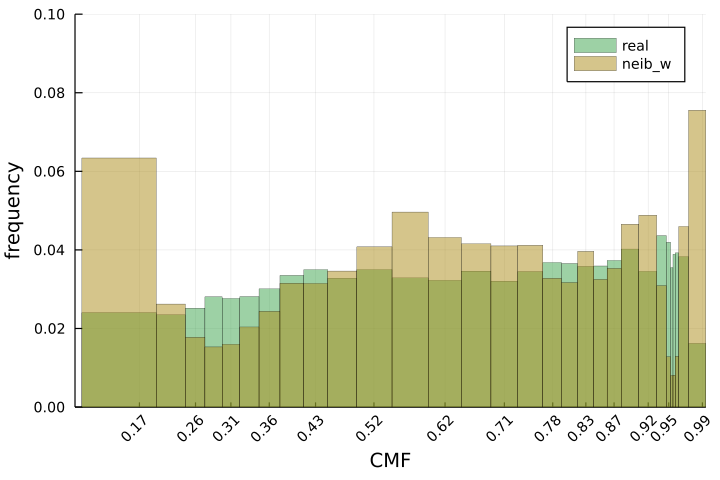

In [94]:
h1 = histogram(df21.real, normalize=:probability, bin=binStarts, label="real", 
    color=3, lw=0.2, fillalpha=0.5)
histogram!(df21.neib, normalize=:probability, bin=binStarts, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5,
    xlim=(0.08, 1), ylim=(0,0.1), xticks=xti, xrotation=45,
    xlabel="CMF", ylabel="frequency", dpi=:120)

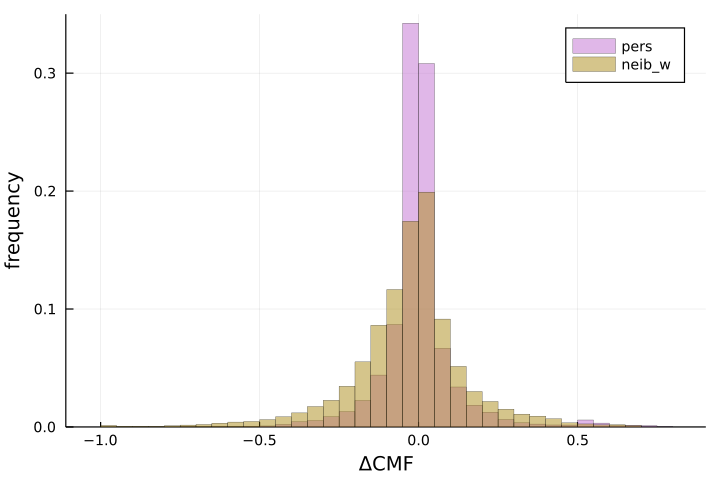

In [95]:
h2 = histogram(df21.dif_pers, normalize=:probability, bin=2N, label="pers",
    color=4, lw=0.2, fillalpha=0.5)
histogram!(df21.dif_neib, normalize=:probability, bin=2N, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5, dpi=:120,
    ylim=(0,0.35), xlabel="ΔCMF", ylabel="frequency") #title="$(od).order +$(15*step)min", )

#### mn ± sd 

In [35]:
function viz_mn_sd(df; tit="+$(15*2) min")
    gb = groupby(df, :real_cls)
    mns_real = [mean(g.real) for g in gb]
    mns_pers = [mean(g.pers) for g in gb]
    mns_pred = [mean(g.pred) for g in gb]
    mns_neib = [mean(g.neib) for g in gb]

    sds_real = [std(g.real) for g in gb]
    sds_pers = [std(g.pers) for g in gb]
    sds_pred = [std(g.pred) for g in gb]
    sds_neib = [std(g.neib) for g in gb]    
    
    if df != df21
        mns_pred_n = [mean(g.pred_n) for g in gb]
        sds_pred_n = [std(g.pred_n) for g in gb]
        mns = [mns_real, mns_pers, mns_pred, mns_pred_n, mns_neib]
        sds = [sds_real, sds_pers, sds_pred, sds_pred_n, sds_neib]
        lab = ["real" "pers" "pred_a" "pred_b" "neib_w"]
        clr = [3 4 1 7 5]
    else   
        mns = [mns_real, mns_pers, mns_pred, mns_neib]
        sds = [sds_real, sds_pers, sds_pred, sds_neib]
        lab = ["real" "pers" "pred_a" "neib_w"] 
        clr = [3 4 1 5] 
    end
    p_mns = plot(binMean, mns, c=clr, label=lab, leg=:bottomright, marker=(3, 0.7, :o, stroke(0)),     
        ylabel="mean")
    p_sds = plot(binMean, sds, c=clr, leg=false, marker=(3, 0.7, :o, stroke(0)),     
        ylabel="standard deviation")
    p = plot(p_mns, p_sds, title=tit, xlabel="real CMF", xticks=xti, xrotation=45, 
        tickfontsize=7, labelfontsize=10, leftmargin=20px, bottommargin=20px, size=(1200, 500))
    return p
end

viz_mn_sd (generic function with 1 method)

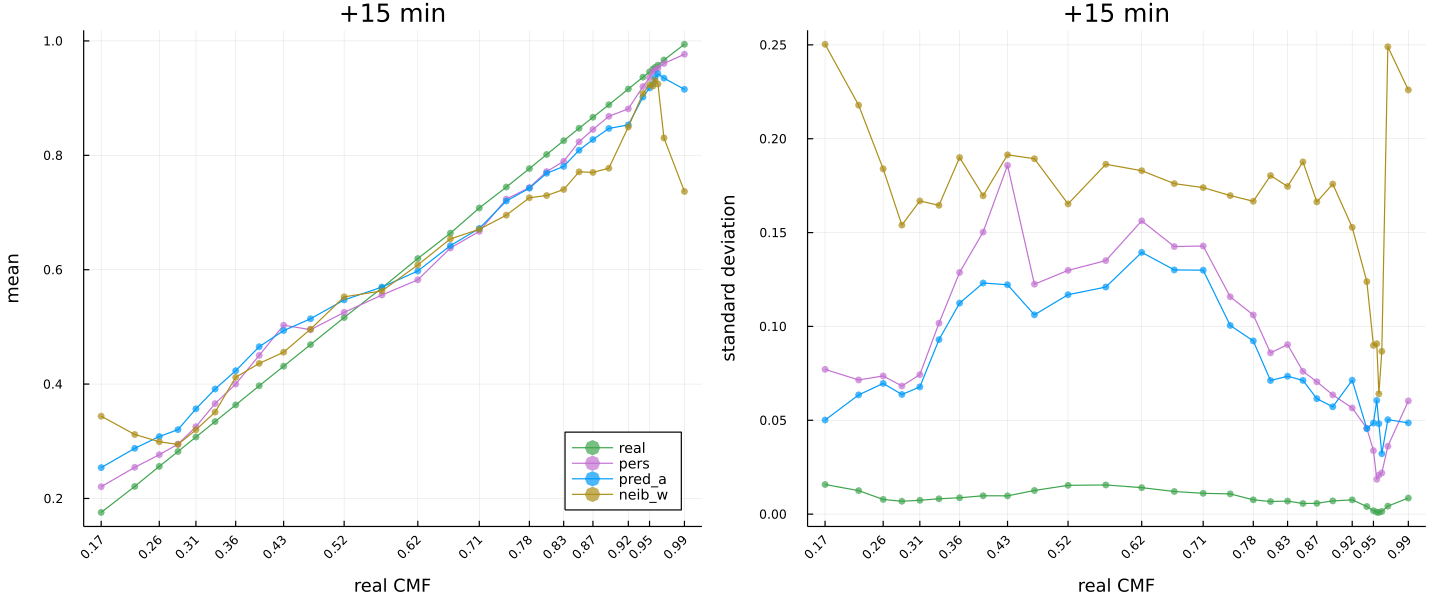

In [38]:
p_mn1 = viz_mn_sd(df21; tit="+$(15*1) min")

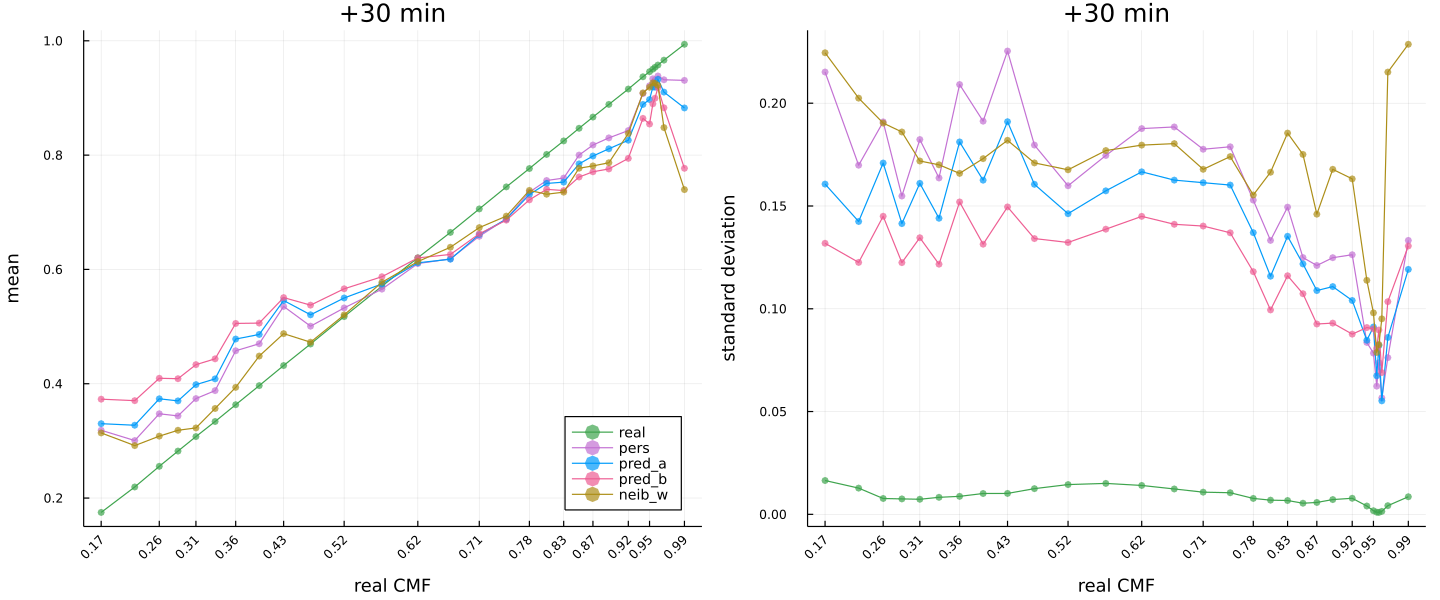

In [37]:
p_mn2 = viz_mn_sd(df22; tit="+30 min")

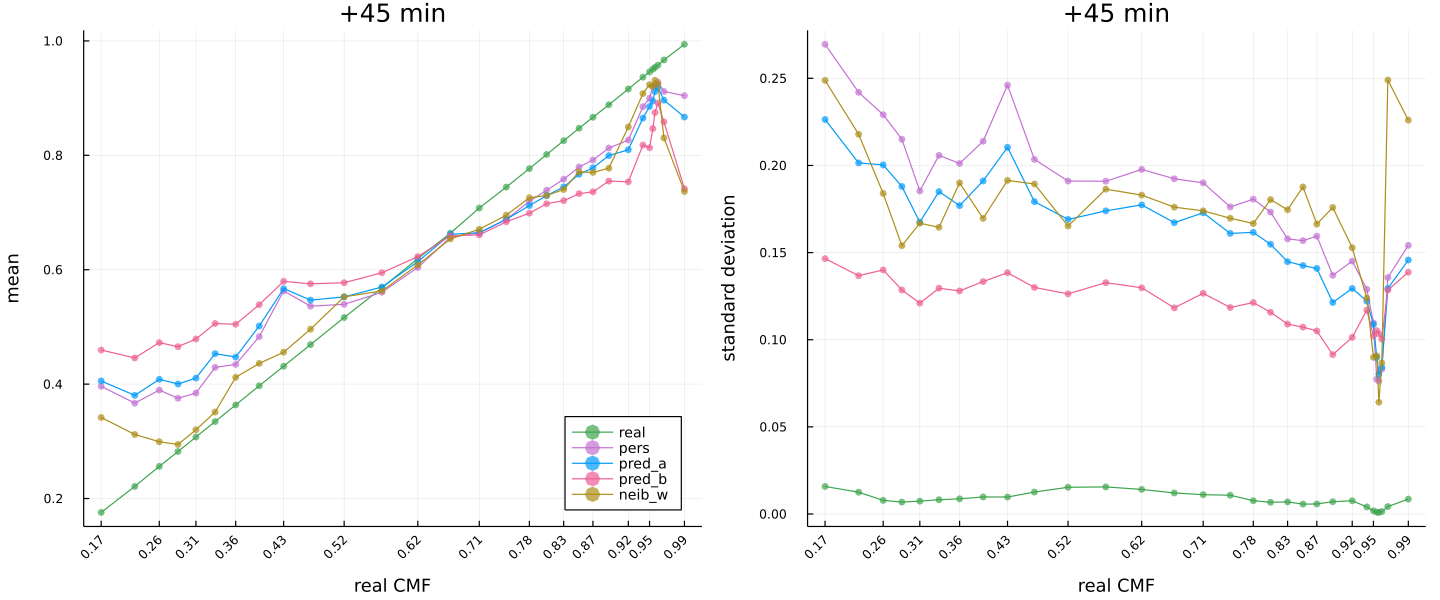

In [39]:
p_mn3 = viz_mn_sd(df23; tit="+$(15*3) min")

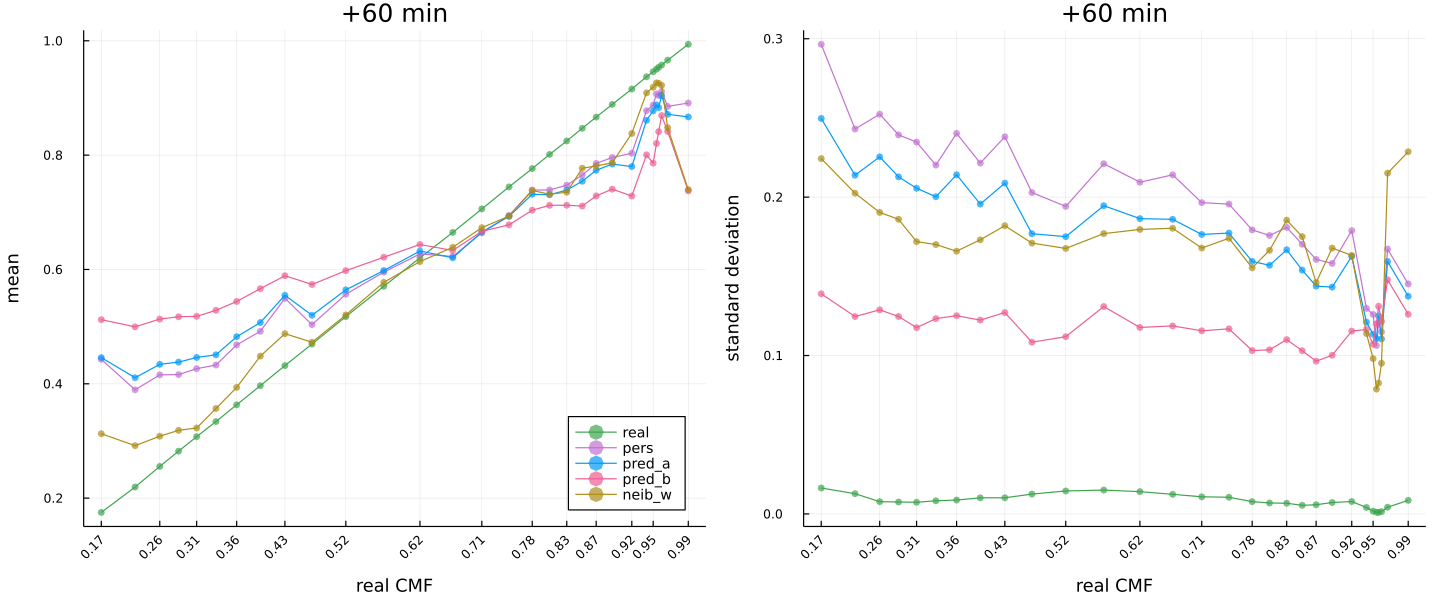

In [40]:
p_mn4 = viz_mn_sd(df24; tit="+$(15*4) min")

In [56]:
df22_ = filter(:dif_neib => d -> !isnan(d), df22)
gb = groupby(df22_, :real_cls);

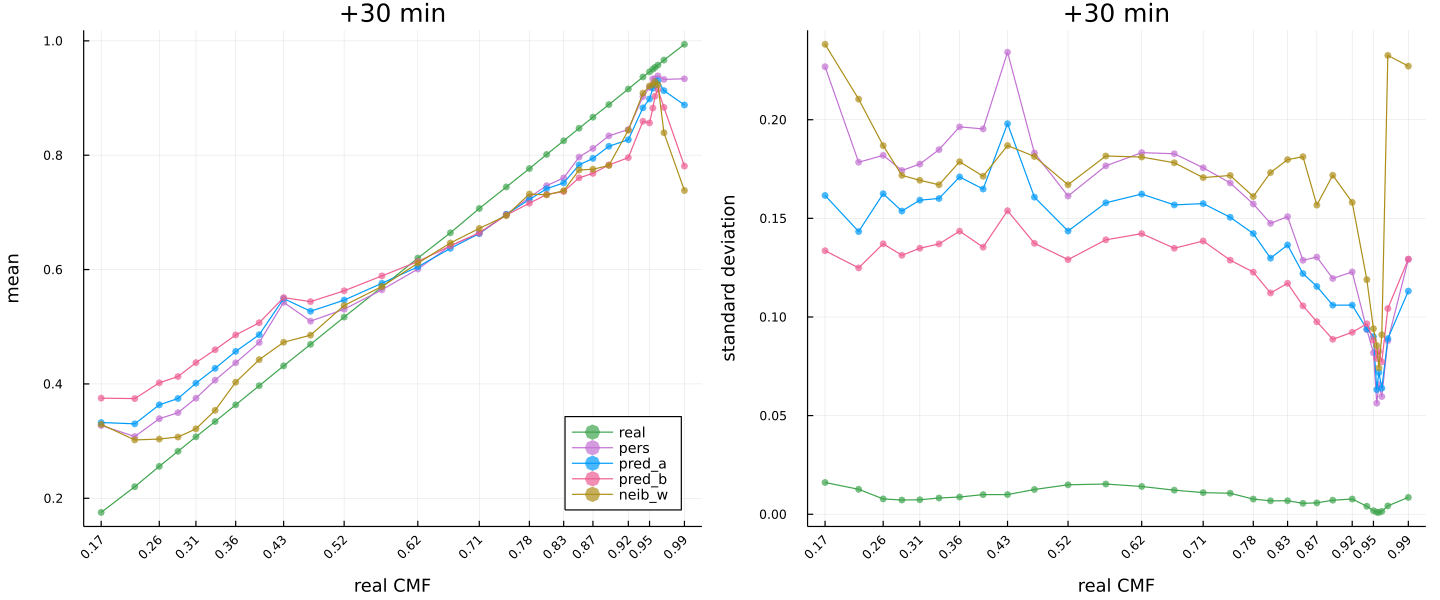

In [69]:
p = plot(mns, sds, xlabel="real CMF", xticks=xti, xrotation=45, 
    tickfontsize=7, labelfontsize=10, leftmargin=20px, bottommargin=20px, size=(1200, 500))

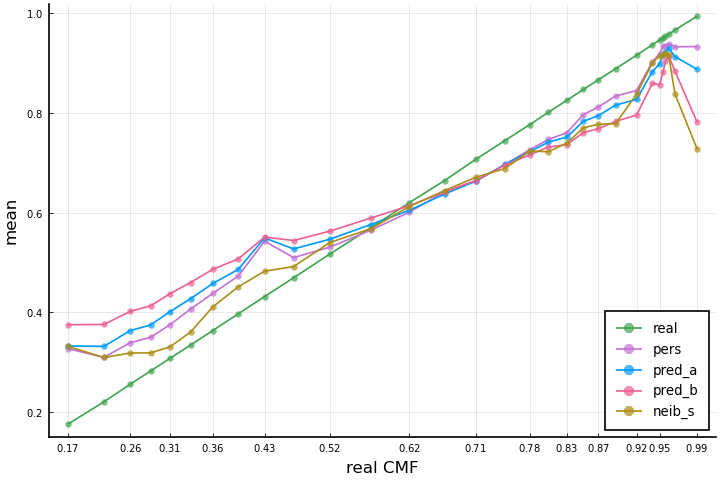

In [147]:
mns_s = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n, mns_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean", title="+30 min",
    xticks=xti, xrotation=45) #, tickfontsize=6, labelfontsize=10, dpi=:120) 

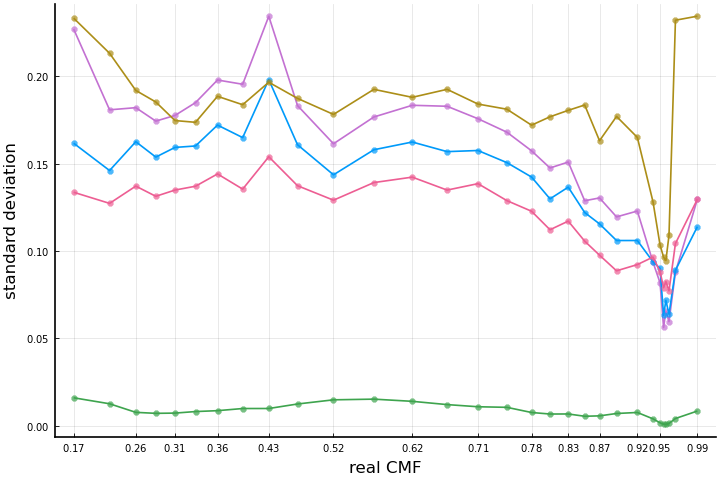

In [148]:
sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n, sds_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:none,
    xlabel="real CMF", ylabel="standard deviation",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

#### errors

In [100]:
function viz_err(df, binMean, xti; tit="2. order +$(15*2) min", err="mae")
    gb = groupby(df, :real_cls)
    if err == "mae"
        ylab = "mean absolute error"
        tit = tit
        ylim = 0.3
        err_pred = [meanad(g.pred, g.real) for g in gb]
        err_pers = [meanad(g.pers, g.real) for g in gb]
#         err_pred_n = [meanad(g.pred_n, g.real) for g in gb]
        err_neib = [meanad(g.neib, g.real) for g in gb]
    elseif err == "rmse"
        ylab = "root mean square error"
        tit = ""
        ylim = 0.4
        err_pred = [rmsd(g.pred, g.real) for g in gb]
        err_pers = [rmsd(g.pers, g.real) for g in gb]
#         err_pred_n = [rmsd(g.pred_n, g.real) for g in gb]
        err_neib = [rmsd(g.neib, g.real) for g in gb]
    end   
    (df == df21_ && err == "mae") ? leg1=:topleft : leg1 = :none
    if df == df21_ 
        errs = [err_pers, err_pred, err_neib]
        clrs = [4 1 5]
        labs = ["pers" "pred_a" "neib_s"]
    else
        errs = [err_pers, err_pred, err_pred_n, err_neib]
        clrs = [4 1 7 5]
        labs = ["pers" "pred_a" "pred_b" "neib_s"]
    end        
    p = plot(binMean, errs, c=clrs, marker=(0.7, stroke(0)), dpi=:120,
        leg=leg1, label=labs,
        xticks=xti, xrotation=45, ylim=(0,ylim), tickfontsize=5,
        xlabel="real CMF", ylabel=ylab, title=tit)
    return p
end

viz_err (generic function with 1 method)

In [102]:
mae = viz_err(df21_, binMean, xti; tit="", err="mae")
rmse = viz_err(df21_, binMean, xti; tit="2. order +$(15*1) min", err="rmse")

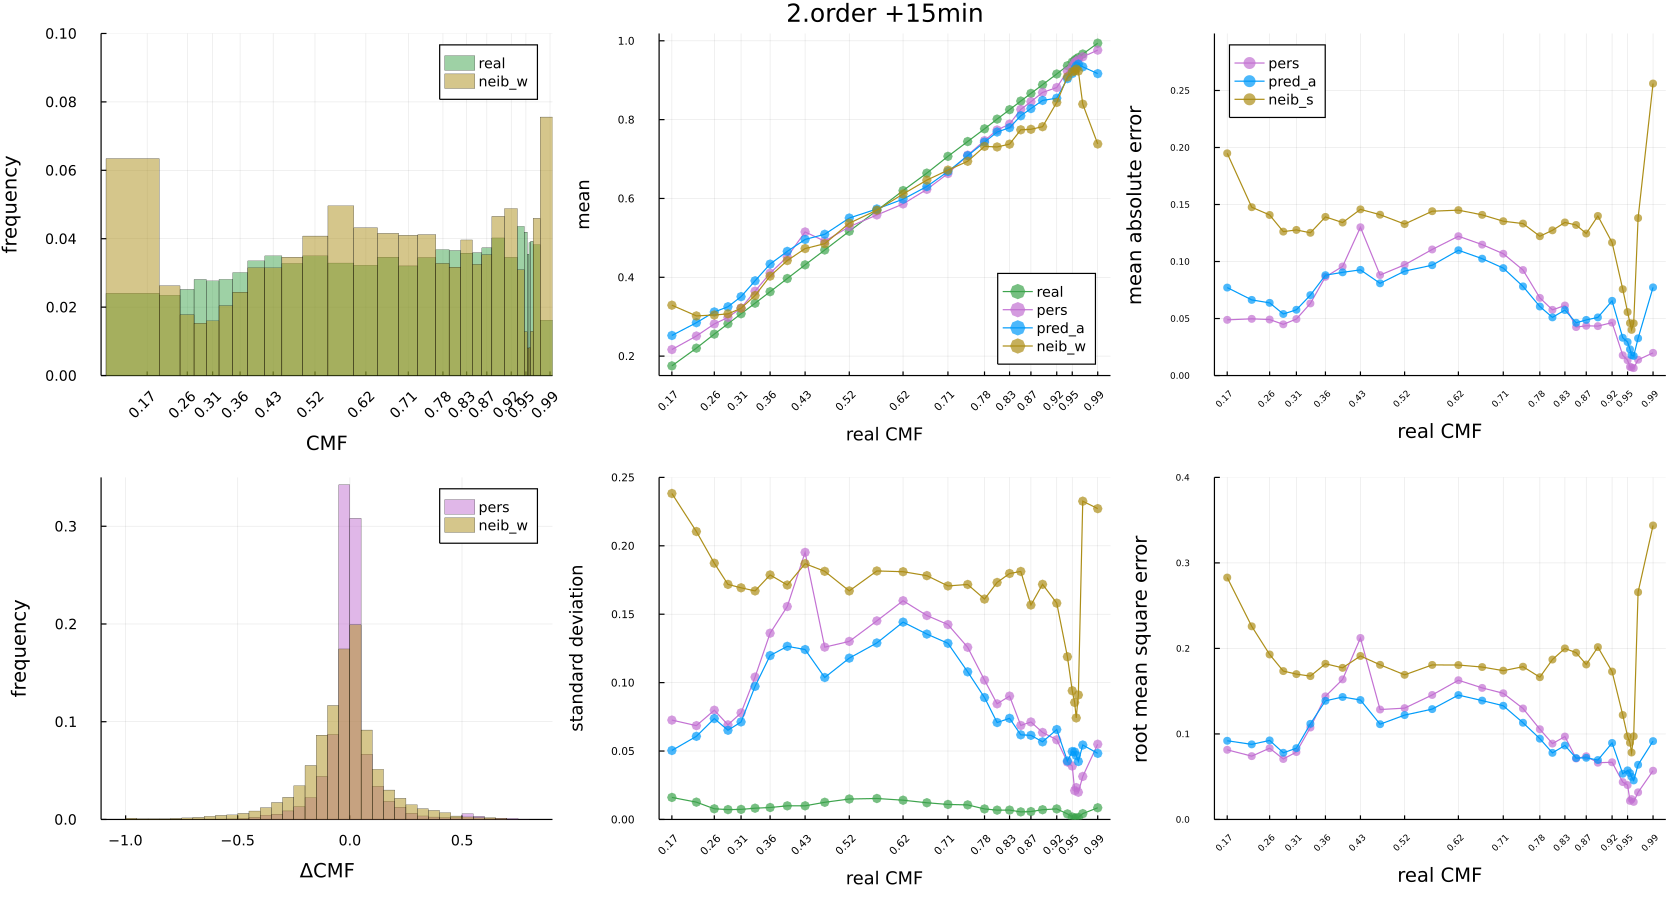

In [103]:
p = plot(h1, mns, mae, h2, sds, rmse, layout=@layout([a b c; d e f]), size=(1400, 750), fmt=:png,
        left_margin=20px, bottom_margin=20px)

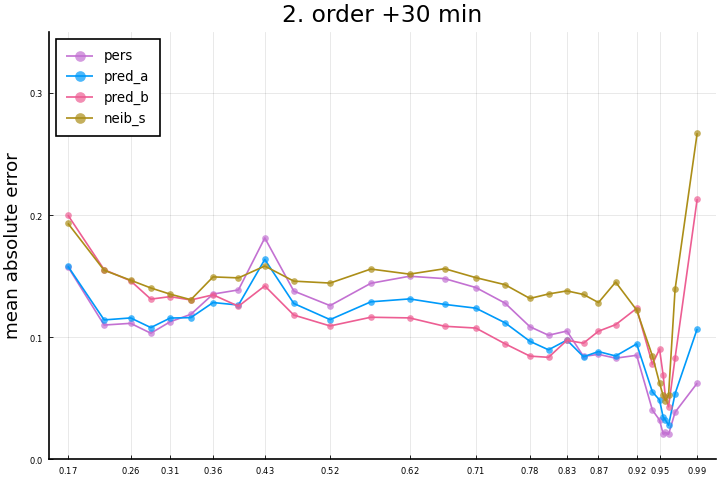

In [160]:
mae = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="mae")

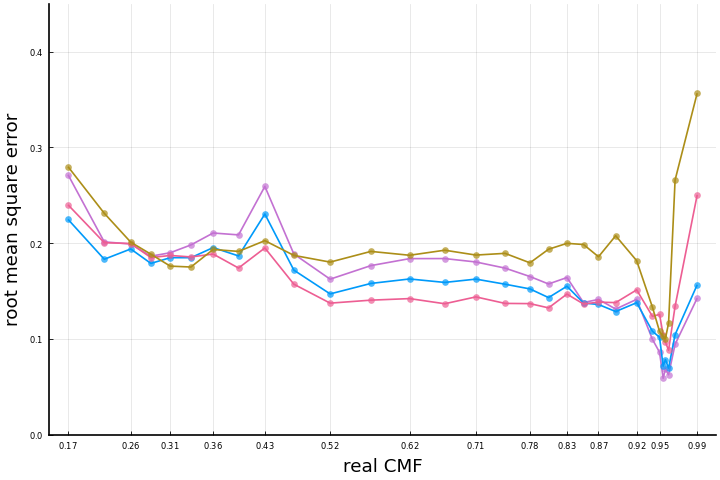

In [161]:
rmse = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="rmse")

#### Bias

In [82]:
dff = df22[:, [:dif_pers, :dif_pred, :dif_pred_n, :dif_neib, :dif_hyb_m, :dif_hyb_r]]

8816×6 DataFrame
  Row │ dif_pers     dif_pred     dif_pred_n   dif_neib    dif_hyb_m    dif_hyb_r   
      │ Float64      Float64      Float64      Float64     Float64      Float64     
──────┼─────────────────────────────────────────────────────────────────────────────
    1 │  0.126488     0.120898     0.1333       0.435005    0.1333       0.1333
    2 │ -0.0971964   -0.026327     0.0416014   -0.0513477  -0.026327    -0.026327
    3 │  0.0573434    0.0989448    0.145973    -0.0469821   0.0989448    0.0989448
    4 │  0.00272383   0.0396683    0.101669    -0.0628862   0.0396683    0.0396683
    5 │ -0.00451154   0.0292287    0.0971571   -0.0759591   0.0292287    0.0292287
    6 │ -0.088423    -0.0591943    0.00873407  -0.0902705  -0.0591943   -0.0591943
    7 │ -0.0903167   -0.0637855   -0.0110659   -0.0689947  -0.0903167   -0.0689947
    8 │ -0.0281014    0.0214925    0.0455867    0.0623953   0.0214925    0.0455867
    9 │ -0.170942    -0.146626    -0.0886402   -0.0852479  -0.0886402   -0.0852479
   10 │ -0.228686    -0.192829    -0.148801    -0.210613   -0.148801    -0.148801
   11 │  0.350442     0.355512     0.355711     0.0919952   0.355711     0.355711
  ⋮   │      ⋮            ⋮            ⋮           ⋮            ⋮            ⋮
 8807 │ -0.164386    -0.117918    -0.082036    -0.266349   -0.082036    -0.082036
 8808 │  0.0330548    0.030065     0.0235049   -0.157679    0.0235049    0.0235049
 8809 │ -0.0340642   -0.0219492   -0.0105593   -0.276306   -0.0105593   -0.0105593
 8810 │  0.219517     0.208958     0.208958    -0.109714    0.208958     0.208958
 8811 │  0.134667     0.135562     0.164262    -0.0633513   0.164262     0.164262
 8812 │  0.00567275   0.0149818    0.0715711   -0.093524    0.0149818    0.0715711
 8813 │ -0.139856    -0.118667    -0.0682847   -0.170011   -0.118667    -0.0682847
 8814 │ -0.147758    -0.0832934   -0.0548304   -0.18533    -0.0548304   -0.0548304
 8815 │ -0.0609222   -0.0209103    0.00732246  -0.0898753   0.00732246   0.00732246
 8816 │ -0.202986    -0.202224    -0.202224    -0.278043   -0.202224    -0.202224
                                                                   8795 rows omitted

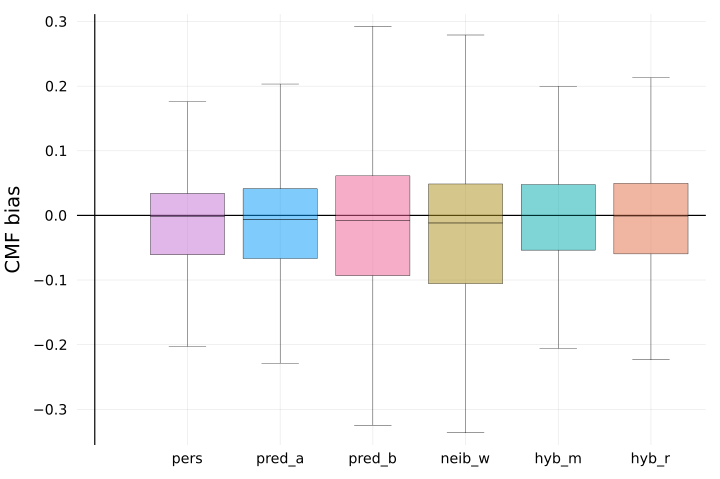

In [87]:
lab = ["pers", "pred_a", "pred_b", "neib_w", "hyb_m", "hyb_r"]
b = boxplot(Array(dff), leg=:none, frame=:zerolines, outliers=false, 
        c=[4 1 7 5 6 2], label=lab, xticks=(1:size(dff, 2), lab),
        fillalpha=0.5, lw=0.3, 
        ylabel="CMF bias") #, title=city)

###  Hybrid

#### rmse vs mae

In [16]:
function getMae(df, steps)
    mae_pers = meanad(df.pers, df.real)
    mae_pred = meanad(df.pred, df.real)
    if steps == 1
        return mae_pers, mae_pred 
    else
        mae_pred_n = meanad(df.pred_n, df.real)
        df_ = filter(:dif_neib => d -> !isnan(d), copy(df))
        mae_neib = meanad(df_.neib, df_.real)
        return mae_pers, mae_pred, mae_pred_n, mae_neib
    end
end

getMae (generic function with 1 method)

In [17]:
function getRmse(df, steps)
    rmse_pers = rmsd(df.pers, df.real)
    rmse_pred = rmsd(df.pred, df.real)
    if steps == 1
        return rmse_pers, rmse_pred 
    else
        rmse_pred_n = rmsd(df.pred_n, df.real)
        df_ = filter(:dif_neib => d -> !isnan(d), copy(df))
        rmse_neib = rmsd(df_.neib, df_.real)
        return rmse_pers, rmse_pred, rmse_pred_n, rmse_neib
    end
end

getRmse (generic function with 1 method)

In [18]:
maes_pers = [getMae(df21, 1)[1], getMae(df22, 2)[1], getMae(df23, 3)[1], getMae(df24, 4)[1]]
rmses_pers = [getRmse(df21, 1)[1], getRmse(df22, 2)[1], getRmse(df23, 3)[1], getRmse(df24, 4)[1]]

maes_pred = [getMae(df21, 1)[2], getMae(df22, 2)[2], getMae(df23, 3)[2], getMae(df24, 4)[2]]
rmses_pred = [getRmse(df21, 1)[2], getRmse(df22, 2)[2], getRmse(df23, 3)[2], getRmse(df24, 4)[2]]

maes_pred_n = [getMae(df22, 2)[3], getMae(df23, 3)[3], getMae(df24, 4)[3]]
rmses_pred_n = [getRmse(df22, 2)[3], getRmse(df23, 3)[3], getRmse(df24, 4)[3]];

In [35]:
maes_neib = [getMae(df22, 2)[4], getMae(df23, 3)[4], getMae(df24, 4)[4]]
rmses_neib = [getRmse(df22, 2)[4], getRmse(df23, 3)[4], getRmse(df24, 4)[4]]

3-element Vector{Float64}:
 0.18466899334609768
 0.18461097388856912
 0.18458713779011177

In [70]:
p2 = plot([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], label=["pers" "pred_a" "hybr_m" "hybr_r"], leg=:topleft,
    xlim=(0,0.22), ylim=(0,0.22),
    xlabel="MAE", ylabel="RMSE", title="Berlin 2.order")
plot!([maes_pred_n], [rmses_pred_n], c=[7 2 9], label="pred_b", marker=(0.7, stroke(0)), size=(670, 650), dpi=:120, fmt=:png)

annotate!(0.06, 0.095, text("+15 min", 8))
annotate!(0.11, 0.145, text("+$(15*2) min", 8))
# annotate!(0.1, 0.2, text("+$(15*3) min", 8))
annotate!(0.155, 0.21, text("+$(15*4) min", 8));

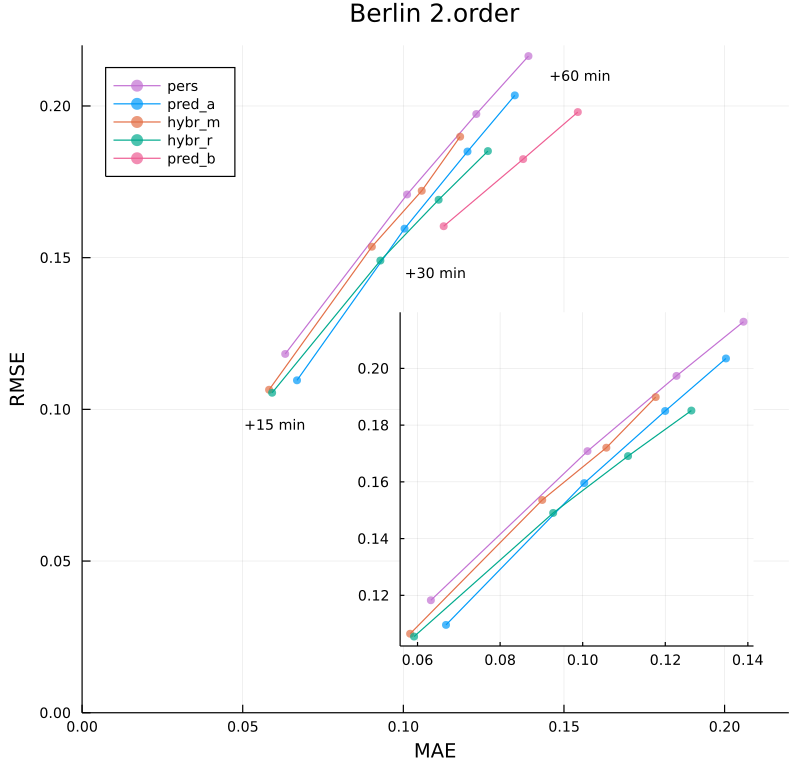

In [71]:
bb = bbox(0.45, 0.4, 0.5, 0.5)
plot!([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], leg=:none, inset=(1, bb), subplot=2)
# plot!(maes_pred_n, rmses_pred_n, c=7, marker=(0.7, stroke(0)), inset=(1, bb)) #, subplot=2)

In [14]:
df1 = df21[:, [:real, :pers, :pred, :hyb_m, :hyb_r]] 
df2 = df22[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]
df3 = df23[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]
df4 = df24[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]

len = size(df2, 2)
lab = ["pers", "pred_a", "pred_b", "hyb_m", "hyb_r"];

df_err = DataFrame(:method => lab)
mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:(len-1)]
insert!(mae1, 3, NaN)
df_err.mae1 = mae1
df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]

rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:(len-1)]
insert!(rmse1, 3, NaN)
df_err.rmse1 = rmse1
df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
@show df_err;

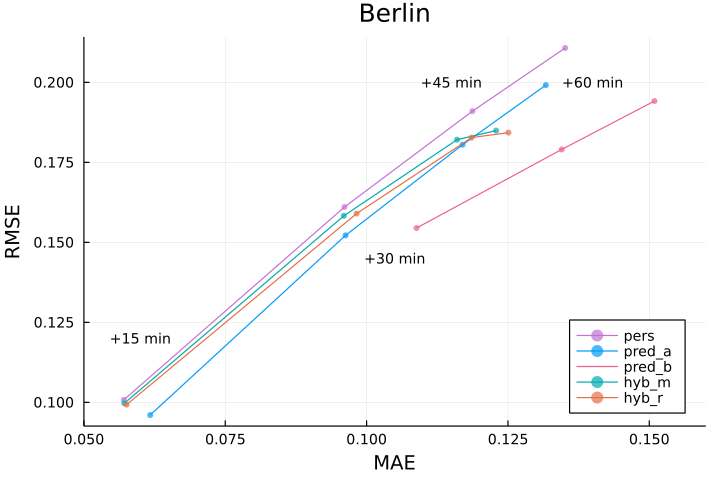

In [28]:
p = plot(leg=:bottomright, xlim=(0.05, 0.16), #aspect_ratio=1, #ylim=(0,0.25), 
    xlabel="MAE", ylabel="RMSE", title="Berlin")
clrs = [4, 1, 7, 6, 2]
for i in 1:(len-1)
    plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(3, 0.7, stroke(0)), c=clrs[i], label=lab[i])
end
annotate!(0.06, 0.12, text("+15 min", 8))
annotate!(0.105, 0.145, text("+$(15*2) min", 8))
annotate!(0.115, 0.2, text("+$(15*3) min", 8))
annotate!(0.14, 0.2, text("+$(15*4) min", 8))
p

try after fix neib & hyb:

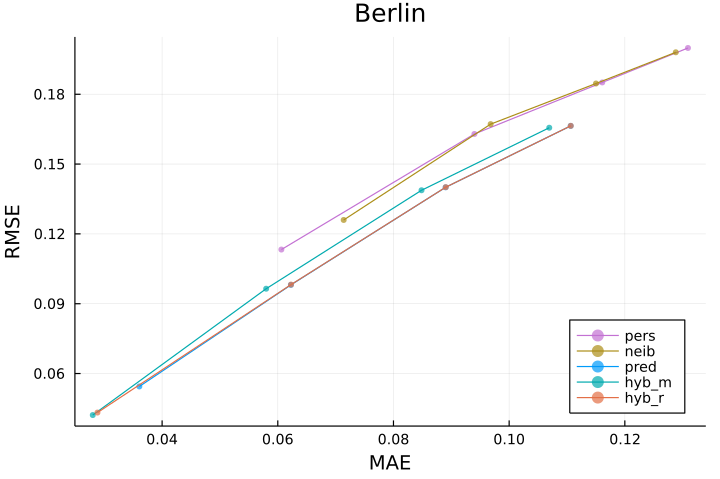

In [195]:
p = plot(leg=:bottomright,# xlim=(0.05, 0.16), #aspect_ratio=1, #ylim=(0,0.25), 
    xlabel="MAE", ylabel="RMSE", title="Berlin")
clrs = [4, 5, 1, 6, 2]
for i in 1:(len-1)
    plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(3, 0.7, stroke(0)), c=clrs[i], label=lab[i])
end
p

In [50]:
function mae_vs_rmse(df1t, df2t, df3t, df4t; tit="Berlin"*" 2020")
    df1 = df1t[:, [:real, :pers, :neib, :pred, :hyb_m, :hyb_r]] 
    df2 = df2t[:, [:real, :pers, :neib, :pred, :pred_n, :hyb_m, :hyb_r]]
    df3 = df3t[:, [:real, :pers, :neib, :pred, :pred_n, :hyb_m, :hyb_r]]
    df4 = df4t[:, [:real, :pers, :neib, :pred, :pred_n, :hyb_m, :hyb_r]]

    len = size(df2, 2)
    lab = ["pers", "neib", "pred_a", "pred_b", "hyb_m", "hyb_r"];

    df_err = DataFrame(:method => lab)

    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:(len-1)]
    insert!(mae1, 4, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:(len-1)]
    insert!(rmse1, 4, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
    @show df_err;

    p = plot(leg=:bottomright, #xlim=(0.05, 0.16), #aspect_ratio=1, #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title=tit)
    clrs = [4, 5, 1, 7, 6, 2]
    for i in 1:(len-1)
        plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(3, 0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
    return p
end

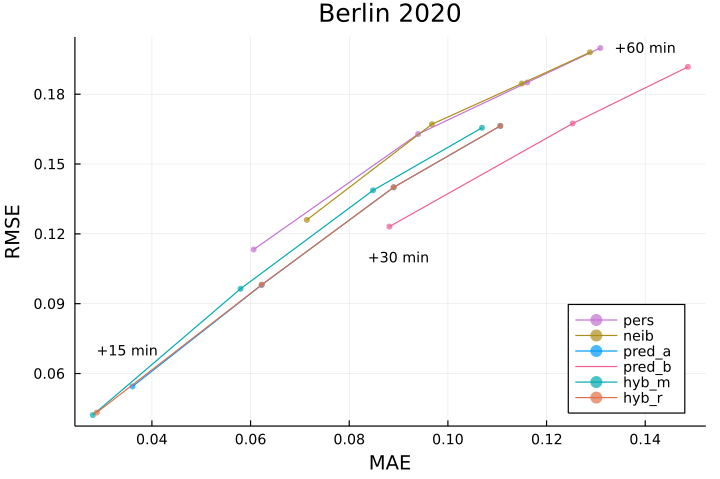

In [50]:
annotate!(0.035, 0.07, text("+15 min", 8))
annotate!(0.09, 0.11, text("+$(15*2) min", 8))
# annotate!(0.115, 0.2, text("+$(15*3) min", 8))
annotate!(0.14, 0.2, text("+$(15*4) min", 8))
p

In [31]:
function viz_err_city(fn)
    city = split(fn, ['_', '.'])[2] 
    df21 = get_df_city(fn, 1; hyb=1)
    df1 = df21[:,[1, 3, 7, 12, 14]]

    df22 = get_df_city(fn, 2; hyb=1)
    df2 = df22[:,[1, 3, 7, 11, 16, 18]]

    df23 = get_df_city(fn, 3; hyb=1)
    df3 = df23[:,[1, 3, 7, 11, 16, 18]]

    df24 = get_df_city(fn, 4; hyb=1)
    df4 = df24[:,[1, 3, 7, 11, 16, 18]]

    len = size(df2, 2)
    lab = names(df2)[2:end]

    df_err = DataFrame(:method => lab)
    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(mae1, 3, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]   

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(rmse1, 3, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
    @show df_err;
    p = plot(leg=:bottomright, xlim=(0,0.2), #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title=city)
    clrs = [4, 1, 7, 5, 6]
    for i in 1:5
        plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
    return p
end

viz_err_city (generic function with 1 method)

#### bias range

In [95]:
function viz_bias(df; tit="+$(15*2) min")
    gb = groupby(df, :real_cls)
    bias_pers = [mean(g.dif_pers) for g in gb]
    bias_pred = [mean(g.dif_pred) for g in gb]

    bias_neib = [mean(g.dif_neib) for g in gb]
    bias_hyb_m = [mean(g.dif_hyb_m) for g in gb]
    bias_hyb_r = [mean(g.dif_hyb_r) for g in gb]

    if df != df21
        bias_pred_n = [mean(g.dif_pred_n) for g in gb]
        biases = [bias_pers bias_pred bias_pred_n bias_neib bias_hyb_m bias_hyb_r]
        clr = [4 1 7 5 6 2]
    else   
        biases = [bias_pers bias_pred bias_neib bias_hyb_m bias_hyb_r]
        clr = [4 1 5 6 2]
    end
    df == df22 ? lab = ["pers" "pred_a" "pred_b" "neib_w" "hyb_m" "hyb_r"] : lab = false
    bi = plot(binMean, biases, label=lab, leg=:bottomleft, c=clr, marker=(2, 0.7, :o, stroke(0)), title=tit)
    return bi
end

viz_bias (generic function with 1 method)

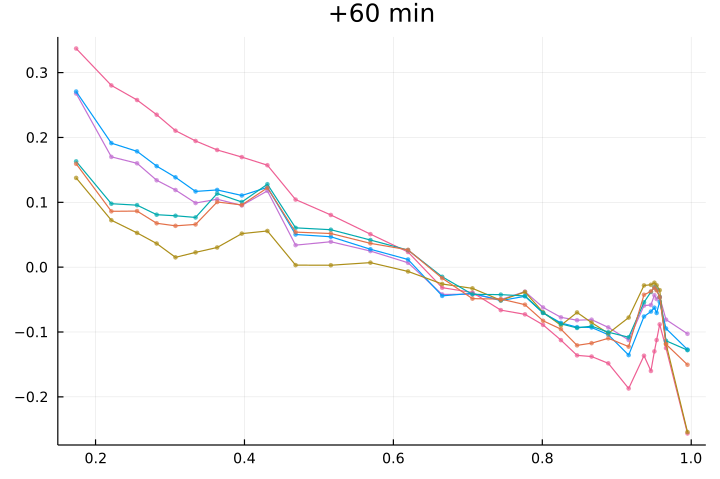

In [96]:
bi1 = viz_bias(df21; tit="+$(15*1) min")
bi2 = viz_bias(df22; tit="+$(15*2) min")
bi3 = viz_bias(df23; tit="+$(15*3) min")
bi4 = viz_bias(df24; tit="+$(15*4) min")

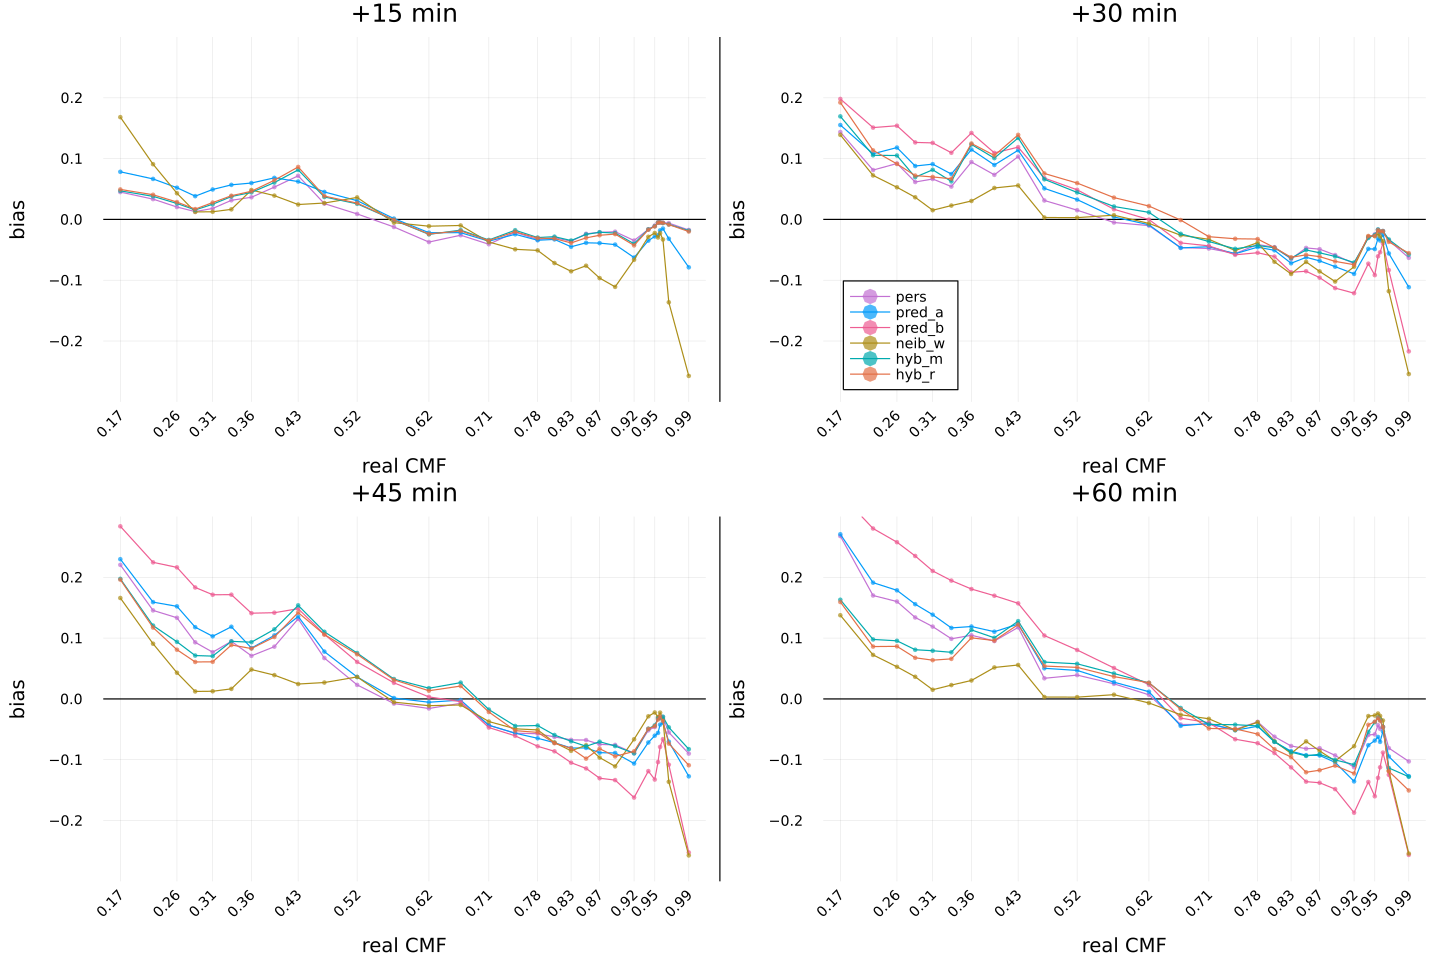

In [97]:
bias = plot(bi1, bi2, bi3, bi4, layout=@layout([a b; c d]), size=(1200, 800), 
    frame=:zerolines, leftmargin=20px, ylim=(-0.3, 0.3), 
    xlabel="real CMF", ylabel="bias", xticks=xti, xrotation=45)

In [67]:
gb = groupby(df2t, :real_cls)
bias_pers = [mean(g.dif_pers) for g in gb]
bias_pred = [mean(g.dif_pred) for g in gb]
# bias_pred_n = [mean(g.dif_pred_n) for g in gb]

bias_neib = [mean(g.dif_neib) for g in gb]
bias_hyb_m = [mean(g.dif_hyb_m) for g in gb]
bias_hyb_r = [mean(g.dif_hyb_r) for g in gb]

30-element Vector{Float64}:
  0.1443732155936415
  0.07781300075218879
  0.07410117147235167
  0.06624133969874325
  0.0644112341808201
  0.061484946380496695
  0.05998924300153195
  0.06466932594678511
  0.04582923204645835
  0.04052372719262459
  0.029358387575092765
  0.04239203561921373
  0.021455186734183507
  ⋮
 -0.04169622094967782
 -0.03146577769438456
 -0.027120122828411943
 -0.035030170785030755
 -0.04180628791524207
 -0.05336055968999637
 -0.04056037187672866
 -0.032641167949525124
 -0.028956728913873048
 -0.026726931885940077
 -0.03725074812800828
 -0.07035049595915965

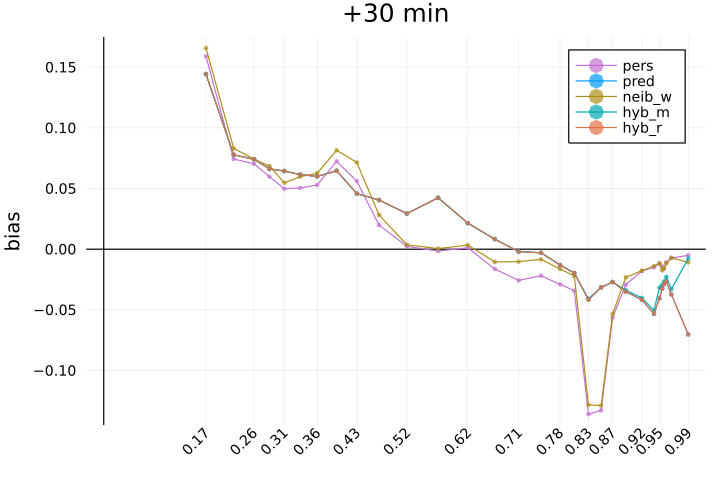

In [68]:
v = plot(binMean, [bias_pers bias_pred bias_neib bias_hyb_m bias_hyb_r], frame=:zerolines, 
        label=["pers" "pred" "neib_w" "hyb_m" "hyb_r"], c=[4 1 5 6 2], marker=(2, 0.7, :o, stroke(0)),  
        xticks=xti, xrotation=45, 
        ylabel="bias", title="+30 min")